# Aprendizaje Supervisado

In [ ]:
import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

In [ ]:
datasets = {}

for i in range(1, 9):
    with open(f'/content/dataset_v{i}.pkl', 'rb') as f:
        datasets[f'v{i}'] = pickle.load(f)

v1 = datasets['v1']
v2 = datasets['v2']
v3 = datasets['v3']
v4 = datasets['v4']
v5 = datasets['v5']
v6 = datasets['v6']
v7 = datasets['v7']
v8 = datasets['v8']

## Dataset v1

### DecisionTree

In [ ]:
# Entrenar modelo de DecisionTree
tree_model_v1 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

tree_model_v1.fit(v1['X_train'], v1['y_train'])

y_pred_tree_v1 = tree_model_v1.predict(v1['X_test'])

In [ ]:
# Obtener métricas (accuracy, precision, F1-Score)
print(classification_report(v1['y_test'], y_pred_tree_v1))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1946
           1       0.85      0.75      0.80      1966
           2       0.77      0.92      0.84      1895
           3       0.82      0.86      0.84      1800

    accuracy                           0.82      7607
   macro avg       0.82      0.82      0.82      7607
weighted avg       0.83      0.82      0.82      7607



In [ ]:
# ====================================================== Casos de prueba ===============================================================================
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

feature_names = v1['X_train'].columns

# Hacer prediccion para cada caso de prueba
for i, case in enumerate(test_cases):
  case_df = pd.DataFrame([case], columns=feature_names)

  prediction = tree_model_v1.predict(case_df)

  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if prediction[0] == 0:
    prediction_label = "high"
  elif prediction[0] == 1:
    prediction_label = "low"
  elif prediction[0] == 2:
    prediction_label = "medium high"
  elif prediction[0] == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"

  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

Caso de prueba 1: La predicción es low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es medium high



Importancia de las Features:
                      feature  importance
3             SessionsPerWeek    0.502900
6        AchievementsUnlocked    0.247820
4   AvgSessionDurationMinutes    0.245230
5                 PlayerLevel    0.003926
1               PlayTimeHours    0.000124
2             InGamePurchases    0.000000
0                         Age    0.000000
7            GameGenre_Action    0.000000
8               GameGenre_RPG    0.000000
9        GameGenre_Simulation    0.000000
10           GameGenre_Sports    0.000000
11         GameGenre_Strategy    0.000000
12              Gender_Female    0.000000
13                Gender_Male    0.000000
14              Location_Asia    0.000000
15            Location_Europe    0.000000
16             Location_Other    0.000000
17               Location_USA    0.000000
18        GameDifficulty_Easy    0.000000
19        GameDifficulty_Hard    0.000000
20      GameDifficulty_Medium    0.000000


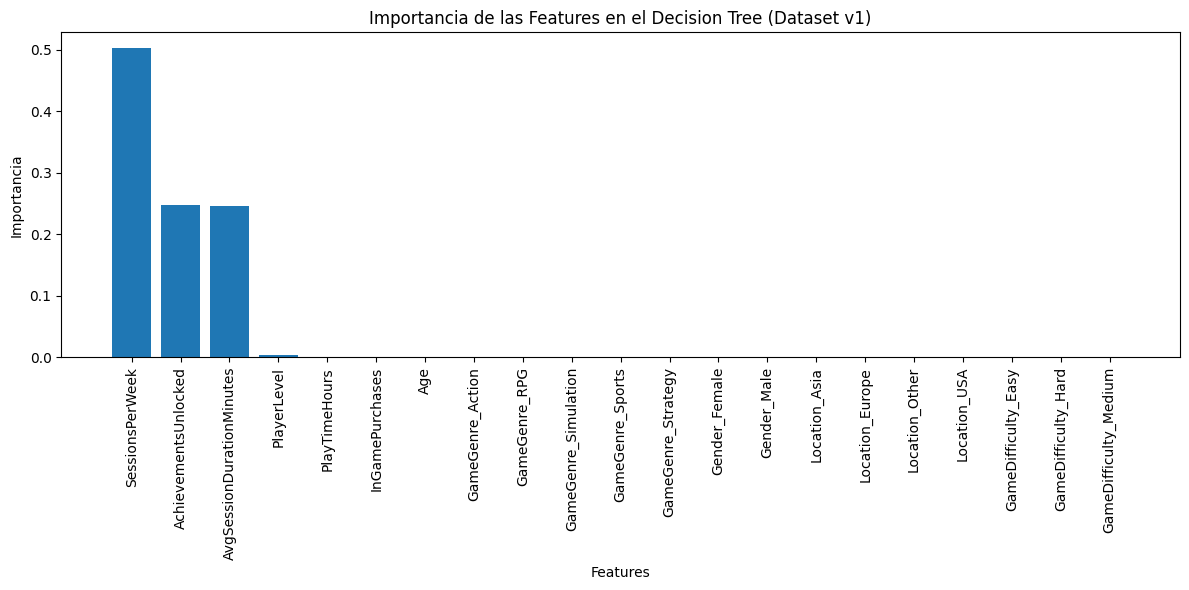

In [ ]:
# Obtener la importancia de las features
feature_importances_v1 = tree_model_v1.feature_importances_

# Crear un DataFrame para visualizar la importancia
importance_df_v1 = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_v1})

# Ordenar por importancia descendente
importance_df_v1 = importance_df_v1.sort_values('importance', ascending=False)

# Imprimir la importancia de las features
print("\nImportancia de las Features:")
print(importance_df_v1)

# Generar gráfico de barras de la importancia de las features
plt.figure(figsize=(12, 6))
plt.bar(importance_df_v1['feature'], importance_df_v1['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importancia")
plt.title("Importancia de las Features en el Decision Tree (Dataset v1)")
plt.tight_layout()
plt.show()

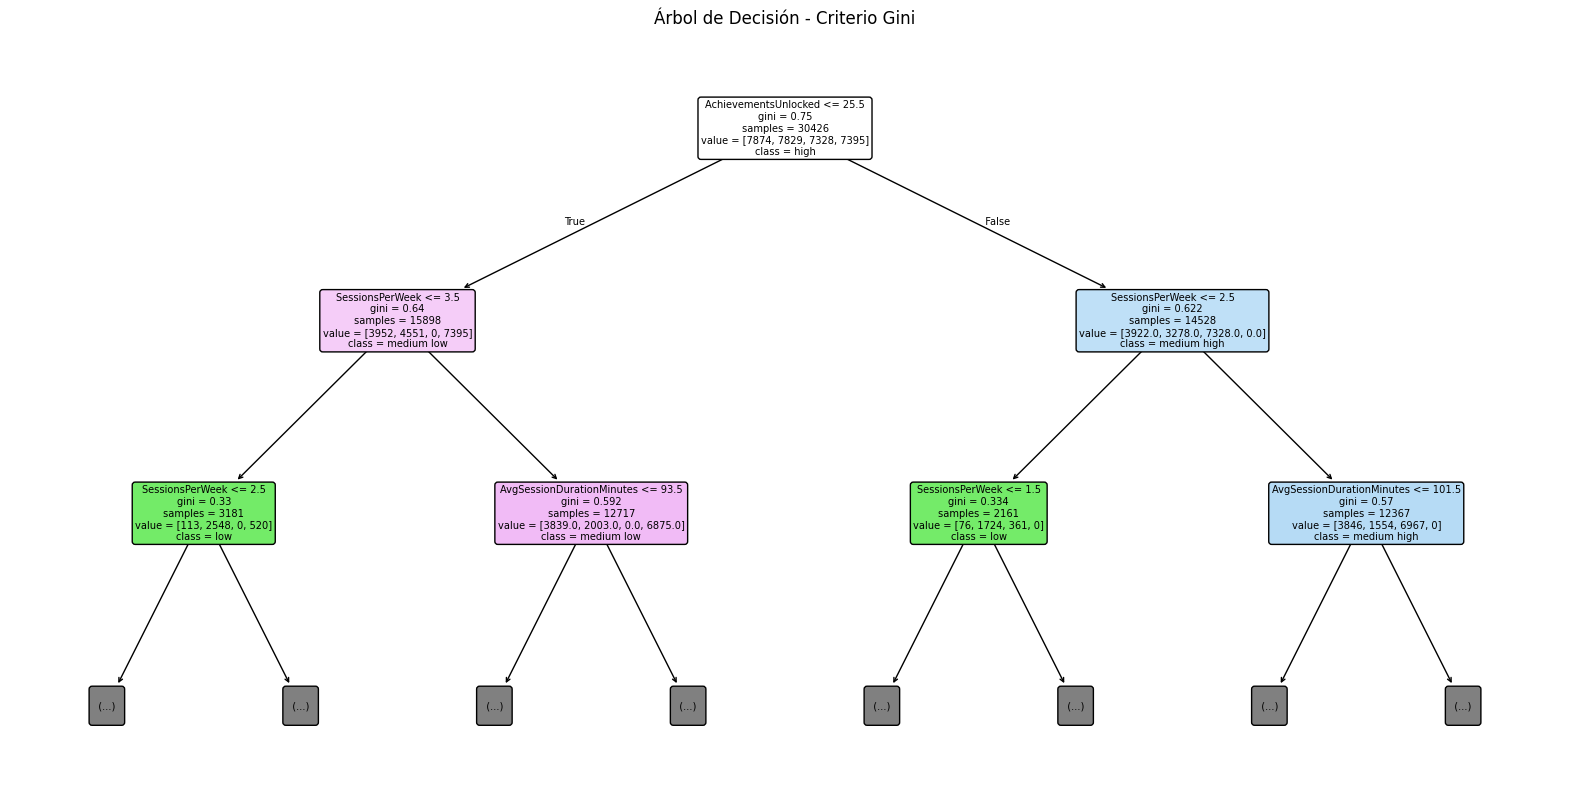

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model_v1,
    feature_names=v1['X_train'].columns,
    class_names=["high", "low", "medium high", "medium low"],
    filled=True,
    rounded=True,
    max_depth=2 # Limitamos mucho la profundidad para legibilidad del gráfico
    )
plt.title("Árbol de Decisión - Criterio Gini")
plt.show()

### KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled_v1 = scaler.fit_transform(v1['X_train'])
X_test_scaled_v1 = scaler.transform(v1['X_test'])

In [ ]:
# Entrenar el modelo de KNN
model_knn_v1 = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
model_knn_v1.fit(X_train_scaled_v1, v1['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_knn_v1 = model_knn_v1.predict(X_test_scaled_v1)

# Obtención métricas
print("Evaluación del modelo KNN")
print("=" * 60)
print(classification_report(v1['y_test'], y_pred_knn_v1))

Evaluación del modelo KNN
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1946
           1       0.64      0.61      0.63      1966
           2       0.65      0.63      0.64      1895
           3       0.62      0.57      0.60      1800

    accuracy                           0.65      7607
   macro avg       0.65      0.65      0.65      7607
weighted avg       0.65      0.65      0.65      7607



In [ ]:
# Casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

# Asegurar que los casos de prueba sean escalados si el modelo utiliza datos normalizados
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_v1 = model_knn_v1.predict(test_cases_scaled)

# Muestra de resultados de cada caso
print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(predictions_v1):
  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if pred == 0:
    prediction_label = "high"
  elif pred == 1:
    prediction_label = "low"
  elif pred == 2:
    prediction_label = "medium high"
  elif pred == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"
  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es medium low


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


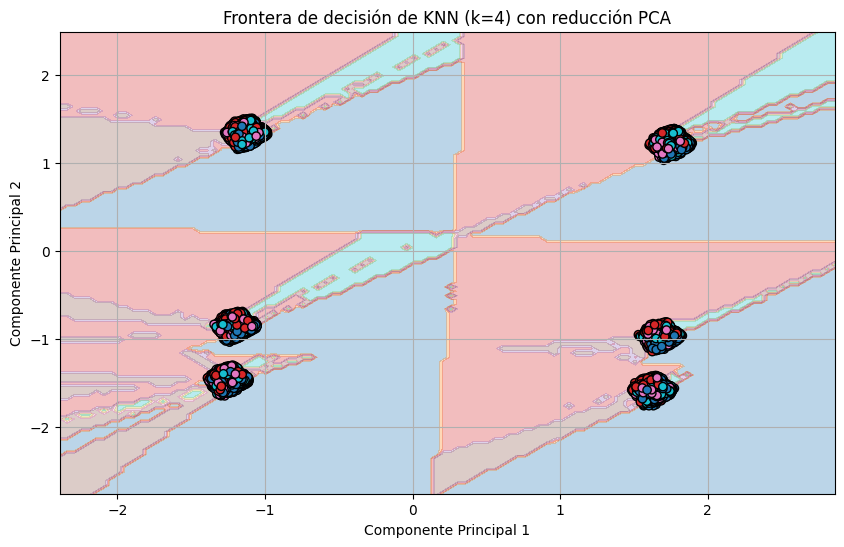

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_knn = pca.fit_transform(X_train_scaled_v1)
y_knn = v1['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
knn = KNeighborsClassifier(n_neighbors=19, metric='minkowski', p=2)
knn.fit(X_knn, y_knn)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de KNN (k=4) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### SVM


In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled_v1 = scaler.fit_transform(v1['X_train'])
X_test_scaled_v1 = scaler.transform(v1['X_test'])

In [ ]:
# Entrenar el modelo de SVM
model_svm_v1 = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model_svm_v1.fit(X_train_scaled_v1, v1['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_svm_v1 = model_svm_v1.predict(X_test_scaled_v1)

# Obtención métricas
print("Evaluación del modelo SVM")
print("=" * 60)
print(classification_report(v1['y_test'], y_pred_svm_v1))

Evaluación del modelo SVM
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1946
           1       0.86      0.81      0.83      1966
           2       0.85      0.89      0.87      1895
           3       0.85      0.89      0.87      1800

    accuracy                           0.86      7607
   macro avg       0.86      0.86      0.86      7607
weighted avg       0.86      0.86      0.86      7607



In [ ]:
# Casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

# Escalar los casos de prueba
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_svm_v1 = model_svm_v1.predict(test_cases_scaled)

# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas SVM " + "="*30)
for i, pred in enumerate(predictions_svm_v1):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: Predicción -> {prediction_label}")
print("="*80)

============================== Resultados de Pruebas SVM ==============================
Caso de prueba 1: Predicción -> low
Caso de prueba 2: Predicción -> high
Caso de prueba 3: Predicción -> low


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


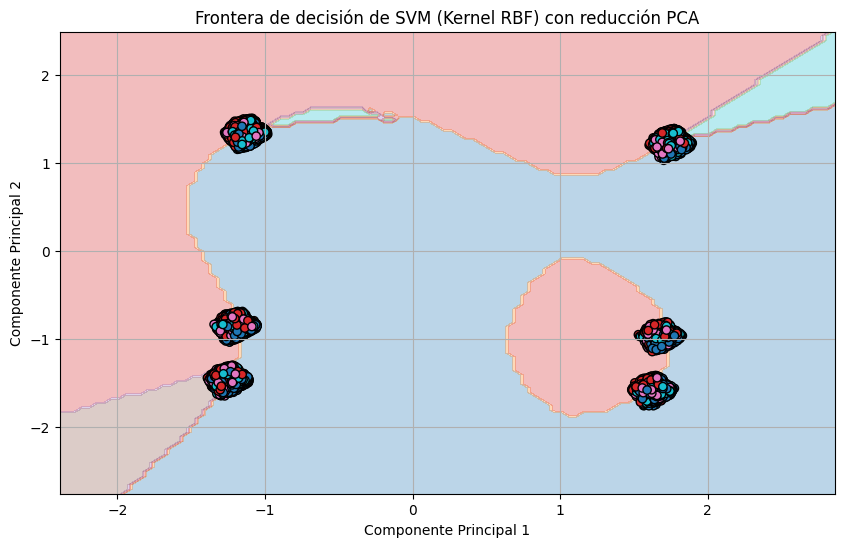

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_svm = pca.fit_transform(X_train_scaled_v1)
y_svm = v1['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_svm, y_svm)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_svm[:, 0].min() - 1, X_svm[:, 0].max() + 1
y_min, y_max = X_svm[:, 1].min() - 1, X_svm[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_svm, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de SVM (Kernel RBF) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### Red Neuronal

In [ ]:
# Convertir etiquetas a categorías si es necesario (para categorical_crossentropy)
num_classes = len(np.unique(v1['y_train']))
y_train_cat_v1 = tf.keras.utils.to_categorical(v1['y_train'], num_classes)
y_test_cat_v1 = tf.keras.utils.to_categorical(v1['y_test'], num_classes)

In [ ]:
# Crear modelo
def crear_modelo(dropout_rate=0.2):
    model = models.Sequential([
        layers.Input(shape=(X_train_scaled_v1.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    callbacks.ReduceLROnPlateau(patience=5, factor=0.5, monitor='val_loss')
]


# Entrenar modelo
model_v1 = crear_modelo(dropout_rate=0.2)
history = model_v1.fit(
    X_train_scaled_v1, y_train_cat_v1,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5573 - loss: 1.1143 - val_accuracy: 0.8183 - val_loss: 0.5759 - learning_rate: 0.0010
Epoch 2/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7545 - loss: 0.6808 - val_accuracy: 0.8569 - val_loss: 0.5075 - learning_rate: 0.0010
Epoch 3/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7913 - loss: 0.5954 - val_accuracy: 0.8717 - val_loss: 0.4599 - learning_rate: 0.0010
Epoch 4/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8104 - loss: 0.5608 - val_accuracy: 0.8840 - val_loss: 0.4313 - learning_rate: 0.0010
Epoch 5/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8205 - loss: 0.5359 - val_accuracy: 0.8822 - val_loss: 0.4237 - learning_rate: 0.0010
Epoch 6/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8260 - loss: 0.5250 - val_accuracy: 0.8906 - val_loss: 0.4092 - learning_rate: 0.0010
Epoch 7/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8378 - loss: 0.

In [ ]:
# Evaluación en test real
y_pred_test_v1 = np.argmax(model_v1.predict(X_test_scaled_v1), axis=1)
y_true_test_v1 = v1['y_test']
print(classification_report(v1['y_test'], y_pred_test_v1))


print("="*20 + " Evaluación en conjunto de prueba " + "="*20)
print(classification_report(y_true_test_v1, y_pred_test_v1))

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1946
           1       0.92      0.89      0.91      1966
           2       0.92      0.94      0.93      1895
           3       0.92      0.94      0.93      1800

    accuracy                           0.92      7607
   macro avg       0.92      0.92      0.92      7607
weighted avg       0.92      0.92      0.92      7607

==================== Evaluación en conjunto de prueba ====================
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1946
           1       0.92      0.89      0.91      1966
           2       0.92      0.94      0.93      1895
           3       0.92      0.94      0.93      1800

    accuracy                           0.92      7607
   macro avg       0.92      0.92      0.92      7607
weighted avg       0.92      0.92      0.92      7607



In [ ]:
# Prueba casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

test_cases_array = np.array(test_cases)
test_cases_scaled = scaler.transform(test_cases_array)

pred_probs = model_v1.predict(test_cases_scaled)
pred_classes = np.argmax(pred_probs, axis=1)
# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(pred_classes):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es medium high


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Dataset v2

### DecisionTree

In [ ]:
# Entrenar modelo de DecisionTree
tree_model_v2 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

tree_model_v2.fit(v2['X_train'], v2['y_train'])

y_pred_tree_v2 = tree_model_v2.predict(v2['X_test'])

In [ ]:
# Obtener métricas (accuracy, precision, F1-Score)
print(classification_report(v2['y_test'], y_pred_tree_v2))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      2007
           1       0.80      0.81      0.80      1955
           2       0.79      0.86      0.83      1821
           3       0.82      0.85      0.84      1824

    accuracy                           0.82      7607
   macro avg       0.82      0.82      0.82      7607
weighted avg       0.82      0.82      0.82      7607



In [ ]:
# ====================================================== Casos de prueba ===============================================================================
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

feature_names = v2['X_train'].columns

# Hacer prediccion para cada caso de prueba
for i, case in enumerate(test_cases):
  case_df = pd.DataFrame([case], columns=feature_names)

  prediction = tree_model_v2.predict(case_df)

  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if prediction[0] == 0:
    prediction_label = "high"
  elif prediction[0] == 1:
    prediction_label = "low"
  elif prediction[0] == 2:
    prediction_label = "medium high"
  elif prediction[0] == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"

  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

Caso de prueba 1: La predicción es low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es medium high



Importancia de las Features:
                      feature  importance
3             SessionsPerWeek    0.500976
6        AchievementsUnlocked    0.261414
4   AvgSessionDurationMinutes    0.233162
5                 PlayerLevel    0.004248
1               PlayTimeHours    0.000200
2             InGamePurchases    0.000000
0                         Age    0.000000
7            GameGenre_Action    0.000000
8               GameGenre_RPG    0.000000
9        GameGenre_Simulation    0.000000
10           GameGenre_Sports    0.000000
11         GameGenre_Strategy    0.000000
12              Gender_Female    0.000000
13                Gender_Male    0.000000
14              Location_Asia    0.000000
15            Location_Europe    0.000000
16             Location_Other    0.000000
17               Location_USA    0.000000
18        GameDifficulty_Easy    0.000000
19        GameDifficulty_Hard    0.000000
20      GameDifficulty_Medium    0.000000


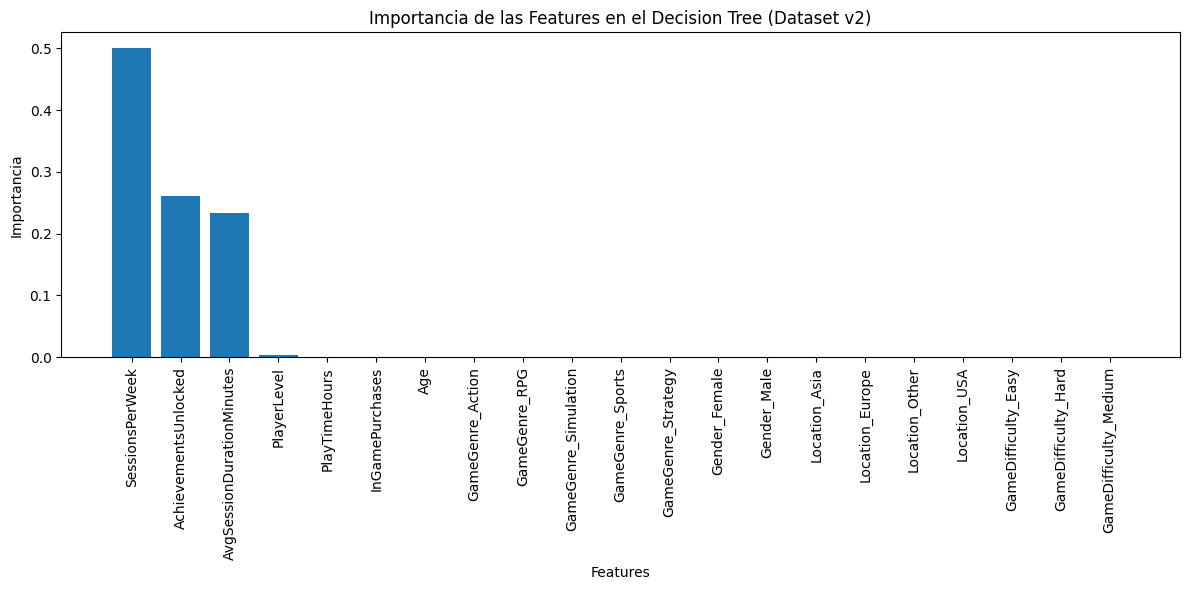

In [ ]:
# Obtener la importancia de las features
feature_importances_v2 = tree_model_v2.feature_importances_

# Crear un DataFrame para visualizar la importancia
importance_df_v2 = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_v2})

# Ordenar por importancia descendente
importance_df_v2 = importance_df_v2.sort_values('importance', ascending=False)

# Imprimir la importancia de las features
print("\nImportancia de las Features:")
print(importance_df_v2)

# Generar gráfico de barras de la importancia de las features
plt.figure(figsize=(12, 6))
plt.bar(importance_df_v2['feature'], importance_df_v2['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importancia")
plt.title("Importancia de las Features en el Decision Tree (Dataset v2)")
plt.tight_layout()
plt.show()

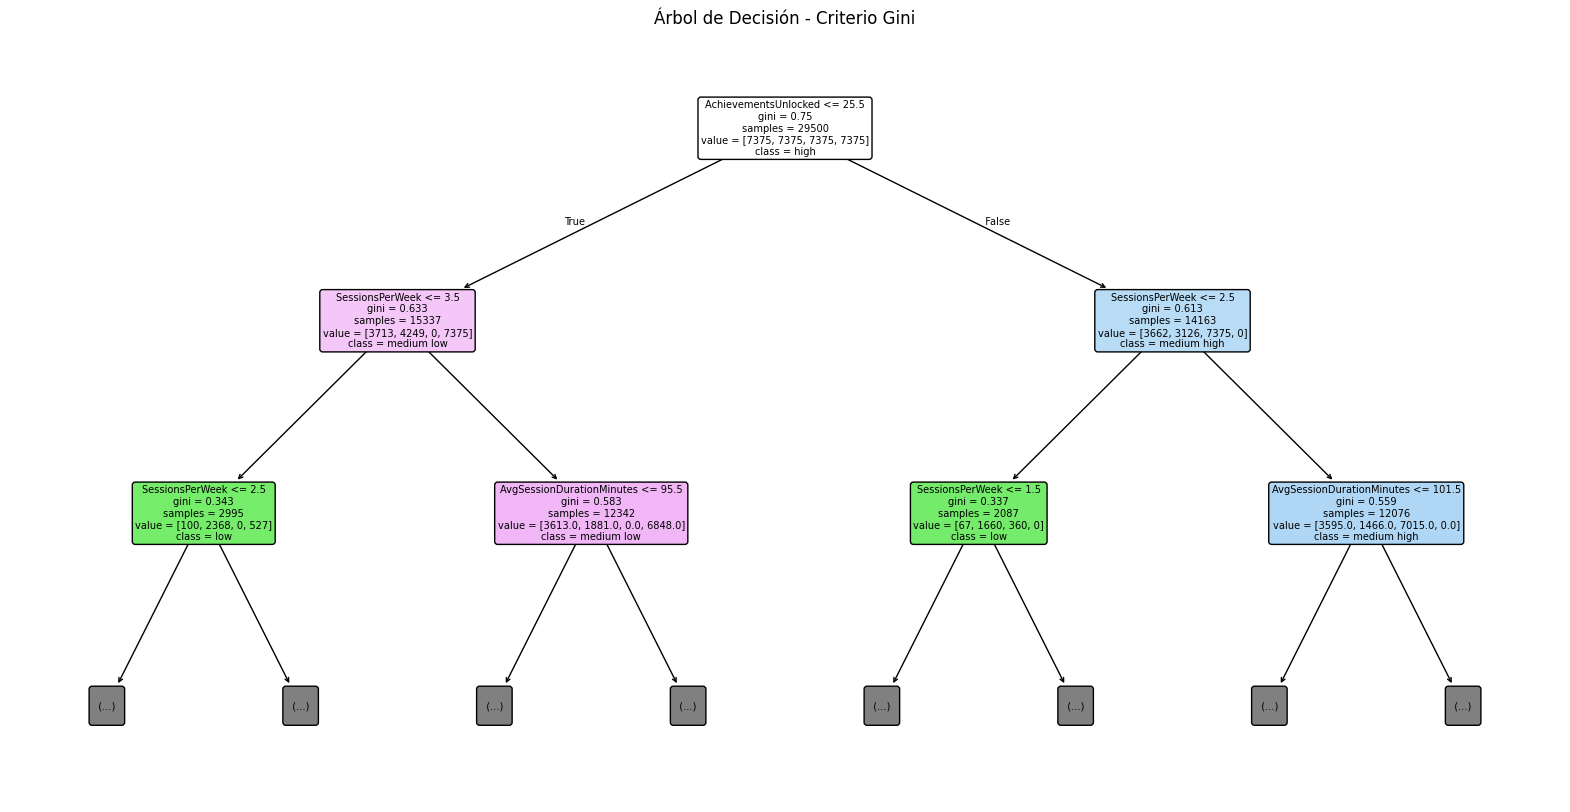

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model_v2,
    feature_names=v2['X_train'].columns,
    class_names=["high", "low", "medium high", "medium low"],
    filled=True,
    rounded=True,
    max_depth=2 # Limitamos mucho la profundidad para legibilidad del gráfico
    )
plt.title("Árbol de Decisión - Criterio Gini")
plt.show()

### KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled_v2 = scaler.fit_transform(v2['X_train'])
X_test_scaled_v2 = scaler.transform(v2['X_test'])

In [ ]:
# Entrenar el modelo de KNN
model_knn_v2 = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
model_knn_v2.fit(X_train_scaled_v2, v2['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_knn_v2 = model_knn_v2.predict(X_test_scaled_v2)

# Obtención métricas
print("Evaluación del modelo KNN")
print("=" * 60)
print(classification_report(v2['y_test'], y_pred_knn_v2))

Evaluación del modelo KNN
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      2007
           1       0.64      0.61      0.63      1955
           2       0.62      0.64      0.63      1821
           3       0.63      0.58      0.60      1824

    accuracy                           0.65      7607
   macro avg       0.64      0.64      0.64      7607
weighted avg       0.64      0.65      0.64      7607



In [ ]:
# Casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

# Asegurar que los casos de prueba sean escalados si el modelo utiliza datos normalizados
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_v2 = model_knn_v2.predict(test_cases_scaled)

# Muestra de resultados de cada caso
print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(predictions_v2):
  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if pred == 0:
    prediction_label = "high"
  elif pred == 1:
    prediction_label = "low"
  elif pred == 2:
    prediction_label = "medium high"
  elif pred == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"
  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es medium high


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


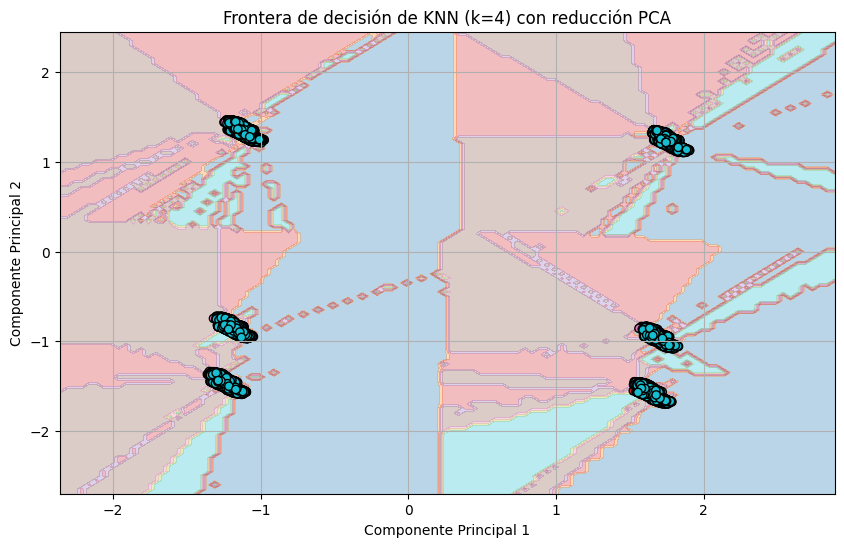

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_knn = pca.fit_transform(X_train_scaled_v2)
y_knn = v2['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
knn = KNeighborsClassifier(n_neighbors=19, metric='minkowski', p=2)
knn.fit(X_knn, y_knn)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de KNN (k=4) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### SVM


In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled_v2 = scaler.fit_transform(v2['X_train'])
X_test_scaled_v2 = scaler.transform(v2['X_test'])

In [ ]:
# Entrenar el modelo de SVM
model_svm_v2 = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model_svm_v2.fit(X_train_scaled_v2, v2['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_svm_v2 = model_svm_v2.predict(X_test_scaled_v2)

# Obtención métricas
print("Evaluación del modelo SVM")
print("=" * 60)
print(classification_report(v2['y_test'], y_pred_svm_v2))

Evaluación del modelo SVM
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2007
           1       0.85      0.80      0.82      1955
           2       0.83      0.90      0.87      1821
           3       0.84      0.88      0.86      1824

    accuracy                           0.85      7607
   macro avg       0.85      0.86      0.85      7607
weighted avg       0.86      0.85      0.85      7607



In [ ]:
# Casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

# Escalar los casos de prueba
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_svm_v1 = model_svm_v2.predict(test_cases_scaled)

# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas SVM " + "="*30)
for i, pred in enumerate(predictions_svm_v1):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: Predicción -> {prediction_label}")
print("="*80)

============================== Resultados de Pruebas SVM ==============================
Caso de prueba 1: Predicción -> low
Caso de prueba 2: Predicción -> high
Caso de prueba 3: Predicción -> low


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


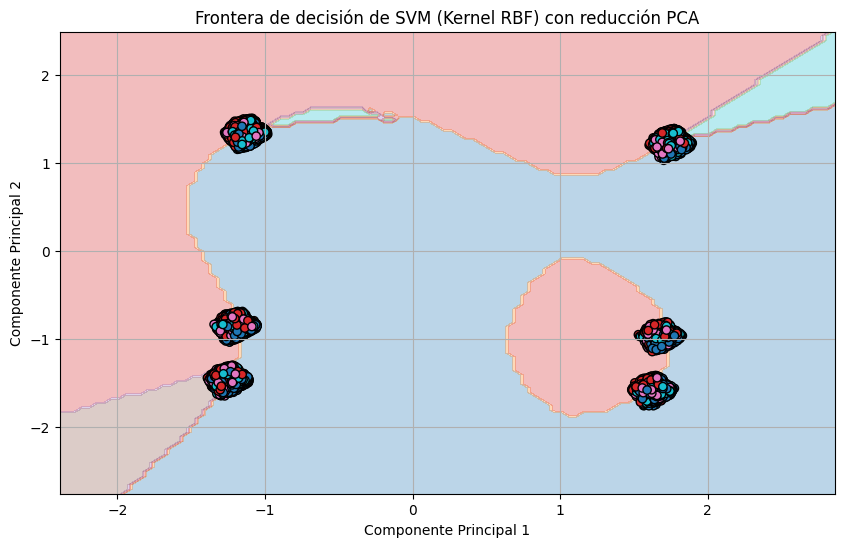

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_svm = pca.fit_transform(X_train_scaled_v1)
y_svm = v1['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_svm, y_svm)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_svm[:, 0].min() - 1, X_svm[:, 0].max() + 1
y_min, y_max = X_svm[:, 1].min() - 1, X_svm[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_svm, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de SVM (Kernel RBF) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### Red Neuronal

In [ ]:
# Convertir etiquetas a categorías si es necesario (para categorical_crossentropy)
num_classes = len(np.unique(v2['y_train']))
y_train_cat_v2 = tf.keras.utils.to_categorical(v2['y_train'], num_classes)
y_test_cat_v2 = tf.keras.utils.to_categorical(v2['y_test'], num_classes)

In [ ]:
# Crear modelo
def crear_modelo(dropout_rate=0.2):
    model = models.Sequential([
        layers.Input(shape=(X_train_scaled_v2.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    callbacks.ReduceLROnPlateau(patience=5, factor=0.5, monitor='val_loss')
]


# Entrenar modelo
model_v2 = crear_modelo(dropout_rate=0.2)
history = model_v2.fit(
    X_train_scaled_v2, y_train_cat_v2,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6071 - loss: 1.0258 - val_accuracy: 0.2200 - val_loss: 1.5250 - learning_rate: 0.0010
Epoch 2/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7813 - loss: 0.6280 - val_accuracy: 0.4341 - val_loss: 1.2163 - learning_rate: 0.0010
Epoch 3/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8125 - loss: 0.5584 - val_accuracy: 0.4629 - val_loss: 1.1681 - learning_rate: 0.0010
Epoch 4/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8263 - loss: 0.5294 - val_accuracy: 0.5914 - val_loss: 0.9385 - learning_rate: 0.0010
Epoch 5/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8312 - loss: 0.5149 - val_accuracy: 0.5734 - val_loss: 0.9916 - learning_rate: 0.0010
Epoch 6/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8432 - loss: 0.4875 - val_accuracy: 0.5717 - val_loss: 1.0148 - learning_rate: 0.0010
Epoch 7/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8518 - loss: 0.

In [ ]:
# Evaluación
y_pred_test_v2 = np.argmax(model_v2.predict(X_test_scaled_v2), axis=1)
y_true_test_v2 = v2['y_test']
print(classification_report(v2['y_test'], y_pred_test_v2))

print("="*20 + " Evaluación en conjunto de prueba " + "="*20)
print(classification_report(y_true_test_v2, y_pred_test_v2))

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2007
           1       0.85      0.90      0.88      1955
           2       0.88      0.95      0.91      1821
           3       0.92      0.81      0.86      1824

    accuracy                           0.89      7607
   macro avg       0.89      0.89      0.88      7607
weighted avg       0.89      0.89      0.88      7607

==================== Evaluación en conjunto de prueba ====================
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2007
           1       0.85      0.90      0.88      1955
           2       0.88      0.95      0.91      1821
           3       0.92      0.81      0.86      1824

    accuracy                           0.89      7607
   macro avg       0.89      0.89      0.88      7607
weighted avg       0.89      0.89      0.88      7607



In [ ]:
# Prueba casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

test_cases_array = np.array(test_cases)
test_cases_scaled = scaler.transform(test_cases_array)

pred_probs = model_v2.predict(test_cases_scaled)
pred_classes = np.argmax(pred_probs, axis=1)
# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(pred_classes):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es medium high


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Dataset v3

### DecisionTree

In [ ]:
# Entrenar modelo de DecisionTree
tree_model_v3 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

print("Shape of X_train:", v3['X_train'].shape)
print("Shape of y_train:", v3['y_train'].shape)
tree_model_v3.fit(v3['X_train'], v3['y_train'])

y_pred_tree_v3 = tree_model_v3.predict(v3['X_test'])

Shape of X_train: (30506, 21)
Shape of y_train: (30506,)


In [ ]:
# Obtener métricas (accuracy, precision, F1-Score)
print(classification_report(v3['y_test'], y_pred_tree_v3))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1941
           1       0.81      0.82      0.81      1960
           2       0.80      0.87      0.83      1875
           3       0.83      0.84      0.84      1851

    accuracy                           0.82      7627
   macro avg       0.82      0.82      0.82      7627
weighted avg       0.82      0.82      0.82      7627



In [ ]:
# ====================================================== Casos de prueba ===============================================================================
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

feature_names = v3['X_train'].columns

# Hacer prediccion para cada caso de prueba
for i, case in enumerate(test_cases):
  case_df = pd.DataFrame([case], columns=feature_names)

  prediction = tree_model_v3.predict(case_df)

  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if prediction[0] == 0:
    prediction_label = "high"
  elif prediction[0] == 1:
    prediction_label = "low"
  elif prediction[0] == 2:
    prediction_label = "medium high"
  elif prediction[0] == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"

  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

Caso de prueba 1: La predicción es low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es medium high



Importancia de las Features:
                      feature  importance
3             SessionsPerWeek    0.507230
6        AchievementsUnlocked    0.249182
4   AvgSessionDurationMinutes    0.239589
5                 PlayerLevel    0.003817
7            GameGenre_Action    0.000181
1               PlayTimeHours    0.000000
2             InGamePurchases    0.000000
0                         Age    0.000000
8               GameGenre_RPG    0.000000
9        GameGenre_Simulation    0.000000
10           GameGenre_Sports    0.000000
11         GameGenre_Strategy    0.000000
12              Gender_Female    0.000000
13                Gender_Male    0.000000
14              Location_Asia    0.000000
15            Location_Europe    0.000000
16             Location_Other    0.000000
17               Location_USA    0.000000
18        GameDifficulty_Easy    0.000000
19        GameDifficulty_Hard    0.000000
20      GameDifficulty_Medium    0.000000


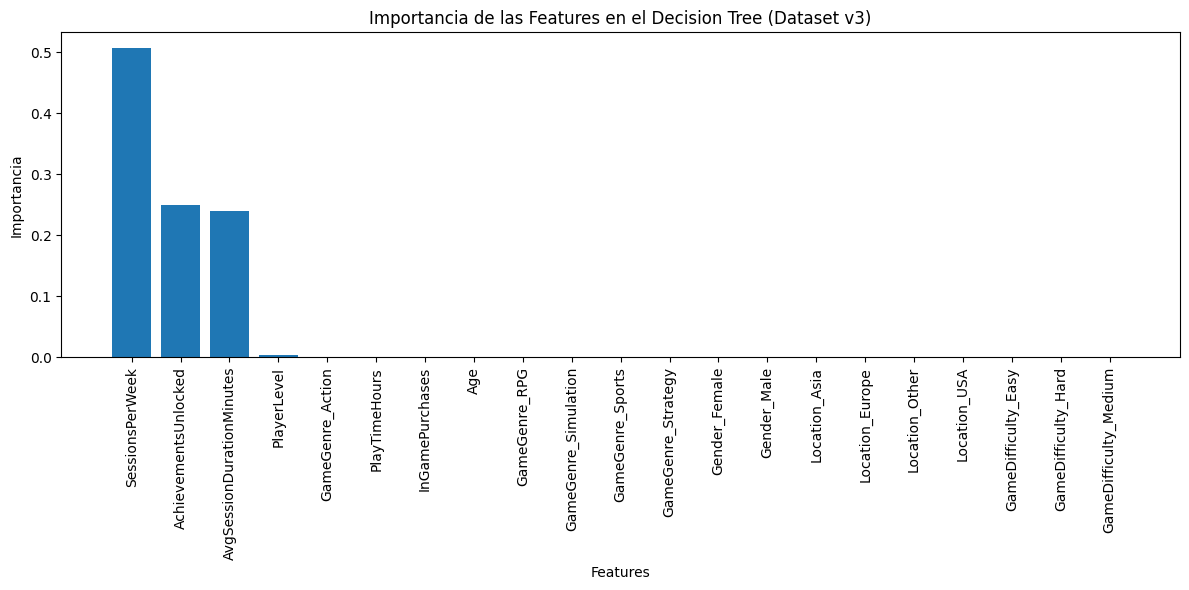

In [ ]:
# Obtener la importancia de las features
feature_importances_v3 = tree_model_v3.feature_importances_

# Crear un DataFrame para visualizar la importancia
importance_df_v3 = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_v3})

# Ordenar por importancia descendente
importance_df_v3 = importance_df_v3.sort_values('importance', ascending=False)

# Imprimir la importancia de las features
print("\nImportancia de las Features:")
print(importance_df_v3)

# Generar gráfico de barras de la importancia de las features
plt.figure(figsize=(12, 6))
plt.bar(importance_df_v3['feature'], importance_df_v3['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importancia")
plt.title("Importancia de las Features en el Decision Tree (Dataset v3)")
plt.tight_layout()
plt.show()

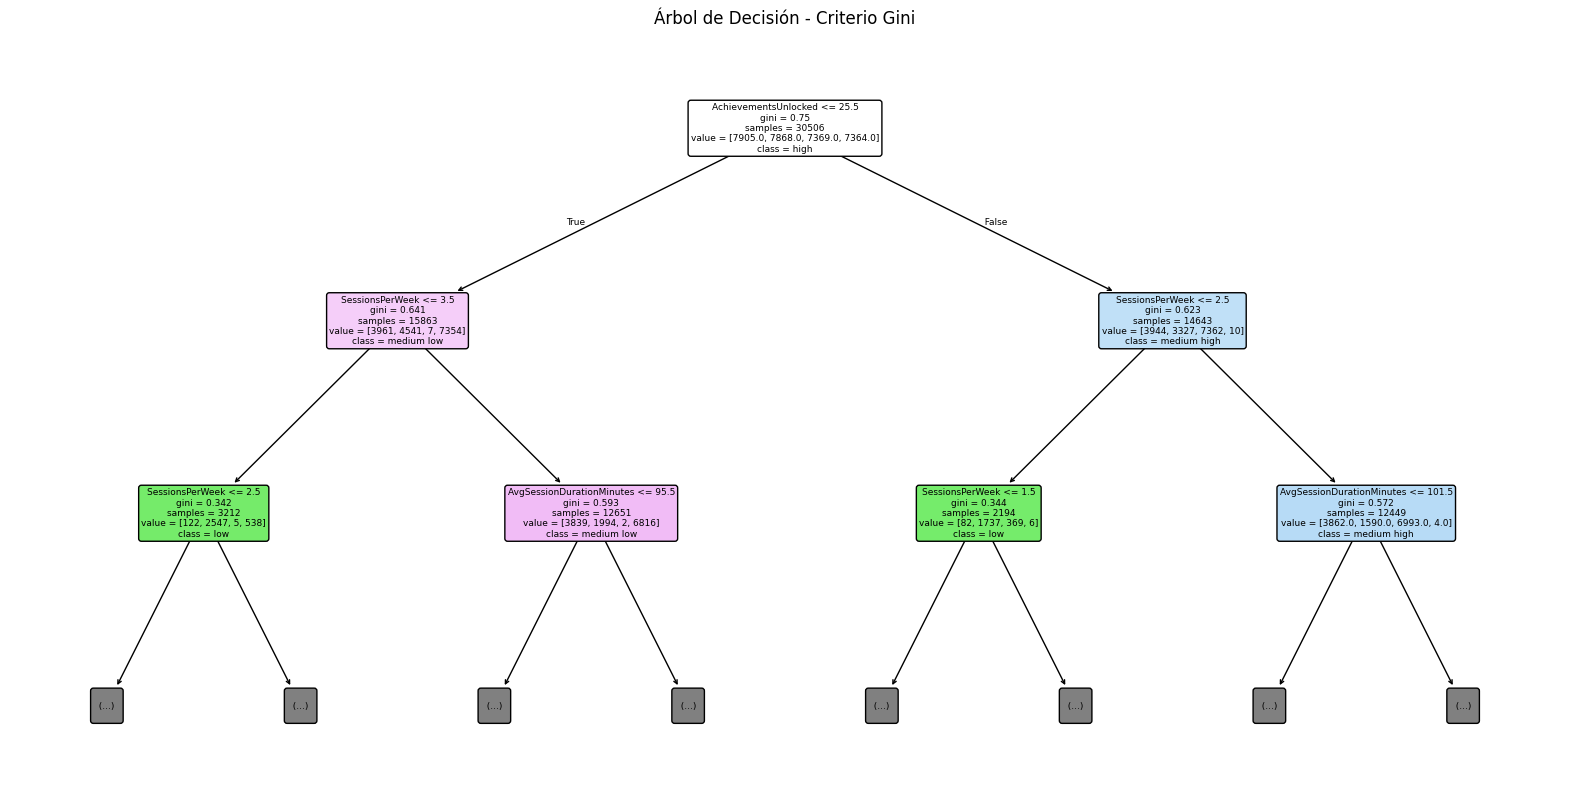

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model_v3,
    feature_names=v3['X_train'].columns,
    class_names=["high", "low", "medium high", "medium low"],
    filled=True,
    rounded=True,
    max_depth=2 # Limitamos mucho la profundidad para legibilidad del gráfico
    )
plt.title("Árbol de Decisión - Criterio Gini")
plt.show()

### KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled_v3 = scaler.fit_transform(v3['X_train'])
X_test_scaled_v3 = scaler.transform(v3['X_test'])

In [ ]:
# Entrenar el modelo de KNN
model_knn_v3 = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
model_knn_v3.fit(X_train_scaled_v3, v3['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_knn_v3 = model_knn_v3.predict(X_test_scaled_v3)

# Obtención métricas
print("Evaluación del modelo KNN")
print("=" * 60)
print(classification_report(v3['y_test'], y_pred_knn_v3))

Evaluación del modelo KNN
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1941
           1       0.65      0.62      0.63      1960
           2       0.65      0.63      0.64      1875
           3       0.64      0.58      0.61      1851

    accuracy                           0.66      7627
   macro avg       0.65      0.66      0.65      7627
weighted avg       0.65      0.66      0.65      7627



In [ ]:
# Casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

# Asegurar que los casos de prueba sean escalados si el modelo utiliza datos normalizados
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_v3 = model_knn_v3.predict(test_cases_scaled)

# Muestra de resultados de cada caso
print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(predictions_v3):
  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if pred == 0:
    prediction_label = "high"
  elif pred == 1:
    prediction_label = "low"
  elif pred == 2:
    prediction_label = "medium high"
  elif pred == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"
  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es medium low


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


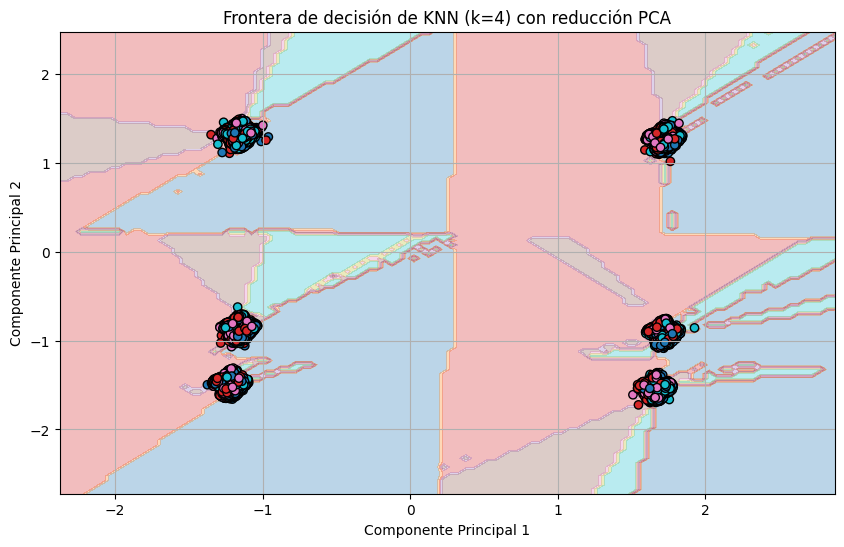

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_knn = pca.fit_transform(X_train_scaled_v3)
y_knn = v3['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
knn = KNeighborsClassifier(n_neighbors=19, metric='minkowski', p=2)
knn.fit(X_knn, y_knn)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de KNN (k=4) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### SVM


In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled_v3 = scaler.fit_transform(v3['X_train'])
X_test_scaled_v3 = scaler.transform(v3['X_test'])

In [ ]:
# Entrenar el modelo de SVM
model_svm_v3 = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model_svm_v3.fit(X_train_scaled_v3, v3['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_svm_v3 = model_svm_v3.predict(X_test_scaled_v3)

# Obtención métricas
print("Evaluación del modelo SVM")
print("=" * 60)
print(classification_report(v3['y_test'], y_pred_svm_v3))

Evaluación del modelo SVM
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1941
           1       0.86      0.82      0.84      1960
           2       0.86      0.90      0.88      1875
           3       0.86      0.88      0.87      1851

    accuracy                           0.87      7627
   macro avg       0.87      0.87      0.87      7627
weighted avg       0.87      0.87      0.87      7627



In [ ]:
# Casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

# Escalar los casos de prueba
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_svm_v3 = model_svm_v3.predict(test_cases_scaled)

# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas SVM " + "="*30)
for i, pred in enumerate(predictions_svm_v3):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: Predicción -> {prediction_label}")
print("="*80)

============================== Resultados de Pruebas SVM ==============================
Caso de prueba 1: Predicción -> low
Caso de prueba 2: Predicción -> high
Caso de prueba 3: Predicción -> low


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


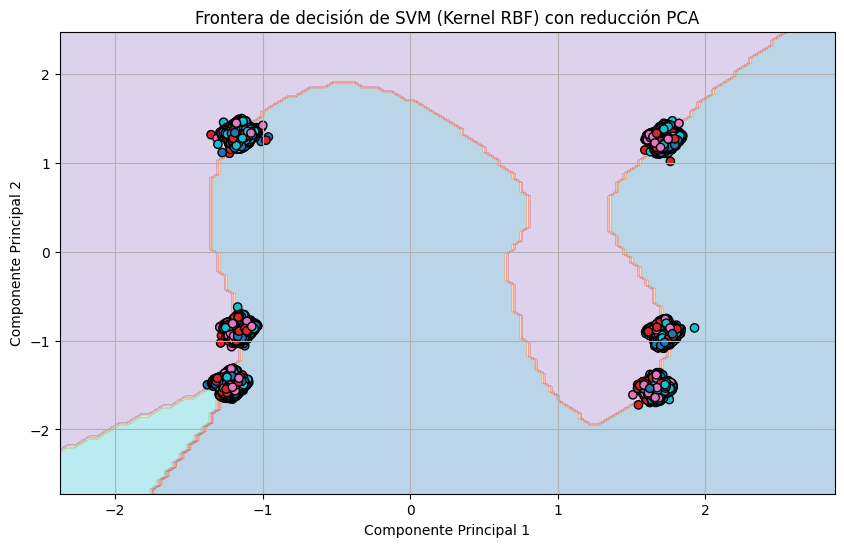

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_svm = pca.fit_transform(X_train_scaled_v3)
y_svm = v3['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_svm, y_svm)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_svm[:, 0].min() - 1, X_svm[:, 0].max() + 1
y_min, y_max = X_svm[:, 1].min() - 1, X_svm[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_svm, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de SVM (Kernel RBF) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### Red Neuronal

In [ ]:
# Convertir etiquetas a categorías si es necesario (para categorical_crossentropy)
num_classes = len(np.unique(v3['y_train']))
y_train_cat_v3 = tf.keras.utils.to_categorical(v3['y_train'], num_classes)
y_test_cat_v3 = tf.keras.utils.to_categorical(v3['y_test'], num_classes)

In [ ]:
# Crear modelo
def crear_modelo(dropout_rate=0.2):
    model = models.Sequential([
        layers.Input(shape=(X_train_scaled_v3.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    callbacks.ReduceLROnPlateau(patience=5, factor=0.5, monitor='val_loss')
]


# Entrenar modelo
model_v3 = crear_modelo(dropout_rate=0.2)
history = model_v3.fit(
    X_train_scaled_v3, y_train_cat_v3,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5398 - loss: 1.1371 - val_accuracy: 0.8084 - val_loss: 0.6145 - learning_rate: 0.0010
Epoch 2/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7354 - loss: 0.7225 - val_accuracy: 0.8514 - val_loss: 0.5247 - learning_rate: 0.0010
Epoch 3/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7802 - loss: 0.6306 - val_accuracy: 0.8653 - val_loss: 0.4850 - learning_rate: 0.0010
Epoch 4/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7999 - loss: 0.5806 - val_accuracy: 0.8787 - val_loss: 0.4562 - learning_rate: 0.0010
Epoch 5/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8184 - loss: 0.5517 - val_accuracy: 0.8820 - val_loss: 0.4391 - learning_rate: 0.0010
Epoch 6/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8220 - loss: 0.5397 - val_accuracy: 0.8832 - val_loss: 0.4310 - learning_rate: 0.0010
Epoch 7/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8322 - loss: 0.

In [ ]:
# Evaluación en test real
y_pred_test_v3 = np.argmax(model_v3.predict(X_test_scaled_v3), axis=1)
y_true_test_v3 = v3['y_test']
print(classification_report(v3['y_test'], y_pred_test_v3))


print("="*20 + " Evaluación en conjunto de prueba " + "="*20)
print(classification_report(y_true_test_v3, y_pred_test_v3))

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1941
           1       0.92      0.90      0.91      1960
           2       0.93      0.94      0.93      1875
           3       0.93      0.94      0.93      1851

    accuracy                           0.92      7627
   macro avg       0.92      0.92      0.92      7627
weighted avg       0.92      0.92      0.92      7627

==================== Evaluación en conjunto de prueba ====================
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1941
           1       0.92      0.90      0.91      1960
           2       0.93      0.94      0.93      1875
           3       0.93      0.94      0.93      1851

    accuracy                           0.92      7627
   macro avg       0.92      0.92      0.92      7627
weighted avg       0.92      0.92      0.92      7627



In [ ]:
# Prueba casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

test_cases_array = np.array(test_cases)
test_cases_scaled = scaler.transform(test_cases_array)

pred_probs = model_v3.predict(test_cases_scaled)
pred_classes = np.argmax(pred_probs, axis=1)
# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(pred_classes):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es medium high


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Dataset v4

### DecisionTree

In [ ]:
# Entrenar modelo de DecisionTree
tree_model_v4 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

print("Shape of X_train:", v4['X_train'].shape)
print("Shape of y_train:", v4['y_train'].shape)
tree_model_v4.fit(v4['X_train'], v4['y_train'])

y_pred_tree_v4 = tree_model_v4.predict(v4['X_test'])

Shape of X_train: (29488, 21)
Shape of y_train: (29488,)


In [ ]:
# Obtener métricas (accuracy, precision, F1-Score)
print(classification_report(v4['y_test'], y_pred_tree_v4))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1960
           1       0.83      0.75      0.79      1947
           2       0.79      0.92      0.85      1870
           3       0.80      0.85      0.82      1850

    accuracy                           0.82      7627
   macro avg       0.82      0.82      0.82      7627
weighted avg       0.82      0.82      0.82      7627



In [ ]:
# ====================================================== Casos de prueba ===============================================================================
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

feature_names = v4['X_train'].columns

# Hacer prediccion para cada caso de prueba
for i, case in enumerate(test_cases):
  case_df = pd.DataFrame([case], columns=feature_names)

  prediction = tree_model_v4.predict(case_df)

  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if prediction[0] == 0:
    prediction_label = "high"
  elif prediction[0] == 1:
    prediction_label = "low"
  elif prediction[0] == 2:
    prediction_label = "medium high"
  elif prediction[0] == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"

  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

Caso de prueba 1: La predicción es low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es medium high



Importancia de las Features:
                      feature  importance
3             SessionsPerWeek    0.511585
6        AchievementsUnlocked    0.263641
4   AvgSessionDurationMinutes    0.220590
5                 PlayerLevel    0.004159
17               Location_USA    0.000026
1               PlayTimeHours    0.000000
2             InGamePurchases    0.000000
0                         Age    0.000000
7            GameGenre_Action    0.000000
9        GameGenre_Simulation    0.000000
10           GameGenre_Sports    0.000000
11         GameGenre_Strategy    0.000000
8               GameGenre_RPG    0.000000
12              Gender_Female    0.000000
13                Gender_Male    0.000000
15            Location_Europe    0.000000
14              Location_Asia    0.000000
16             Location_Other    0.000000
18        GameDifficulty_Easy    0.000000
19        GameDifficulty_Hard    0.000000
20      GameDifficulty_Medium    0.000000


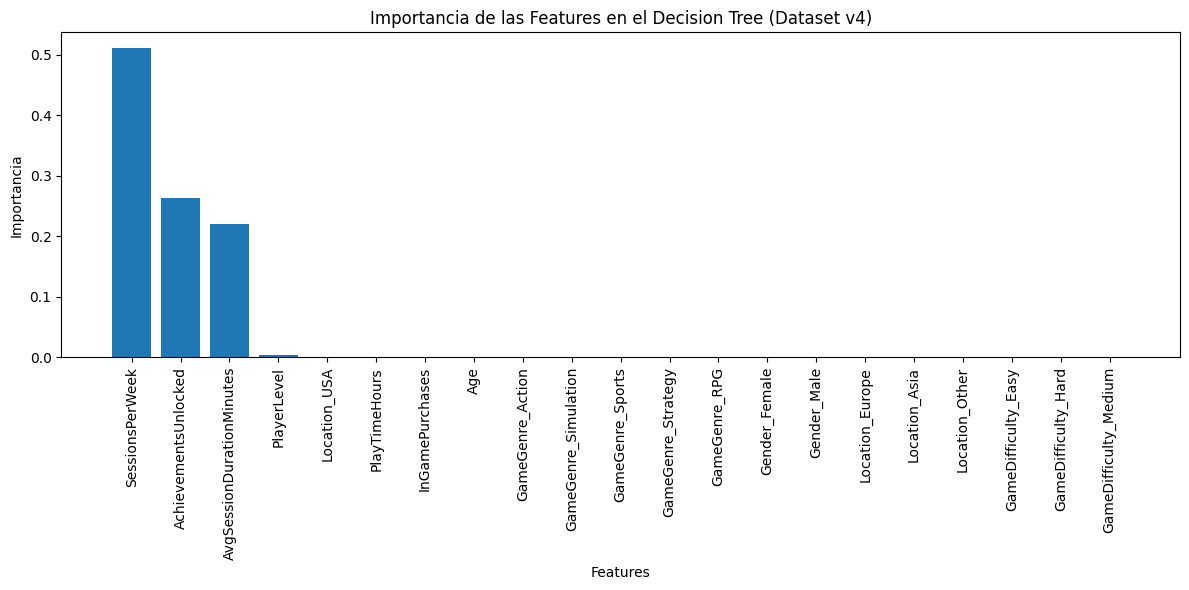

In [ ]:
# Obtener la importancia de las features
feature_importances_v4 = tree_model_v4.feature_importances_

# Crear un DataFrame para visualizar la importancia
importance_df_v4 = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_v4})

# Ordenar por importancia descendente
importance_df_v4 = importance_df_v4.sort_values('importance', ascending=False)

# Imprimir la importancia de las features
print("\nImportancia de las Features:")
print(importance_df_v4)

# Generar gráfico de barras de la importancia de las features
plt.figure(figsize=(12, 6))
plt.bar(importance_df_v4['feature'], importance_df_v4['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importancia")
plt.title("Importancia de las Features en el Decision Tree (Dataset v4)")
plt.tight_layout()
plt.show()

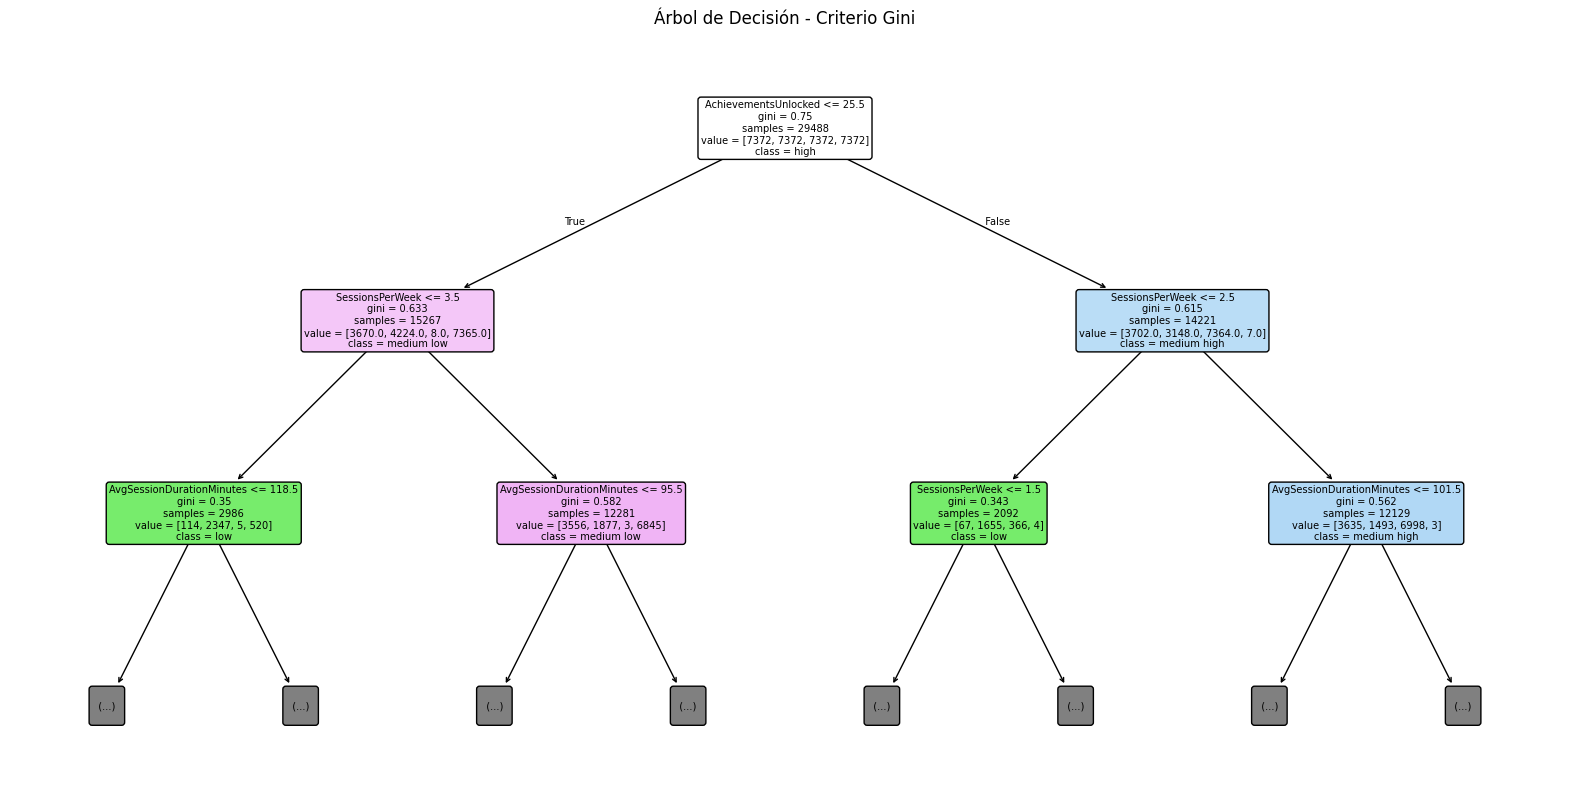

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model_v4,
    feature_names=v4['X_train'].columns,
    class_names=["high", "low", "medium high", "medium low"],
    filled=True,
    rounded=True,
    max_depth=2 # Limitamos mucho la profundidad para legibilidad del gráfico
    )
plt.title("Árbol de Decisión - Criterio Gini")
plt.show()

### KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled_v4 = scaler.fit_transform(v4['X_train'])
X_test_scaled_v4 = scaler.transform(v4['X_test'])

In [ ]:
# Entrenar el modelo de KNN
model_knn_v4 = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
model_knn_v4.fit(X_train_scaled_v4, v4['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_knn_v4 = model_knn_v4.predict(X_test_scaled_v4)

# Obtención métricas
print("Evaluación del modelo KNN")
print("=" * 60)
print(classification_report(v4['y_test'], y_pred_knn_v4))

Evaluación del modelo KNN
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1960
           1       0.64      0.62      0.63      1947
           2       0.63      0.61      0.62      1870
           3       0.62      0.57      0.59      1850

    accuracy                           0.64      7627
   macro avg       0.64      0.64      0.64      7627
weighted avg       0.64      0.64      0.64      7627



In [ ]:
# Casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

# Asegurar que los casos de prueba sean escalados si el modelo utiliza datos normalizados
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_v4 = model_knn_v4.predict(test_cases_scaled)

# Muestra de resultados de cada caso
print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(predictions_v4):
  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if pred == 0:
    prediction_label = "high"
  elif pred == 1:
    prediction_label = "low"
  elif pred == 2:
    prediction_label = "medium high"
  elif pred == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"
  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es low


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


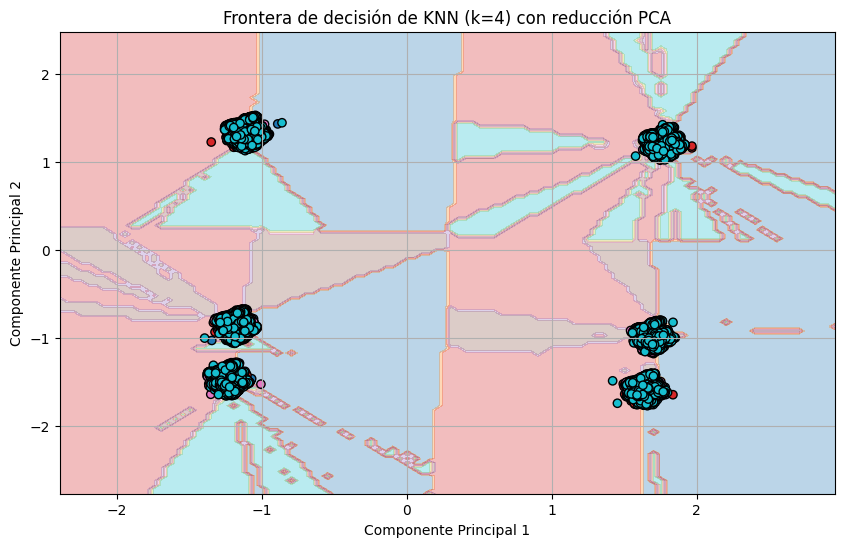

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_knn = pca.fit_transform(X_train_scaled_v4)
y_knn = v4['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
knn = KNeighborsClassifier(n_neighbors=19, metric='minkowski', p=2)
knn.fit(X_knn, y_knn)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de KNN (k=4) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### SVM


In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled_v4 = scaler.fit_transform(v4['X_train'])
X_test_scaled_v4 = scaler.transform(v4['X_test'])

In [ ]:
# Entrenar el modelo de SVM
model_svm_v4 = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model_svm_v4.fit(X_train_scaled_v4, v4['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_svm_v4 = model_svm_v4.predict(X_test_scaled_v4)

# Obtención métricas
print("Evaluación del modelo SVM")
print("=" * 60)
print(classification_report(v4['y_test'], y_pred_svm_v4))

Evaluación del modelo SVM
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1960
           1       0.84      0.79      0.82      1947
           2       0.84      0.90      0.87      1870
           3       0.83      0.88      0.85      1850

    accuracy                           0.85      7627
   macro avg       0.85      0.85      0.85      7627
weighted avg       0.85      0.85      0.85      7627



In [ ]:
# Casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

# Escalar los casos de prueba
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_svm_v4 = model_svm_v4.predict(test_cases_scaled)

# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas SVM " + "="*30)
for i, pred in enumerate(predictions_svm_v4):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: Predicción -> {prediction_label}")
print("="*80)

============================== Resultados de Pruebas SVM ==============================
Caso de prueba 1: Predicción -> low
Caso de prueba 2: Predicción -> high
Caso de prueba 3: Predicción -> low


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


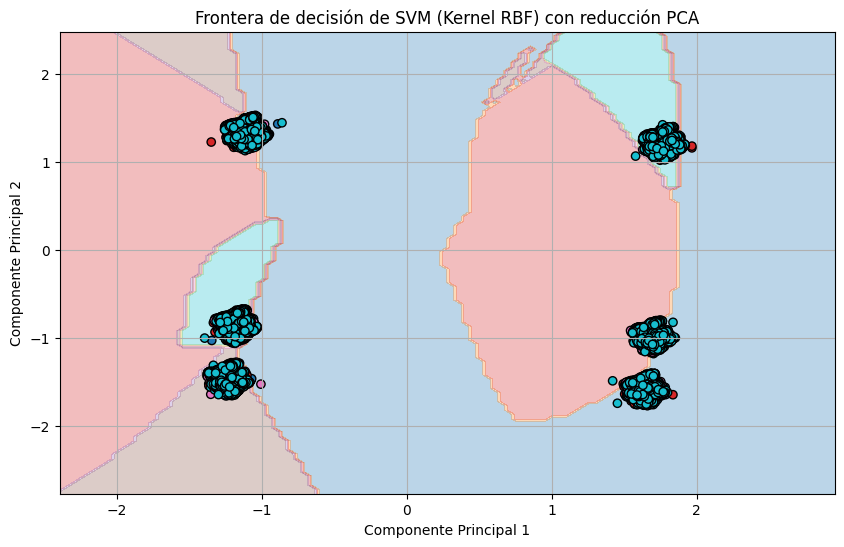

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_svm = pca.fit_transform(X_train_scaled_v4)
y_svm = v4['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_svm, y_svm)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_svm[:, 0].min() - 1, X_svm[:, 0].max() + 1
y_min, y_max = X_svm[:, 1].min() - 1, X_svm[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_svm, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de SVM (Kernel RBF) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### Red Neuronal

In [ ]:
# Convertir etiquetas a categorías si es necesario (para categorical_crossentropy)
num_classes = len(np.unique(v4['y_train']))
y_train_cat_v4 = tf.keras.utils.to_categorical(v4['y_train'], num_classes)
y_test_cat_v4 = tf.keras.utils.to_categorical(v4['y_test'], num_classes)

In [ ]:
# Crear modelo
def crear_modelo(dropout_rate=0.2):
    model = models.Sequential([
        layers.Input(shape=(X_train_scaled_v4.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    callbacks.ReduceLROnPlateau(patience=5, factor=0.5, monitor='val_loss')
]


# Entrenar modelo
model_v4 = crear_modelo(dropout_rate=0.2)
history = model_v4.fit(
    X_train_scaled_v4, y_train_cat_v4,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5862 - loss: 1.0911 - val_accuracy: 0.1679 - val_loss: 1.6489 - learning_rate: 0.0010
Epoch 2/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7808 - loss: 0.6403 - val_accuracy: 0.4446 - val_loss: 1.2210 - learning_rate: 0.0010
Epoch 3/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8042 - loss: 0.5771 - val_accuracy: 0.5324 - val_loss: 1.1248 - learning_rate: 0.0010
Epoch 4/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8294 - loss: 0.5311 - val_accuracy: 0.5409 - val_loss: 1.1328 - learning_rate: 0.0010
Epoch 5/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8387 - loss: 0.5035 - val_accuracy: 0.5895 - val_loss: 1.0406 - learning_rate: 0.0010
Epoch 6/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8439 - loss: 0.4911 - val_accuracy: 0.6333 - val_loss: 0.9420 - learning_rate: 0.0010
Epoch 7/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8524 - loss: 0.

In [ ]:
# Evaluación en test real
y_pred_test_v4 = np.argmax(model_v4.predict(X_test_scaled_v4), axis=1)
y_true_test_v4 = v4['y_test']
print(classification_report(v4['y_test'], y_pred_test_v4))


print("="*20 + " Evaluación en conjunto de prueba " + "="*20)
print(classification_report(y_true_test_v4, y_pred_test_v4))

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1960
           1       0.85      0.89      0.87      1947
           2       0.89      0.93      0.91      1870
           3       0.92      0.78      0.84      1850

    accuracy                           0.88      7627
   macro avg       0.88      0.87      0.87      7627
weighted avg       0.88      0.88      0.87      7627

==================== Evaluación en conjunto de prueba ====================
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1960
           1       0.85      0.89      0.87      1947
           2       0.89      0.93      0.91      1870
           3       0.92      0.78      0.84      1850

    accuracy                           0.88      7627
   macro avg       0.88      0.87      0.87      7627
weighted avg       0.88      0.88      0.87      7627



In [ ]:
# Prueba casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

test_cases_array = np.array(test_cases)
test_cases_scaled = scaler.transform(test_cases_array)

pred_probs = model_v4.predict(test_cases_scaled)
pred_classes = np.argmax(pred_probs, axis=1)
# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(pred_classes):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es medium high


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Dataset v5

### DecisionTree

In [ ]:
# Entrenar modelo de DecisionTree
tree_model_v5 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

tree_model_v5.fit(v5['X_train'], v5['y_train'])

y_pred_tree_v5 = tree_model_v5.predict(v5['X_test'])

In [ ]:
# Obtener métricas (accuracy, precision, F1-Score)
print(classification_report(v5['y_test'], y_pred_tree_v5))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1946
           1       0.85      0.75      0.80      1966
           2       0.77      0.92      0.84      1895
           3       0.82      0.86      0.84      1800

    accuracy                           0.82      7607
   macro avg       0.82      0.82      0.82      7607
weighted avg       0.83      0.82      0.82      7607



In [ ]:
# ====================================================== Casos de prueba ===============================================================================
test_cases = [
    [27, 0.00, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],  # Ejemplo 1
    [18, 60.35, 8, 16, 130, 260, 67, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [32, 10.12, 0, 2, 55, 58, 15, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 3
]

feature_names = v1['X_train'].columns

# Hacer prediccion para cada caso de prueba
for i, case in enumerate(test_cases):
  case_df = pd.DataFrame([case], columns=feature_names)

  prediction = tree_model_v5.predict(case_df)

  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if prediction[0] == 0:
    prediction_label = "high"
  elif prediction[0] == 1:
    prediction_label = "low"
  elif prediction[0] == 2:
    prediction_label = "medium high"
  elif prediction[0] == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"

  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

Caso de prueba 1: La predicción es medium low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es high


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



Importancia de las Features:
                      feature  importance
0                         Age    0.000000
1               PlayTimeHours    0.000124
2             InGamePurchases    0.000000
3             SessionsPerWeek    0.502900
4   AvgSessionDurationMinutes    0.245230
5                 PlayerLevel    0.003926
6        AchievementsUnlocked    0.247820
7            GameGenre_Action    0.000000
8               GameGenre_RPG    0.000000
9        GameGenre_Simulation    0.000000
10           GameGenre_Sports    0.000000
11         GameGenre_Strategy    0.000000
12              Gender_Female    0.000000
13                Gender_Male    0.000000
14              Location_Asia    0.000000
15            Location_Europe    0.000000
16             Location_Other    0.000000
17               Location_USA    0.000000
18        GameDifficulty_Easy    0.000000
19        GameDifficulty_Hard    0.000000
20      GameDifficulty_Medium    0.000000


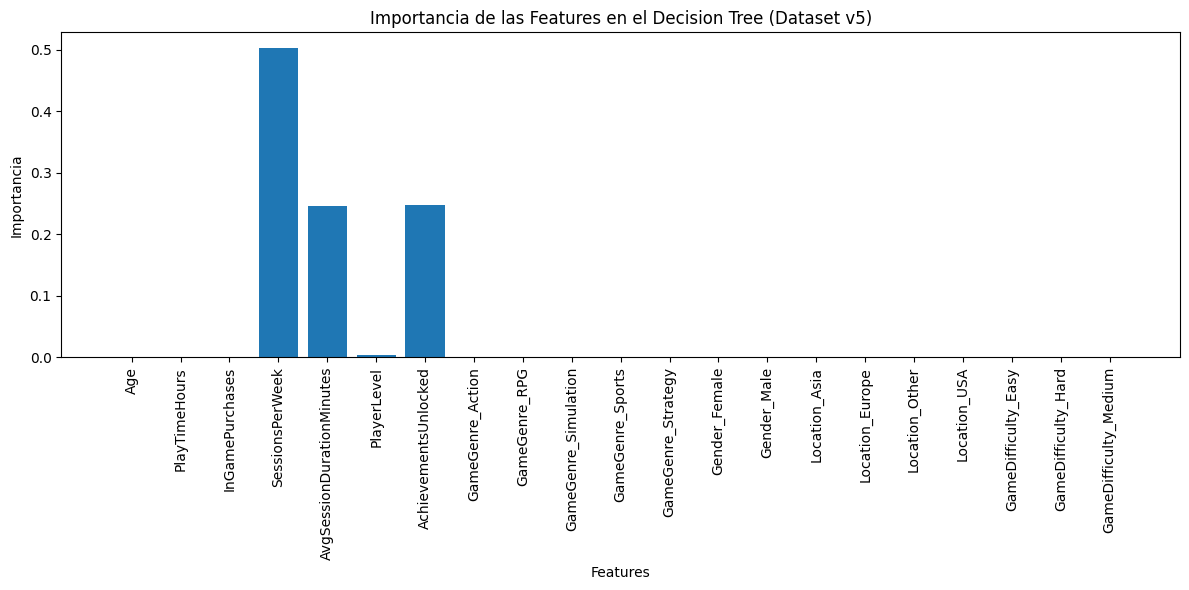

In [ ]:
# Obtener la importancia de las features
feature_importances_v5 = tree_model_v5.feature_importances_

# Crear un DataFrame para visualizar la importancia
importance_df_v5 = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_v5})

# Ordenar por importancia descendente
importance_df_v6 = importance_df_v5.sort_values('importance', ascending=False)

# Imprimir la importancia de las features
print("\nImportancia de las Features:")
print(importance_df_v5)

# Generar gráfico de barras de la importancia de las features
plt.figure(figsize=(12, 6))
plt.bar(importance_df_v5['feature'], importance_df_v5['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importancia")
plt.title("Importancia de las Features en el Decision Tree (Dataset v5)")
plt.tight_layout()
plt.show()

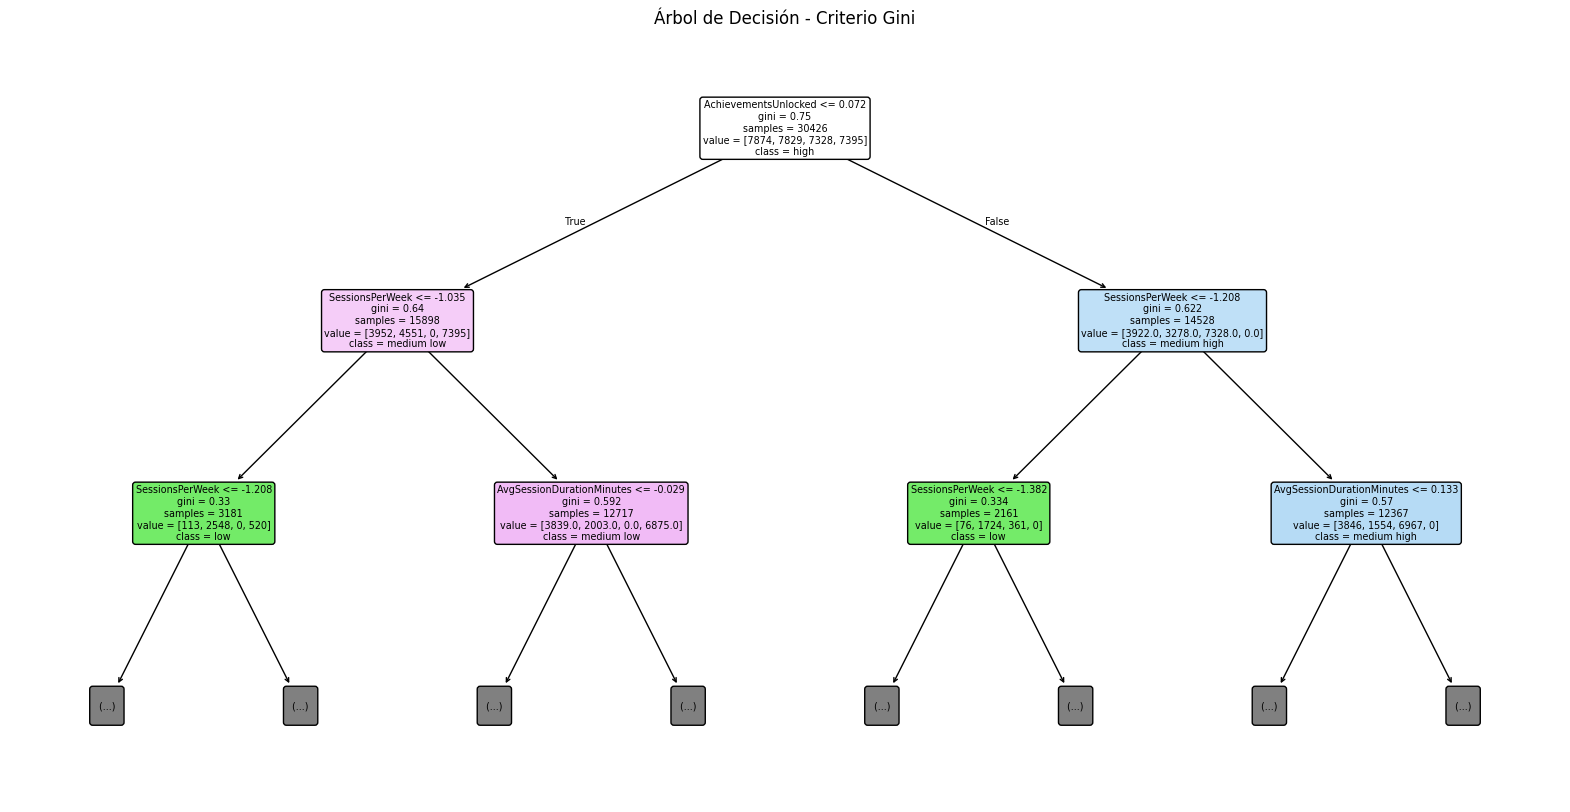

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model_v5,
    feature_names=v1['X_train'].columns,
    class_names=["high", "low", "medium high", "medium low"],
    filled=True,
    rounded=True,
    max_depth=2 # Limitamos mucho la profundidad para legibilidad del gráfico
    )
plt.title("Árbol de Decisión - Criterio Gini")
plt.show()

### KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled_v5 = scaler.fit_transform(v5['X_train'])
X_test_scaled_v5 = scaler.transform(v5['X_test'])

In [ ]:
# Entrenar el modelo de KNN
model_knn_v5 = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
model_knn_v5.fit(X_train_scaled_v5, v5['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_knn_v5 = model_knn_v5.predict(X_test_scaled_v5)

# Obtención métricas
print("Evaluación del modelo KNN")
print("=" * 60)
print(classification_report(v5['y_test'], y_pred_knn_v5))

Evaluación del modelo KNN
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1946
           1       0.64      0.61      0.63      1966
           2       0.65      0.63      0.64      1895
           3       0.62      0.57      0.60      1800

    accuracy                           0.65      7607
   macro avg       0.65      0.65      0.65      7607
weighted avg       0.65      0.65      0.65      7607



In [ ]:
# Casos de prueba
test_cases = [
    [27, 0.00, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],  # Ejemplo 1
    [18, 60.35, 8, 16, 130, 260, 67, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [32, 10.12, 0, 2, 55, 58, 15, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 3
]

# Asegurar que los casos de prueba sean escalados si el modelo utiliza datos normalizados
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_v5 = model_knn_v5.predict(test_cases_scaled)

# Muestra de resultados de cada caso
print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(predictions_v5):
  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if pred == 0:
    prediction_label = "high"
  elif pred == 1:
    prediction_label = "low"
  elif pred == 2:
    prediction_label = "medium high"
  elif pred == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"
  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es medium low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es high


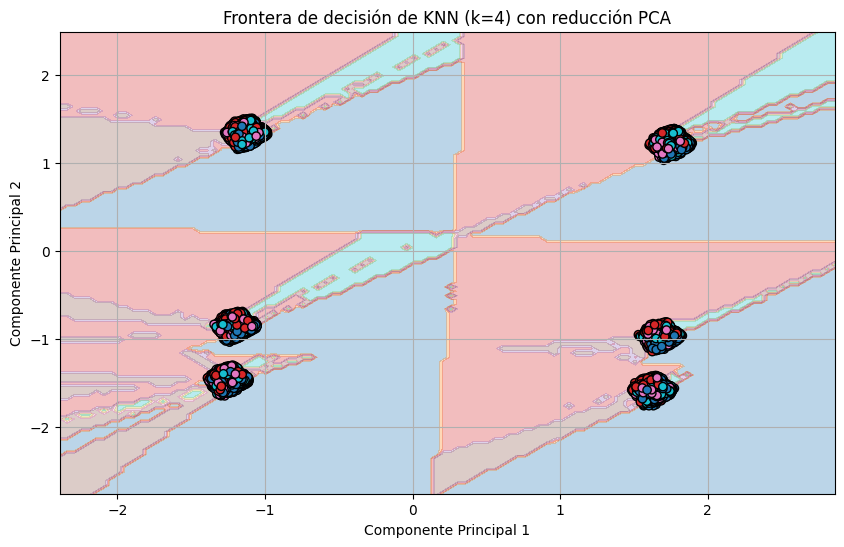

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_knn = pca.fit_transform(X_train_scaled_v5)
y_knn = v5['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
knn = KNeighborsClassifier(n_neighbors=19, metric='minkowski', p=2)
knn.fit(X_knn, y_knn)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de KNN (k=4) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### SVM


In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled_v5 = scaler.fit_transform(v5['X_train'])
X_test_scaled_v5 = scaler.transform(v5['X_test'])

In [ ]:
# Entrenar el modelo de SVM
model_svm_v5 = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model_svm_v5.fit(X_train_scaled_v5, v5['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_svm_v5 = model_svm_v5.predict(X_test_scaled_v5)

# Obtención métricas
print("Evaluación del modelo SVM")
print("=" * 60)
print(classification_report(v5['y_test'], y_pred_svm_v5))

Evaluación del modelo SVM
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1946
           1       0.86      0.81      0.83      1966
           2       0.85      0.89      0.87      1895
           3       0.85      0.89      0.87      1800

    accuracy                           0.86      7607
   macro avg       0.86      0.86      0.86      7607
weighted avg       0.86      0.86      0.86      7607



In [ ]:
# Casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

# Escalar los casos de prueba
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_svm_v5 = model_svm_v5.predict(test_cases_scaled)

# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas SVM " + "="*30)
for i, pred in enumerate(predictions_svm_v5):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: Predicción -> {prediction_label}")
print("="*80)

============================== Resultados de Pruebas SVM ==============================
Caso de prueba 1: Predicción -> low
Caso de prueba 2: Predicción -> low
Caso de prueba 3: Predicción -> low


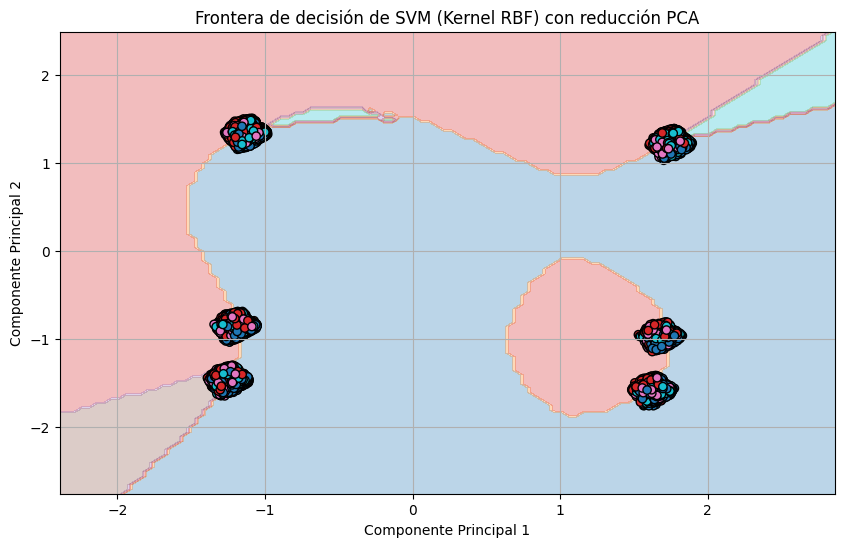

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_svm = pca.fit_transform(X_train_scaled_v5)
y_svm = v5['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_svm, y_svm)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_svm[:, 0].min() - 1, X_svm[:, 0].max() + 1
y_min, y_max = X_svm[:, 1].min() - 1, X_svm[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_svm, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de SVM (Kernel RBF) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### Red Neuronal

In [ ]:
# Convertir etiquetas a categorías si es necesario (para categorical_crossentropy)
num_classes = len(np.unique(v5['y_train']))
y_train_cat_v5 = tf.keras.utils.to_categorical(v5['y_train'], num_classes)
y_test_cat_v5 = tf.keras.utils.to_categorical(v5['y_test'], num_classes)

In [ ]:
# Crear modelo
def crear_modelo(dropout_rate=0.2):
    model = models.Sequential([
        layers.Input(shape=(X_train_scaled_v5.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    callbacks.ReduceLROnPlateau(patience=5, factor=0.5, monitor='val_loss')
]


# Entrenar modelo
model_v5 = crear_modelo(dropout_rate=0.2)
history = model_v5.fit(
    X_train_scaled_v5, y_train_cat_v5,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5596 - loss: 1.0876 - val_accuracy: 0.8053 - val_loss: 0.5970 - learning_rate: 0.0010
Epoch 2/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7541 - loss: 0.6759 - val_accuracy: 0.8436 - val_loss: 0.5139 - learning_rate: 0.0010
Epoch 3/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7827 - loss: 0.6119 - val_accuracy: 0.8562 - val_loss: 0.4726 - learning_rate: 0.0010
Epoch 4/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8145 - loss: 0.5503 - val_accuracy: 0.8779 - val_loss: 0.4339 - learning_rate: 0.0010
Epoch 5/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8258 - loss: 0.5279 - val_accuracy: 0.8896 - val_loss: 0.4111 - learning_rate: 0.0010
Epoch 6/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8340 - loss: 0.5067 - val_accuracy: 0.8927 - val_loss: 0.4041 - learning_rate: 0.0010
Epoch 7/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8486 - loss: 0.

In [ ]:
# Evaluación en test real
y_pred_test_v5 = np.argmax(model_v5.predict(X_test_scaled_v5), axis=1)
y_true_test_v5 = v5['y_test']
print(classification_report(v5['y_test'], y_pred_test_v5))


print("="*20 + " Evaluación en conjunto de prueba " + "="*20)
print(classification_report(y_true_test_v5, y_pred_test_v5))

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1946
           1       0.92      0.89      0.91      1966
           2       0.92      0.95      0.94      1895
           3       0.92      0.95      0.93      1800

    accuracy                           0.92      7607
   macro avg       0.92      0.92      0.92      7607
weighted avg       0.92      0.92      0.92      7607

==================== Evaluación en conjunto de prueba ====================
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1946
           1       0.92      0.89      0.91      1966
           2       0.92      0.95      0.94      1895
           3       0.92      0.95      0.93      1800

    accuracy                           0.92      7607
   macro avg       0.92      0.92      0.92      7607
weighted avg       0.92      0.92      0.92      7607



In [ ]:
# Prueba casos de prueba
test_cases = [
    [27, 0.00, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],  # Ejemplo 1
    [18, 60.35, 8, 16, 130, 260, 67, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [32, 10.12, 0, 2, 55, 58, 15, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 3
]

test_cases_array = np.array(test_cases)
test_cases_scaled = scaler.transform(test_cases_array)

pred_probs = model_v5.predict(test_cases_scaled)
pred_classes = np.argmax(pred_probs, axis=1)
# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(pred_classes):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es high
Caso de prueba 2: La predicción es medium high
Caso de prueba 3: La predicción es medium high


## Dataset v6

### DecisionTree

In [ ]:
# Entrenar modelo de DecisionTree
tree_model_v6 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

tree_model_v6.fit(v6['X_train'], v6['y_train'])

y_pred_tree_v6 = tree_model_v6.predict(v6['X_test'])

In [ ]:
# Obtener métricas (accuracy, precision, F1-Score)
print(classification_report(v6['y_test'], y_pred_tree_v6))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      2007
           1       0.80      0.81      0.80      1955
           2       0.79      0.86      0.83      1821
           3       0.82      0.85      0.84      1824

    accuracy                           0.82      7607
   macro avg       0.82      0.82      0.82      7607
weighted avg       0.82      0.82      0.82      7607



In [ ]:
# ====================================================== Casos de prueba ===============================================================================
test_cases = [
    [27, 0.00, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],  # Ejemplo 1
    [18, 60.35, 8, 16, 130, 260, 67, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [32, 10.12, 0, 2, 55, 58, 15, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 3
]

feature_names = v1['X_train'].columns

# Hacer prediccion para cada caso de prueba
for i, case in enumerate(test_cases):
  case_df = pd.DataFrame([case], columns=feature_names)

  prediction = tree_model_v6.predict(case_df)

  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if prediction[0] == 0:
    prediction_label = "high"
  elif prediction[0] == 1:
    prediction_label = "low"
  elif prediction[0] == 2:
    prediction_label = "medium high"
  elif prediction[0] == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"

  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

Caso de prueba 1: La predicción es medium low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es high


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



Importancia de las Features:
                      feature  importance
3             SessionsPerWeek    0.500976
6        AchievementsUnlocked    0.261414
4   AvgSessionDurationMinutes    0.233162
5                 PlayerLevel    0.004248
1               PlayTimeHours    0.000200
2             InGamePurchases    0.000000
0                         Age    0.000000
7            GameGenre_Action    0.000000
8               GameGenre_RPG    0.000000
9        GameGenre_Simulation    0.000000
10           GameGenre_Sports    0.000000
11         GameGenre_Strategy    0.000000
12              Gender_Female    0.000000
13                Gender_Male    0.000000
14              Location_Asia    0.000000
15            Location_Europe    0.000000
16             Location_Other    0.000000
17               Location_USA    0.000000
18        GameDifficulty_Easy    0.000000
19        GameDifficulty_Hard    0.000000
20      GameDifficulty_Medium    0.000000


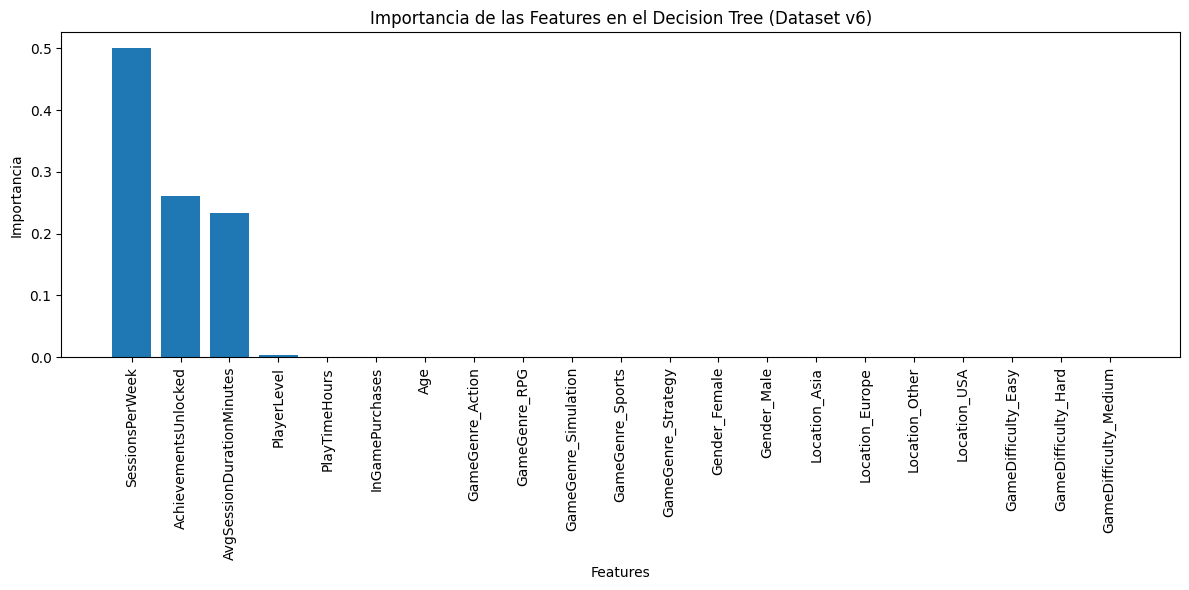

In [ ]:
# Obtener la importancia de las features
feature_importances_v6 = tree_model_v6.feature_importances_

# Crear un DataFrame para visualizar la importancia
importance_df_v6 = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_v6})

# Ordenar por importancia descendente
importance_df_v6 = importance_df_v6.sort_values('importance', ascending=False)

# Imprimir la importancia de las features
print("\nImportancia de las Features:")
print(importance_df_v6)

# Generar gráfico de barras de la importancia de las features
plt.figure(figsize=(12, 6))
plt.bar(importance_df_v6['feature'], importance_df_v6['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importancia")
plt.title("Importancia de las Features en el Decision Tree (Dataset v6)")
plt.tight_layout()
plt.show()

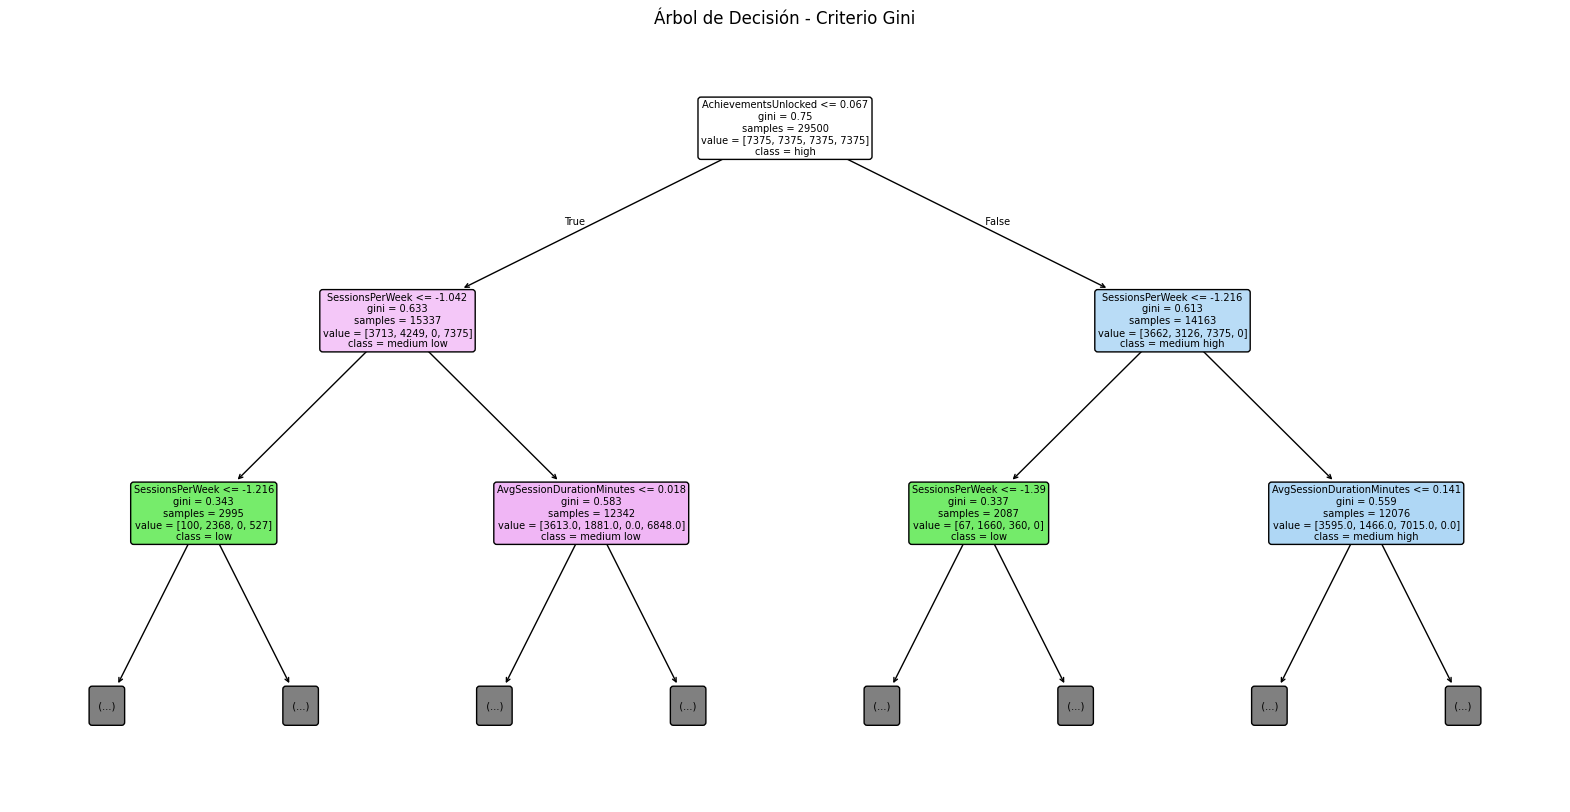

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model_v6,
    feature_names=v1['X_train'].columns,
    class_names=["high", "low", "medium high", "medium low"],
    filled=True,
    rounded=True,
    max_depth=2 # Limitamos mucho la profundidad para legibilidad del gráfico
    )
plt.title("Árbol de Decisión - Criterio Gini")
plt.show()

### KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled_v6 = scaler.fit_transform(v6['X_train'])
X_test_scaled_v6 = scaler.transform(v6['X_test'])

In [ ]:
# Entrenar el modelo de KNN
model_knn_v6 = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
model_knn_v6.fit(X_train_scaled_v6, v6['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_knn_v6 = model_knn_v6.predict(X_test_scaled_v6)

# Obtención métricas
print("Evaluación del modelo KNN")
print("=" * 60)
print(classification_report(v6['y_test'], y_pred_knn_v6))

Evaluación del modelo KNN
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      2007
           1       0.64      0.61      0.63      1955
           2       0.62      0.64      0.63      1821
           3       0.63      0.58      0.60      1824

    accuracy                           0.65      7607
   macro avg       0.64      0.64      0.64      7607
weighted avg       0.64      0.65      0.64      7607



In [ ]:
# Casos de prueba
test_cases = [
    [27, 0.00, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],  # Ejemplo 1
    [18, 60.35, 8, 16, 130, 260, 67, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [32, 10.12, 0, 2, 55, 58, 15, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 3
]

# Asegurar que los casos de prueba sean escalados si el modelo utiliza datos normalizados
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_v6 = model_knn_v6.predict(test_cases_scaled)

# Muestra de resultados de cada caso
print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(predictions_v6):
  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if pred == 0:
    prediction_label = "high"
  elif pred == 1:
    prediction_label = "low"
  elif pred == 2:
    prediction_label = "medium high"
  elif pred == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"
  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es medium low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es high


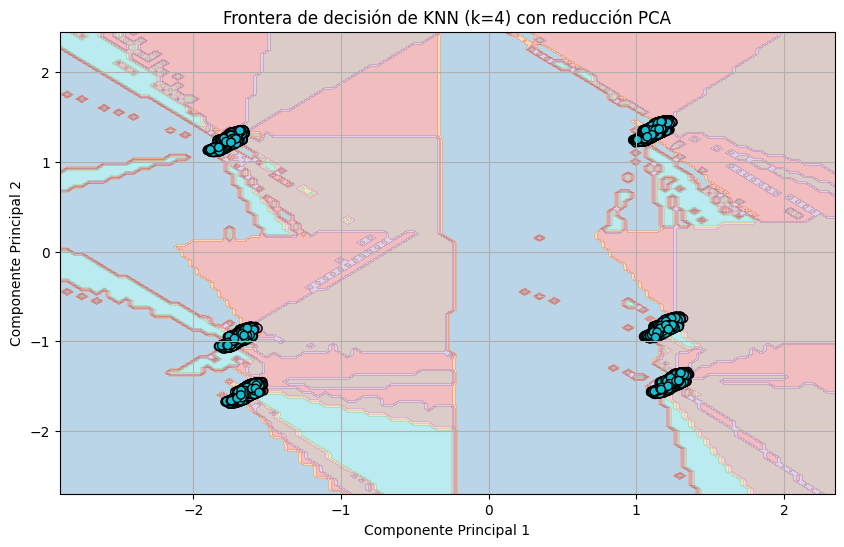

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_knn = pca.fit_transform(X_train_scaled_v6)
y_knn = v6['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
knn = KNeighborsClassifier(n_neighbors=19, metric='minkowski', p=2)
knn.fit(X_knn, y_knn)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de KNN (k=4) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### SVM

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled_v6 = scaler.fit_transform(v6['X_train'])
X_test_scaled_v6 = scaler.transform(v6['X_test'])

In [ ]:
# Entrenar el modelo de SVM
model_svm_v6 = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model_svm_v6.fit(X_train_scaled_v6, v6['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_svm_v6 = model_svm_v6.predict(X_test_scaled_v6)

# Obtención métricas
print("Evaluación del modelo SVM")
print("=" * 60)
print(classification_report(v6['y_test'], y_pred_svm_v6))

Evaluación del modelo SVM
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2007
           1       0.85      0.79      0.82      1955
           2       0.83      0.91      0.87      1821
           3       0.84      0.89      0.86      1824

    accuracy                           0.85      7607
   macro avg       0.85      0.85      0.85      7607
weighted avg       0.85      0.85      0.85      7607



In [ ]:
# Casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

# Escalar los casos de prueba
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_svm_v6 = model_svm_v6.predict(test_cases_scaled)

# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas SVM " + "="*30)
for i, pred in enumerate(predictions_svm_v6):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: Predicción -> {prediction_label}")
print("="*80)

============================== Resultados de Pruebas SVM ==============================
Caso de prueba 1: Predicción -> low
Caso de prueba 2: Predicción -> low
Caso de prueba 3: Predicción -> low


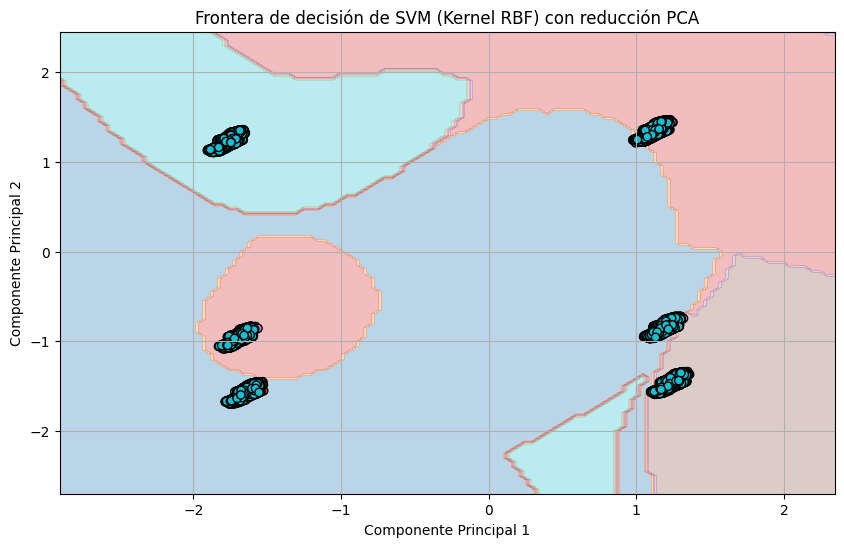

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_svm = pca.fit_transform(X_train_scaled_v6)
y_svm = v6['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_svm, y_svm)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_svm[:, 0].min() - 1, X_svm[:, 0].max() + 1
y_min, y_max = X_svm[:, 1].min() - 1, X_svm[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_svm, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de SVM (Kernel RBF) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### Red Neuronal

In [ ]:
# Convertir etiquetas a categorías si es necesario (para categorical_crossentropy)
num_classes = len(np.unique(v6['y_train']))
y_train_cat_v6 = tf.keras.utils.to_categorical(v6['y_train'], num_classes)
y_test_cat_v6 = tf.keras.utils.to_categorical(v6['y_test'], num_classes)

In [ ]:
# Crear modelo
def crear_modelo(dropout_rate=0.2):
    model = models.Sequential([
        layers.Input(shape=(X_train_scaled_v6.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    callbacks.ReduceLROnPlateau(patience=5, factor=0.5, monitor='val_loss')
]


# Entrenar modelo
model_v6 = crear_modelo(dropout_rate=0.2)
history = model_v6.fit(
    X_train_scaled_v6, y_train_cat_v6,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5856 - loss: 1.0771 - val_accuracy: 0.2100 - val_loss: 1.5652 - learning_rate: 0.0010
Epoch 2/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7844 - loss: 0.6126 - val_accuracy: 0.4102 - val_loss: 1.2672 - learning_rate: 0.0010
Epoch 3/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8171 - loss: 0.5423 - val_accuracy: 0.4820 - val_loss: 1.1596 - learning_rate: 0.0010
Epoch 4/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8278 - loss: 0.5124 - val_accuracy: 0.5729 - val_loss: 0.9934 - learning_rate: 0.0010
Epoch 5/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8379 - loss: 0.4937 - val_accuracy: 0.5539 - val_loss: 1.0795 - learning_rate: 0.0010
Epoch 6/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8463 - loss: 0.4831 - val_accuracy: 0.5946 - val_loss: 0.9789 - learning_rate: 0.0010
Epoch 7/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8466 - loss: 0.

In [ ]:
# Evaluación en test real
y_pred_test_v6 = np.argmax(model_v6.predict(X_test_scaled_v6), axis=1)
y_true_test_v6 = v6['y_test']
print(classification_report(v6['y_test'], y_pred_test_v6))


print("="*20 + " Evaluación en conjunto de prueba " + "="*20)
print(classification_report(y_true_test_v6, y_pred_test_v6))

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2007
           1       0.86      0.88      0.87      1955
           2       0.86      0.94      0.90      1821
           3       0.92      0.79      0.85      1824

    accuracy                           0.88      7607
   macro avg       0.88      0.88      0.88      7607
weighted avg       0.88      0.88      0.88      7607

==================== Evaluación en conjunto de prueba ====================
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2007
           1       0.86      0.88      0.87      1955
           2       0.86      0.94      0.90      1821
           3       0.92      0.79      0.85      1824

    accuracy                           0.88      7607
   macro avg       0.88      0.88      0.88      7607
weighted avg       0.88      0.88      0.88      7607



In [ ]:
# Prueba casos de prueba
test_cases = [
    [27, 0.00, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],  # Ejemplo 1
    [18, 60.35, 8, 16, 130, 260, 67, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [32, 10.12, 0, 2, 55, 58, 15, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 3
]

test_cases_array = np.array(test_cases)
test_cases_scaled = scaler.transform(test_cases_array)

pred_probs = model_v6.predict(test_cases_scaled)
pred_classes = np.argmax(pred_probs, axis=1)
# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(pred_classes):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es medium high
Caso de prueba 2: La predicción es medium high
Caso de prueba 3: La predicción es medium high


## Dataset v7

### DecisionTree

In [ ]:
# Entrenar modelo de DecisionTree
tree_model_v7 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

tree_model_v7.fit(v7['X_train'], v7['y_train'])

y_pred_tree_v7 = tree_model_v7.predict(v7['X_test'])

In [ ]:
# Obtener métricas (accuracy, precision, F1-Score)
print(classification_report(v7['y_test'], y_pred_tree_v7))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1941
           1       0.81      0.82      0.81      1960
           2       0.80      0.87      0.83      1875
           3       0.83      0.84      0.84      1851

    accuracy                           0.82      7627
   macro avg       0.82      0.82      0.82      7627
weighted avg       0.82      0.82      0.82      7627



In [ ]:
# ====================================================== Casos de prueba ===============================================================================
test_cases = [
    [27, 0.00, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],  # Ejemplo 1
    [18, 60.35, 8, 16, 130, 260, 67, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [32, 10.12, 0, 2, 55, 58, 15, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 3
]

feature_names = v2['X_train'].columns

# Hacer prediccion para cada caso de prueba
for i, case in enumerate(test_cases):
  case_df = pd.DataFrame([case], columns=feature_names)

  prediction = tree_model_v7.predict(case_df)

  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if prediction[0] == 0:
    prediction_label = "high"
  elif prediction[0] == 1:
    prediction_label = "low"
  elif prediction[0] == 2:
    prediction_label = "medium high"
  elif prediction[0] == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"

  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

Caso de prueba 1: La predicción es medium low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es high


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



Importancia de las Features:
                      feature  importance
3             SessionsPerWeek    0.507230
6        AchievementsUnlocked    0.249182
4   AvgSessionDurationMinutes    0.239589
5                 PlayerLevel    0.003817
7            GameGenre_Action    0.000181
1               PlayTimeHours    0.000000
2             InGamePurchases    0.000000
0                         Age    0.000000
8               GameGenre_RPG    0.000000
9        GameGenre_Simulation    0.000000
10           GameGenre_Sports    0.000000
11         GameGenre_Strategy    0.000000
12              Gender_Female    0.000000
13                Gender_Male    0.000000
14              Location_Asia    0.000000
15            Location_Europe    0.000000
16             Location_Other    0.000000
17               Location_USA    0.000000
18        GameDifficulty_Easy    0.000000
19        GameDifficulty_Hard    0.000000
20      GameDifficulty_Medium    0.000000


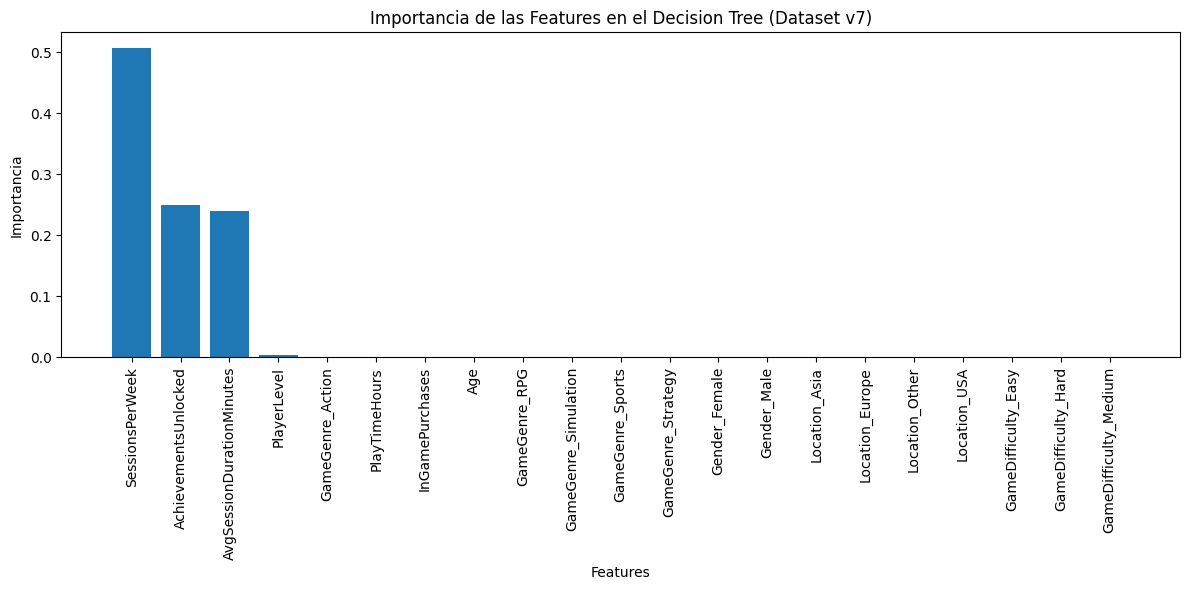

In [ ]:
# Obtener la importancia de las features
feature_importances = tree_model_v7.feature_importances_

# Crear un DataFrame para visualizar la importancia
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Ordenar por importancia descendente
importance_df = importance_df.sort_values('importance', ascending=False)

# Imprimir la importancia de las features
print("\nImportancia de las Features:")
print(importance_df)

# Generar gráfico de barras de la importancia de las features
plt.figure(figsize=(12, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importancia")
plt.title("Importancia de las Features en el Decision Tree (Dataset v7)")
plt.tight_layout()
plt.show()

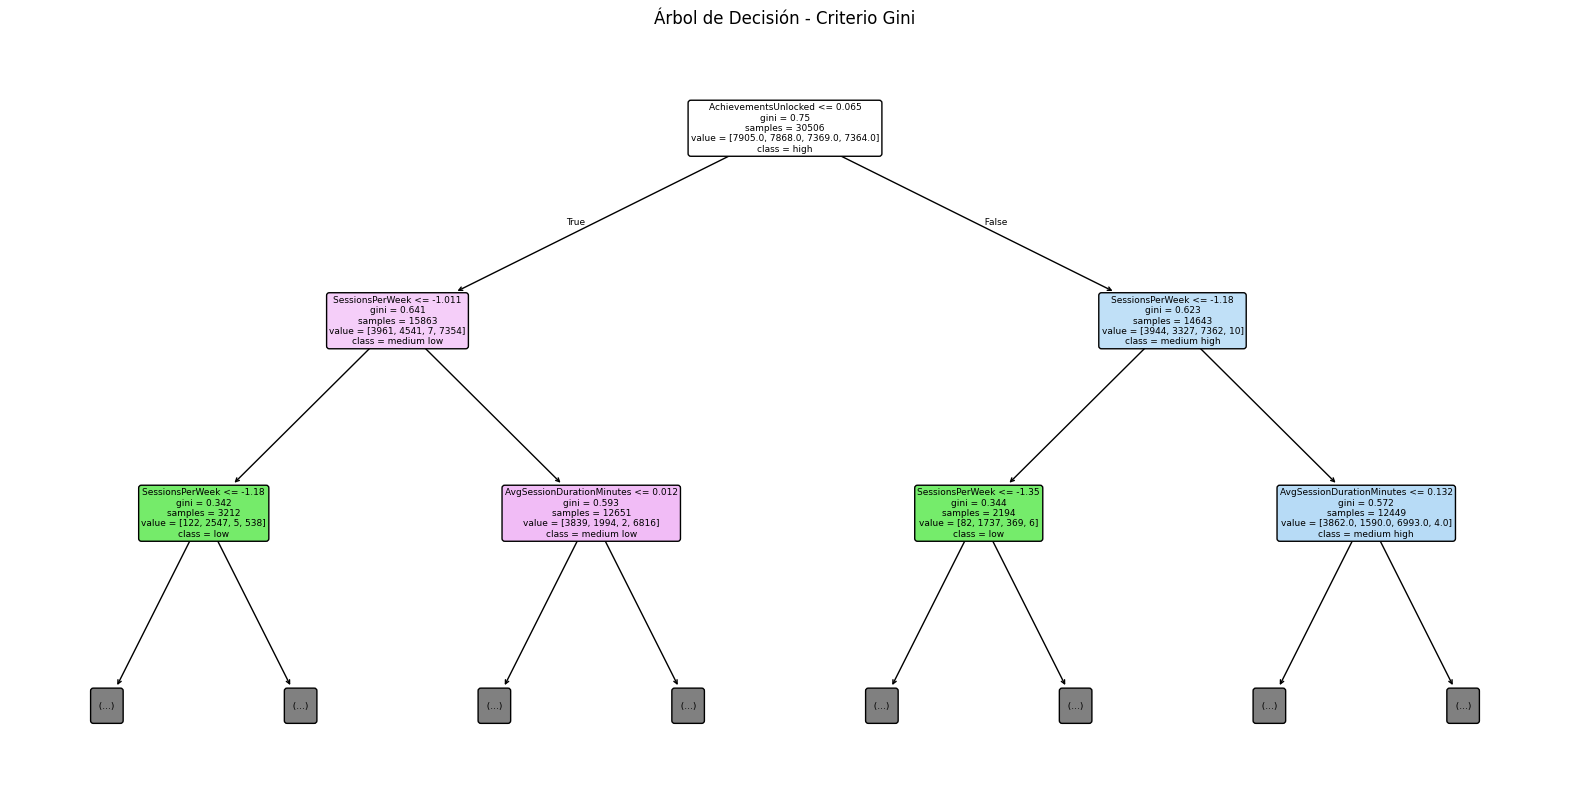

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model_v7,
    feature_names=v1['X_train'].columns,
    class_names=["high", "low", "medium high", "medium low"],
    filled=True,
    rounded=True,
    max_depth=2 # Limitamos mucho la profundidad para legibilidad del gráfico
    )
plt.title("Árbol de Decisión - Criterio Gini")
plt.show()

### KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled_v7 = scaler.fit_transform(v7['X_train'])
X_test_scaled_v7 = scaler.transform(v7['X_test'])

In [ ]:
# Entrenar el modelo de KNN
model_knn_v7 = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
model_knn_v7.fit(X_train_scaled_v7, v7['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_knn_v7 = model_knn_v7.predict(X_test_scaled_v7)

# Obtención métricas
print("Evaluación del modelo KNN")
print("=" * 60)
print(classification_report(v7['y_test'], y_pred_knn_v7))

Evaluación del modelo KNN
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1941
           1       0.65      0.62      0.63      1960
           2       0.65      0.63      0.64      1875
           3       0.64      0.58      0.61      1851

    accuracy                           0.66      7627
   macro avg       0.65      0.66      0.65      7627
weighted avg       0.65      0.66      0.65      7627



In [ ]:
# Casos de prueba
test_cases = [
    [27, 0.00, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],  # Ejemplo 1
    [18, 60.35, 8, 16, 130, 260, 67, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [32, 10.12, 0, 2, 55, 58, 15, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 3
]

# Asegurar que los casos de prueba sean escalados si el modelo utiliza datos normalizados
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_v7 = model_knn_v7.predict(test_cases_scaled)

# Muestra de resultados de cada caso
print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(predictions_v7):
  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if pred == 0:
    prediction_label = "high"
  elif pred == 1:
    prediction_label = "low"
  elif pred == 2:
    prediction_label = "medium high"
  elif pred == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"
  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es medium high
Caso de prueba 2: La predicción es low
Caso de prueba 3: La predicción es medium high


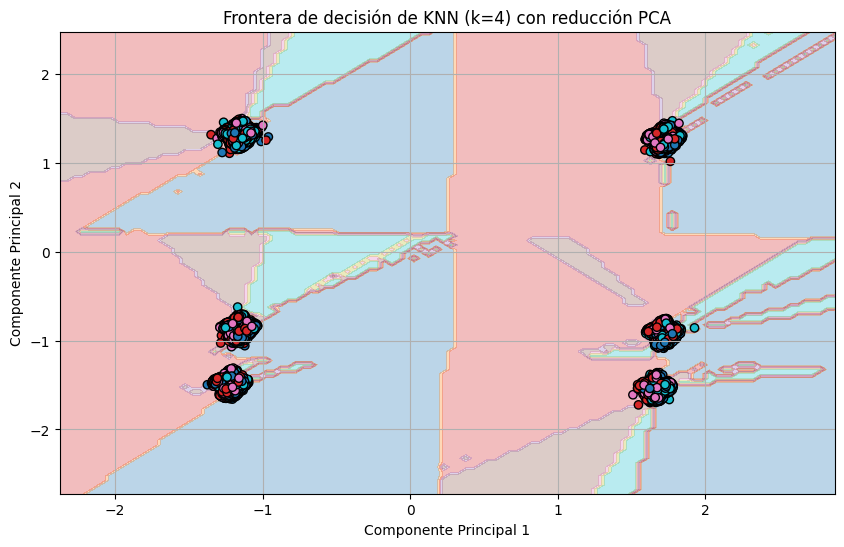

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_knn = pca.fit_transform(X_train_scaled_v7)
y_knn = v7['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
knn = KNeighborsClassifier(n_neighbors=19, metric='minkowski', p=2)
knn.fit(X_knn, y_knn)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de KNN (k=4) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### SVM

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled_v7 = scaler.fit_transform(v7['X_train'])
X_test_scaled_v7 = scaler.transform(v7['X_test'])

In [ ]:
# Entrenar el modelo de SVM
model_svm_v7 = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model_svm_v7.fit(X_train_scaled_v7, v7['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_svm_v7 = model_svm_v7.predict(X_test_scaled_v7)

# Obtención métricas
print("Evaluación del modelo SVM")
print("=" * 60)
print(classification_report(v7['y_test'], y_pred_svm_v7))

Evaluación del modelo SVM
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1941
           1       0.86      0.82      0.84      1960
           2       0.86      0.90      0.88      1875
           3       0.86      0.88      0.87      1851

    accuracy                           0.87      7627
   macro avg       0.87      0.87      0.87      7627
weighted avg       0.87      0.87      0.87      7627



In [ ]:
# Casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

# Escalar los casos de prueba
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_svm_v7 = model_svm_v7.predict(test_cases_scaled)

# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas SVM " + "="*30)
for i, pred in enumerate(predictions_svm_v7):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: Predicción -> {prediction_label}")
print("="*80)

============================== Resultados de Pruebas SVM ==============================
Caso de prueba 1: Predicción -> low
Caso de prueba 2: Predicción -> low
Caso de prueba 3: Predicción -> low


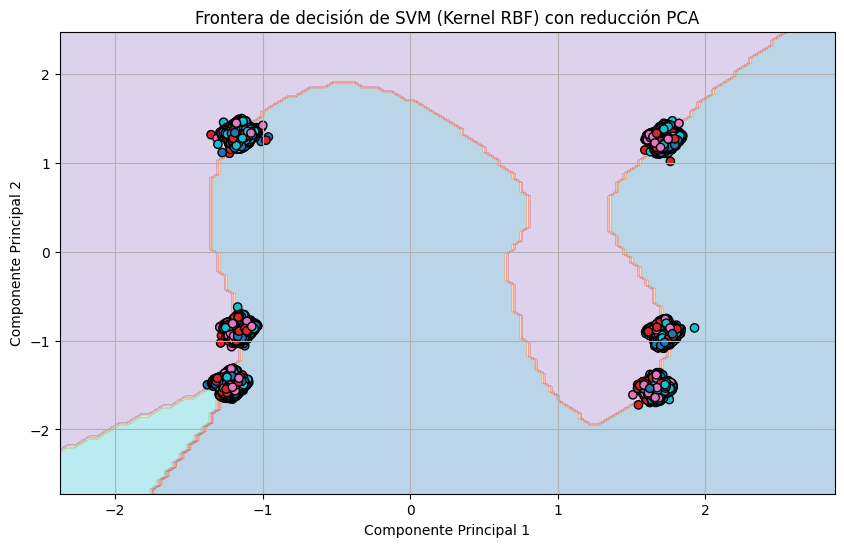

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_svm = pca.fit_transform(X_train_scaled_v7)
y_svm = v7['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_svm, y_svm)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_svm[:, 0].min() - 1, X_svm[:, 0].max() + 1
y_min, y_max = X_svm[:, 1].min() - 1, X_svm[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_svm, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de SVM (Kernel RBF) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### Red Neuronal

In [ ]:
# Convertir etiquetas a categorías si es necesario (para categorical_crossentropy)
num_classes = len(np.unique(v7['y_train']))
y_train_cat_v7 = tf.keras.utils.to_categorical(v7['y_train'], num_classes)
y_test_cat_v7 = tf.keras.utils.to_categorical(v7['y_test'], num_classes)

In [ ]:
# Crear modelo
def crear_modelo(dropout_rate=0.2):
    model = models.Sequential([
        layers.Input(shape=(X_train_scaled_v7.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    callbacks.ReduceLROnPlateau(patience=5, factor=0.5, monitor='val_loss')
]


# Entrenar modelo
model_v7 = crear_modelo(dropout_rate=0.2)
history = model_v7.fit(
    X_train_scaled_v7, y_train_cat_v7,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5313 - loss: 1.1645 - val_accuracy: 0.7971 - val_loss: 0.6229 - learning_rate: 0.0010
Epoch 2/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7370 - loss: 0.7245 - val_accuracy: 0.8435 - val_loss: 0.5397 - learning_rate: 0.0010
Epoch 3/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7781 - loss: 0.6435 - val_accuracy: 0.8648 - val_loss: 0.4856 - learning_rate: 0.0010
Epoch 4/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7957 - loss: 0.6037 - val_accuracy: 0.8727 - val_loss: 0.4590 - learning_rate: 0.0010
Epoch 5/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8101 - loss: 0.5683 - val_accuracy: 0.8820 - val_loss: 0.4439 - learning_rate: 0.0010
Epoch 6/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8257 - loss: 0.5417 - val_accuracy: 0.8823 - val_loss: 0.4288 - learning_rate: 0.0010
Epoch 7/100
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8396 - loss: 0.

In [ ]:
# Evaluación en test real
y_pred_test_v7 = np.argmax(model_v7.predict(X_test_scaled_v7), axis=1)
y_true_test_v7 = v7['y_test']
print(classification_report(v7['y_test'], y_pred_test_v7))


print("="*20 + " Evaluación en conjunto de prueba " + "="*20)
print(classification_report(y_true_test_v7, y_pred_test_v7))

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1941
           1       0.91      0.90      0.91      1960
           2       0.93      0.93      0.93      1875
           3       0.92      0.93      0.93      1851

    accuracy                           0.92      7627
   macro avg       0.92      0.92      0.92      7627
weighted avg       0.92      0.92      0.92      7627

==================== Evaluación en conjunto de prueba ====================
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1941
           1       0.91      0.90      0.91      1960
           2       0.93      0.93      0.93      1875
           3       0.92      0.93      0.93      1851

    accuracy                           0.92      7627
   macro avg       0.92      0.92      0.92      7627
weighted avg       0.92      0.92      0.92      7627



In [ ]:
# Prueba casos de prueba
test_cases = [
    [27, 0.00, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],  # Ejemplo 1
    [18, 60.35, 8, 16, 130, 260, 67, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [32, 10.12, 0, 2, 55, 58, 15, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 3
]

test_cases_array = np.array(test_cases)
test_cases_scaled = scaler.transform(test_cases_array)

pred_probs = model_v7.predict(test_cases_scaled)
pred_classes = np.argmax(pred_probs, axis=1)
# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(pred_classes):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es high
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es low


## Dataset v8

### DecisionTree

In [ ]:
# Entrenar modelo de DecisionTree
tree_model_v8 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

tree_model_v8.fit(v8['X_train'], v8['y_train'])

y_pred_tree_v8 = tree_model_v8.predict(v8['X_test'])

In [ ]:
# Obtener métricas (accuracy, precision, F1-Score)
print(classification_report(v8['y_test'], y_pred_tree_v8))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1960
           1       0.83      0.75      0.79      1947
           2       0.79      0.92      0.85      1870
           3       0.80      0.85      0.82      1850

    accuracy                           0.82      7627
   macro avg       0.82      0.82      0.82      7627
weighted avg       0.82      0.82      0.82      7627



In [ ]:
# ====================================================== Casos de prueba ===============================================================================
test_cases = [
    [27, 0.00, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],  # Ejemplo 1
    [18, 60.35, 8, 16, 130, 260, 67, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [32, 10.12, 0, 2, 55, 58, 15, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 3
]

feature_names = v3['X_train'].columns

# Hacer prediccion para cada caso de prueba
for i, case in enumerate(test_cases):
  case_df = pd.DataFrame([case], columns=feature_names)

  prediction = tree_model_v8.predict(case_df)

  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if prediction[0] == 0:
    prediction_label = "high"
  elif prediction[0] == 1:
    prediction_label = "low"
  elif prediction[0] == 2:
    prediction_label = "medium high"
  elif prediction[0] == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"

  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

Caso de prueba 1: La predicción es medium low
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es high


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



Importancia de las Features:
                      feature  importance
3             SessionsPerWeek    0.511585
6        AchievementsUnlocked    0.263641
4   AvgSessionDurationMinutes    0.220590
5                 PlayerLevel    0.004159
17               Location_USA    0.000026
1               PlayTimeHours    0.000000
2             InGamePurchases    0.000000
0                         Age    0.000000
7            GameGenre_Action    0.000000
9        GameGenre_Simulation    0.000000
10           GameGenre_Sports    0.000000
11         GameGenre_Strategy    0.000000
8               GameGenre_RPG    0.000000
12              Gender_Female    0.000000
13                Gender_Male    0.000000
15            Location_Europe    0.000000
14              Location_Asia    0.000000
16             Location_Other    0.000000
18        GameDifficulty_Easy    0.000000
19        GameDifficulty_Hard    0.000000
20      GameDifficulty_Medium    0.000000


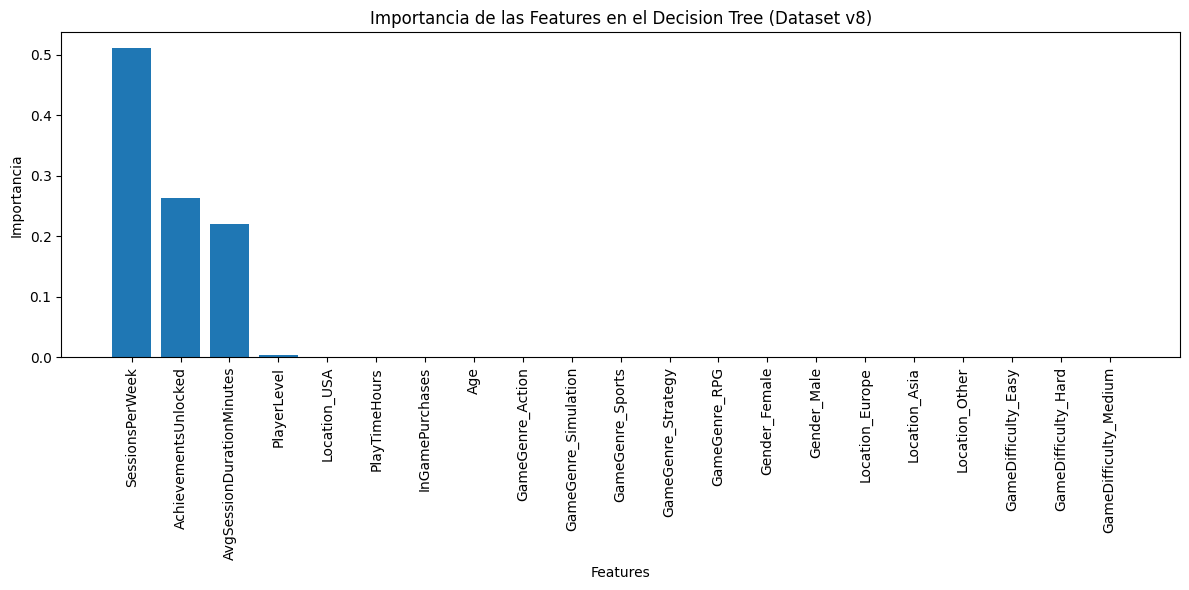

In [ ]:
# Obtener la importancia de las features
feature_importances_v8 = tree_model_v8.feature_importances_

# Crear un DataFrame para visualizar la importancia
importance_df_v8 = pd.DataFrame({'feature': feature_names, 'importance': feature_importances_v8})

# Ordenar por importancia descendente
importance_df_v8 = importance_df_v8.sort_values('importance', ascending=False)

# Imprimir la importancia de las features
print("\nImportancia de las Features:")
print(importance_df_v8)

# Generar gráfico de barras de la importancia de las features
plt.figure(figsize=(12, 6))
plt.bar(importance_df_v8['feature'], importance_df_v8['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importancia")
plt.title("Importancia de las Features en el Decision Tree (Dataset v8)")
plt.tight_layout()
plt.show()

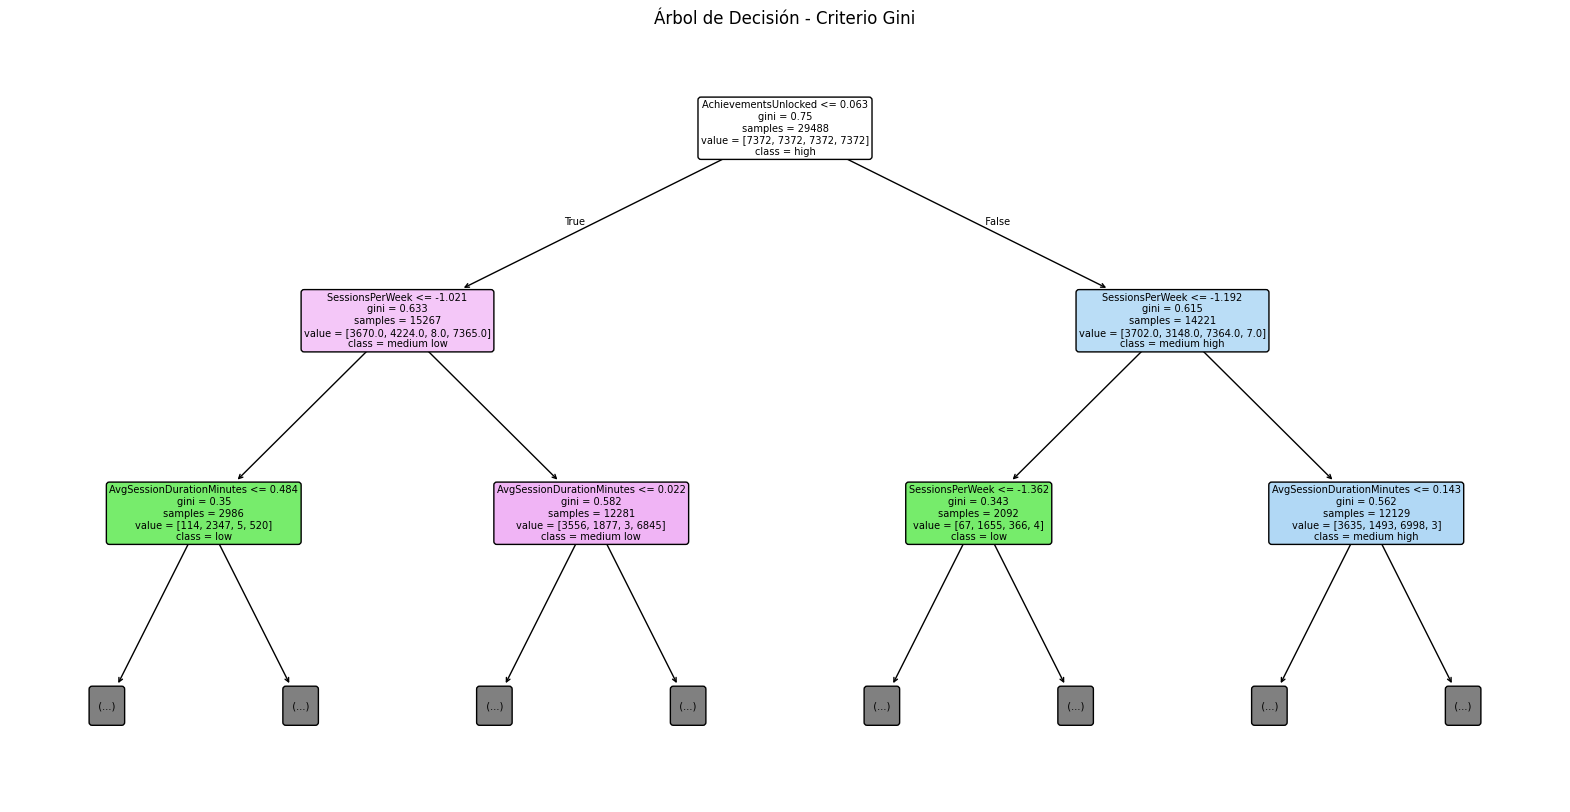

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model_v8,
    feature_names=v1['X_train'].columns,
    class_names=["high", "low", "medium high", "medium low"],
    filled=True,
    rounded=True,
    max_depth=2 # Limitamos mucho la profundidad para legibilidad del gráfico
    )
plt.title("Árbol de Decisión - Criterio Gini")
plt.show()

### KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled_v8 = scaler.fit_transform(v8['X_train'])
X_test_scaled_v8 = scaler.transform(v8['X_test'])

In [ ]:
# Entrenar el modelo de KNN
model_knn_v8 = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
model_knn_v8.fit(X_train_scaled_v8, v8['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_knn_v8 = model_knn_v8.predict(X_test_scaled_v8)

# Obtención métricas
print("Evaluación del modelo KNN")
print("=" * 60)
print(classification_report(v8['y_test'], y_pred_knn_v8))

Evaluación del modelo KNN
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1960
           1       0.64      0.62      0.63      1947
           2       0.63      0.61      0.62      1870
           3       0.62      0.58      0.59      1850

    accuracy                           0.64      7627
   macro avg       0.64      0.64      0.64      7627
weighted avg       0.64      0.64      0.64      7627



In [ ]:
# Casos de prueba
test_cases = [
    [27, 0.00, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],  # Ejemplo 1
    [18, 60.35, 8, 16, 130, 260, 67, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [32, 10.12, 0, 2, 55, 58, 15, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 3
]

# Asegurar que los casos de prueba sean escalados si el modelo utiliza datos normalizados
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_v8 = model_knn_v8.predict(test_cases_scaled)

# Muestra de resultados de cada caso
print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(predictions_v8):
  # Mapeo de predicciones numéricas a etiquetas
  prediction_label = ""
  if pred == 0:
    prediction_label = "high"
  elif pred == 1:
    prediction_label = "low"
  elif pred == 2:
    prediction_label = "medium high"
  elif pred == 3:
    prediction_label = "medium low"
  else:
    prediction_label = "unknown"
  print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es high
Caso de prueba 2: La predicción es medium low
Caso de prueba 3: La predicción es low


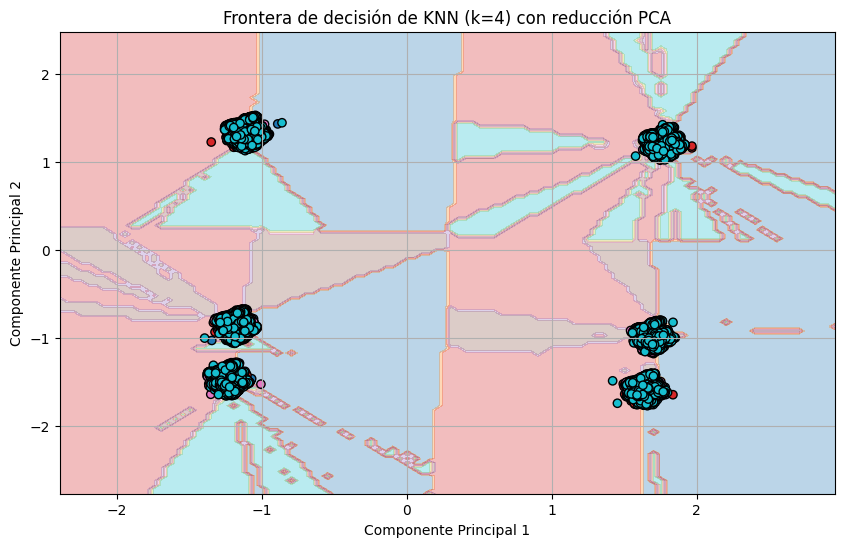

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_knn = pca.fit_transform(X_train_scaled_v8)
y_knn = v8['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
knn = KNeighborsClassifier(n_neighbors=19, metric='minkowski', p=2)
knn.fit(X_knn, y_knn)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de KNN (k=4) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### SVM

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled_v8 = scaler.fit_transform(v8['X_train'])
X_test_scaled_v8 = scaler.transform(v8['X_test'])

In [ ]:
# Entrenar el modelo de SVM
model_svm_v8 = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model_svm_v8.fit(X_train_scaled_v8, v8['y_train'])

# Realizar predicciones en el conjunto de prueba
y_pred_svm_v8 = model_svm_v8.predict(X_test_scaled_v8)

# Obtención métricas
print("Evaluación del modelo SVM")
print("=" * 60)
print(classification_report(v8['y_test'], y_pred_svm_v8))

Evaluación del modelo SVM
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1960
           1       0.84      0.79      0.82      1947
           2       0.84      0.90      0.87      1870
           3       0.83      0.88      0.85      1850

    accuracy                           0.85      7627
   macro avg       0.85      0.85      0.85      7627
weighted avg       0.85      0.85      0.85      7627



In [ ]:
# Casos de prueba
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

# Escalar los casos de prueba
test_cases_scaled = scaler.transform(test_cases)

# Predicciones casos de prueba
predictions_svm_v8 = model_svm_v8.predict(test_cases_scaled)

# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas SVM " + "="*30)
for i, pred in enumerate(predictions_svm_v8):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: Predicción -> {prediction_label}")
print("="*80)

============================== Resultados de Pruebas SVM ==============================
Caso de prueba 1: Predicción -> low
Caso de prueba 2: Predicción -> low
Caso de prueba 3: Predicción -> low


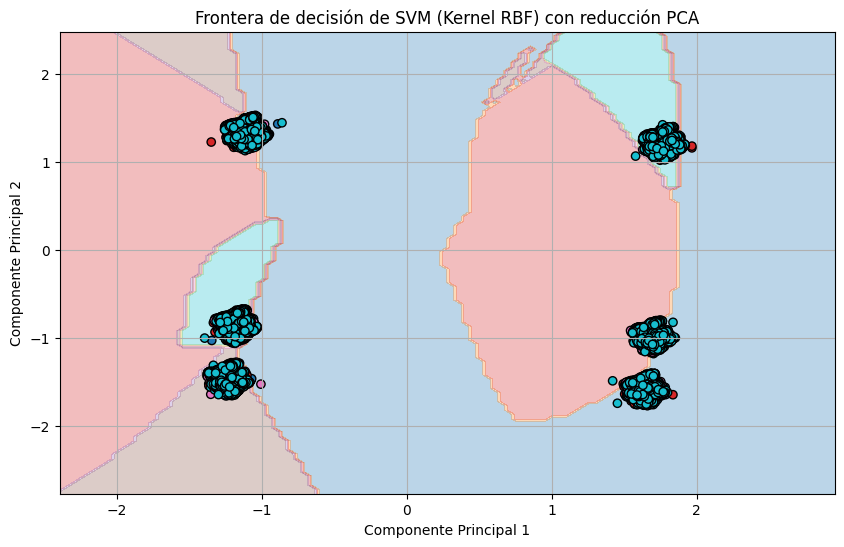

In [ ]:
# Reducir datos a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_svm = pca.fit_transform(X_train_scaled_v8)
y_svm = v8['y_train']

# Entrenar modelo sobre datos reducidos (solo para visualización)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_svm, y_svm)

# Malla para graficar la frontera de decisión
h = 0.05
x_min, x_max = X_svm[:, 0].min() - 1, X_svm[:, 0].max() + 1
y_min, y_max = X_svm[:, 1].min() - 1, X_svm[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_svm, edgecolor='k', cmap=plt.cm.tab10)
plt.title("Frontera de decisión de SVM (Kernel RBF) con reducción PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### Red Neuronal

In [ ]:
# Convertir etiquetas a categorías si es necesario (para categorical_crossentropy)
num_classes = len(np.unique(v8['y_train']))
y_train_cat_v8 = tf.keras.utils.to_categorical(v8['y_train'], num_classes)
y_test_cat_v8 = tf.keras.utils.to_categorical(v8['y_test'], num_classes)

In [ ]:
# Crear modelo
def crear_modelo(dropout_rate=0.2):
    model = models.Sequential([
        layers.Input(shape=(X_train_scaled_v8.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    callbacks.ReduceLROnPlateau(patience=5, factor=0.5, monitor='val_loss')
]


# Entrenar modelo
model_v8 = crear_modelo(dropout_rate=0.2)
history = model_v8.fit(
    X_train_scaled_v8, y_train_cat_v8,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 1/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5857 - loss: 1.0673 - val_accuracy: 0.2136 - val_loss: 1.5595 - learning_rate: 0.0010
Epoch 2/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7657 - loss: 0.6623 - val_accuracy: 0.3352 - val_loss: 1.4245 - learning_rate: 0.0010
Epoch 3/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8016 - loss: 0.5832 - val_accuracy: 0.5376 - val_loss: 1.0945 - learning_rate: 0.0010
Epoch 4/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8230 - loss: 0.5403 - val_accuracy: 0.5344 - val_loss: 1.1208 - learning_rate: 0.0010
Epoch 5/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8405 - loss: 0.5012 - val_accuracy: 0.5995 - val_loss: 1.0161 - learning_rate: 0.0010
Epoch 6/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8496 - loss: 0.4785 - val_accuracy: 0.6619 - val_loss: 0.9019 - learning_rate: 0.0010
Epoch 7/100
738/738 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8564 - loss: 0.

In [ ]:
# Evaluación en test real
y_pred_test_v8 = np.argmax(model_v8.predict(X_test_scaled_v8), axis=1)
y_true_test_v8 = v8['y_test']
print(classification_report(v8['y_test'], y_pred_test_v8))


print("="*20 + " Evaluación en conjunto de prueba " + "="*20)
print(classification_report(y_true_test_v8, y_pred_test_v8))

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1960
           1       0.86      0.87      0.86      1947
           2       0.85      0.95      0.89      1870
           3       0.92      0.77      0.84      1850

    accuracy                           0.87      7627
   macro avg       0.87      0.87      0.87      7627
weighted avg       0.87      0.87      0.87      7627

==================== Evaluación en conjunto de prueba ====================
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1960
           1       0.86      0.87      0.86      1947
           2       0.85      0.95      0.89      1870
           3       0.92      0.77      0.84      1850

    accuracy                           0.87      7627
   macro avg       0.87      0.87      0.87      7627
weighted avg       0.87      0.87      0.87      7627



In [ ]:
# Prueba casos de prueba
test_cases = [
    [27, 0.00, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],  # Ejemplo 1
    [18, 60.35, 8, 16, 130, 260, 67, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [32, 10.12, 0, 2, 55, 58, 15, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 3
]

test_cases_array = np.array(test_cases)
test_cases_scaled = scaler.transform(test_cases_array)

pred_probs = model_v8.predict(test_cases_scaled)
pred_classes = np.argmax(pred_probs, axis=1)
# Mapeo de predicciones numéricas a etiquetas
label_map = {
    0: "high",
    1: "low",
    2: "medium high",
    3: "medium low"
}

print("="*30 + " Resultados de Pruebas " + "="*30)
for i, pred in enumerate(pred_classes):
    prediction_label = label_map.get(pred, "unknown")
    print(f"Caso de prueba {i+1}: La predicción es {prediction_label}")

print("="*80)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
============================== Resultados de Pruebas ==============================
Caso de prueba 1: La predicción es medium high
Caso de prueba 2: La predicción es high
Caso de prueba 3: La predicción es medium high


## Resultados

In [ ]:
# Creación del dataset
data = [
    ['CC(SI) y ED(NO)', 'NO',  'NO', 0.82, 0.83, 0.82, 0.82, 0.65, 0.65, 0.65, 0.65, 0.86, 0.86, 0.86, 0.86, 0.92, 0.92, 0.92, 0.92],
    ['CC(SI) y ED(NO)', 'NO',  'SI', 0.82, 0.83, 0.82, 0.82, 0.65, 0.64, 0.65, 0.64, 0.85, 0.86, 0.85, 0.85, 0.89, 0.89, 0.89, 0.88],
    ['CC(SI) y ED(NO)', 'SI',  'NO', 0.82, 0.82, 0.82, 0.82, 0.65, 0.65, 0.66, 0.66, 0.87, 0.87, 0.87, 0.87, 0.92, 0.92, 0.92, 0.92],
    ['CC(SI) y ED(NO)', 'SI',  'SI', 0.82, 0.82, 0.82, 0.82, 0.64, 0.64, 0.64, 0.64, 0.85, 0.85, 0.85, 0.85, 0.88, 0.88, 0.88, 0.87],
    ['CC(SI) y ED(SI)', 'NO',  'NO', 0.82, 0.83, 0.82, 0.82, 0.65, 0.65, 0.65, 0.65, 0.86, 0.86, 0.86, 0.86, 0.92, 0.92, 0.92, 0.92],
    ['CC(SI) y ED(SI)', 'NO',  'SI', 0.82, 0.82, 0.82, 0.82, 0.64, 0.64, 0.65, 0.65, 0.85, 0.85, 0.85, 0.85, 0.88, 0.88, 0.88, 0.88],
    ['CC(SI) y ED(SI)', 'SI',  'NO', 0.82, 0.82, 0.82, 0.82, 0.65, 0.65, 0.66, 0.66, 0.87, 0.87, 0.87, 0.87, 0.92, 0.92, 0.92, 0.92],
    ['CC(SI) y ED(SI)', 'SI',  'SI', 0.82, 0.82, 0.82, 0.82, 0.64, 0.64, 0.64, 0.64, 0.85, 0.85, 0.85, 0.85, 0.87, 0.87, 0.87, 0.87],
]

columns = ['Dataset', 'Normalización', 'Outliers',
           'ACC_DT', 'PREC_DT', 'REC_DT', 'F1_DT',
           'ACC_KNN', 'PREC_KNN', 'REC_KNN', 'F1_KNN',
           'ACC_SVM', 'PREC_SVM', 'REC_SVM', 'F1_SVM',
           'ACC_NN', 'PREC_NN', 'REC_NN', 'F1_NN']

df = pd.DataFrame(data, columns=columns)
df

Dataset Normalización Outliers  ACC_DT  PREC_DT  REC_DT  F1_DT  \
0  CC(SI) y ED(NO)            NO       NO    0.82     0.83    0.82   0.82   
1  CC(SI) y ED(NO)            NO       SI    0.82     0.83    0.82   0.82   
2  CC(SI) y ED(NO)            SI       NO    0.82     0.82    0.82   0.82   
3  CC(SI) y ED(NO)            SI       SI    0.82     0.82    0.82   0.82   
4  CC(SI) y ED(SI)            NO       NO    0.82     0.83    0.82   0.82   
5  CC(SI) y ED(SI)            NO       SI    0.82     0.82    0.82   0.82   
6  CC(SI) y ED(SI)            SI       NO    0.82     0.82    0.82   0.82   
7  CC(SI) y ED(SI)            SI       SI    0.82     0.82    0.82   0.82   

   ACC_KNN  PREC_KNN  REC_KNN  F1_KNN  ACC_SVM  PREC_SVM  REC_SVM  F1_SVM  \
0     0.65      0.65     0.65    0.65     0.86      0.86     0.86    0.86   
1     0.65      0.64     0.65    0.64     0.85      0.86     0.85    0.85   
2     0.65      0.65     0.66    0.66     0.87      0.87     0.87    0.87   
3     0.64      0.64     0.64    0.64     0.85      0.85     0.85    0.85   
4     0.65      0.65     0.65    0.65     0.86      0.86     0.86    0.86   
5     0.64      0.64     0.65    0.65     0.85      0.85     0.85    0.85   
6     0.65      0.65     0.66    0.66     0.87      0.87     0.87    0.87   
7     0.64      0.64     0.64    0.64     0.85      0.85     0.85    0.85   

   ACC_NN  PREC_NN  REC_NN  F1_NN  
0    0.92     0.92    0.92   0.92  
1    0.89     0.89    0.89   0.88  
2    0.92     0.92    0.92   0.92  
3    0.88     0.88    0.88   0.87  
4    0.92     0.92    0.92   0.92  
5    0.88     0.88    0.88   0.88  
6    0.92     0.92    0.92   0.92  
7    0.87     0.87    0.87   0.87

# F1-Score máximo por algoritmo

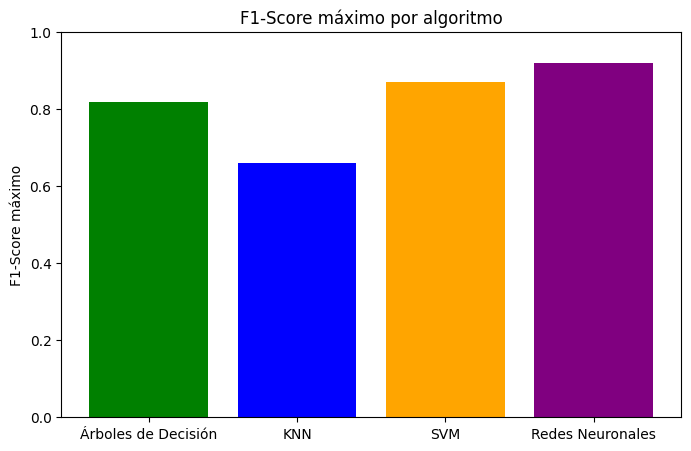

In [ ]:
f1_scores = {
    'Árboles de Decisión': df['F1_DT'].max(),
    'KNN': df['F1_KNN'].max(),
    'SVM': df['F1_SVM'].max(),
    'Redes Neuronales': df['F1_NN'].max()
}

plt.figure(figsize=(8,5))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['green', 'blue', 'orange', 'purple'])
plt.ylim(0, 1)
plt.ylabel('F1-Score máximo')
plt.title('F1-Score máximo por algoritmo')
plt.show()

# F1-Score medio por normalización y algoritmo

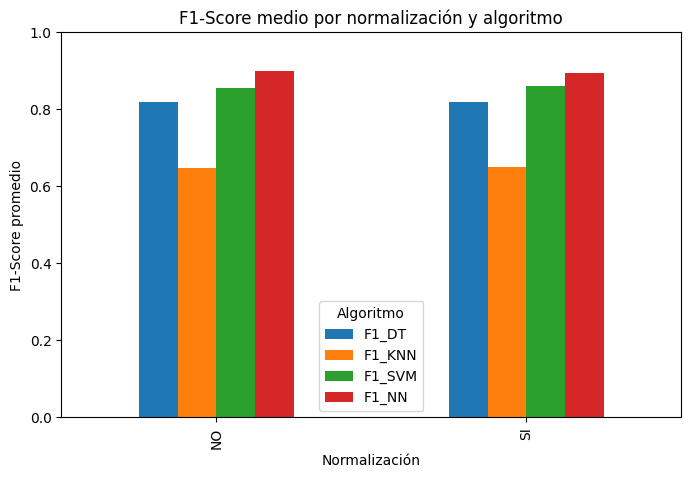

In [ ]:
mean_f1_norm = df.groupby('Normalización').agg({
    'F1_DT': 'mean',
    'F1_KNN': 'mean',
    'F1_SVM': 'mean',
    'F1_NN': 'mean'
})

mean_f1_norm.plot(kind='bar', figsize=(8,5))
plt.ylim(0, 1)
plt.ylabel('F1-Score promedio')
plt.title('F1-Score medio por normalización y algoritmo')
plt.legend(title='Algoritmo')
plt.show()


# F1-Score medio por manejo de outliers y algoritmo

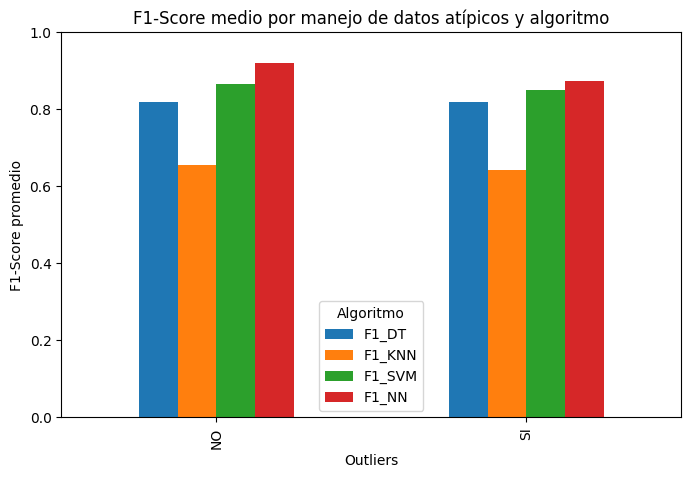

In [ ]:
mean_f1_outliers = df.groupby('Outliers').agg({
    'F1_DT': 'mean',
    'F1_KNN': 'mean',
    'F1_SVM': 'mean',
    'F1_NN': 'mean'
})

mean_f1_outliers.plot(kind='bar', figsize=(8,5))
plt.ylim(0, 1)
plt.ylabel('F1-Score promedio')
plt.title('F1-Score medio por manejo de datos atípicos y algoritmo')
plt.legend(title='Algoritmo')
plt.show()


# F1-Score medio por balanceo y algoritmo

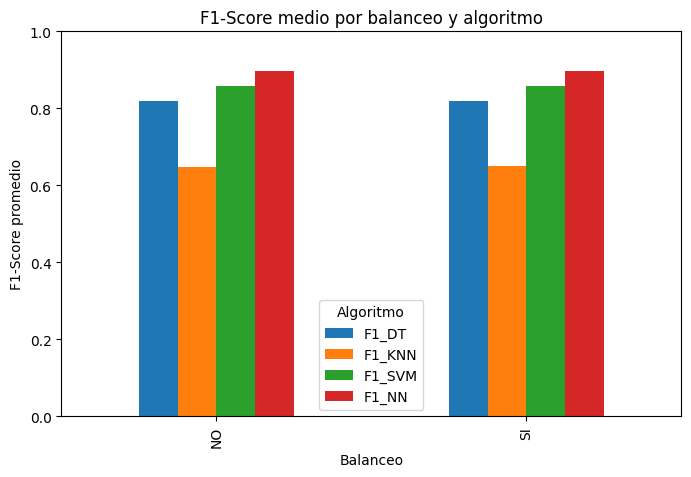

In [ ]:
# El balanceo se deduce del Dataset (última parte: ED(SI) o ED(NO))
df['Balanceo'] = df['Dataset'].apply(lambda x: 'SI' if 'ED(SI)' in x else 'NO')

mean_f1_balance = df.groupby('Balanceo').agg({
    'F1_DT': 'mean',
    'F1_KNN': 'mean',
    'F1_SVM': 'mean',
    'F1_NN': 'mean'
})

mean_f1_balance.plot(kind='bar', figsize=(8,5))
plt.ylim(0, 1)
plt.ylabel('F1-Score promedio')
plt.title('F1-Score medio por balanceo y algoritmo')
plt.legend(title='Algoritmo')
plt.show()


# Curvas ROC y Precision-Recall

In [ ]:
# Binarizar las etiquetas verdaderas
y_true_bin = label_binarize(y_true_test_v8, classes=[0, 1, 2, 3])

# Obtener probabilidades o scores
y_score_tree = tree_model_v8.predict_proba(X_test_scaled_v8)
y_score_knn = model_knn_v8.predict_proba(X_test_scaled_v8)
y_score_svm = model_svm_v8.decision_function(X_test_scaled_v8)
y_score_nn = model_v8.predict(X_test_scaled_v8)

# Diccionarios para guardar resultados
fpr = {'tree': {}, 'knn': {}, 'svm': {}, 'nn': {}}
tpr = {'tree': {}, 'knn': {}, 'svm': {}, 'nn': {}}
roc_auc = {'tree': {}, 'knn': {}, 'svm': {}, 'nn': {}}
precision = {'tree': {}, 'knn': {}, 'svm': {}, 'nn': {}}
recall = {'tree': {}, 'knn': {}, 'svm': {}, 'nn': {}}
avg_precision = {'tree': {}, 'knn': {}, 'svm': {}, 'nn': {}}

# Función para calcular métricas para un modelo
def compute_curves(y_true_bin, y_score, model_name):
    for i in range(4):
        fpr[model_name][i], tpr[model_name][i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[model_name][i] = auc(fpr[model_name][i], tpr[model_name][i])

        precision[model_name][i], recall[model_name][i], _ = precision_recall_curve(y_true_bin[:, i], y_score[:, i])
        avg_precision[model_name][i] = average_precision_score(y_true_bin[:, i], y_score[:, i])

# Calcular para cada modelo
compute_curves(y_true_bin, y_score_tree, 'tree')
compute_curves(y_true_bin, y_score_knn, 'knn')
compute_curves(y_true_bin, y_score_svm, 'svm')
compute_curves(y_true_bin, y_score_nn, 'nn')

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Curvas ROC

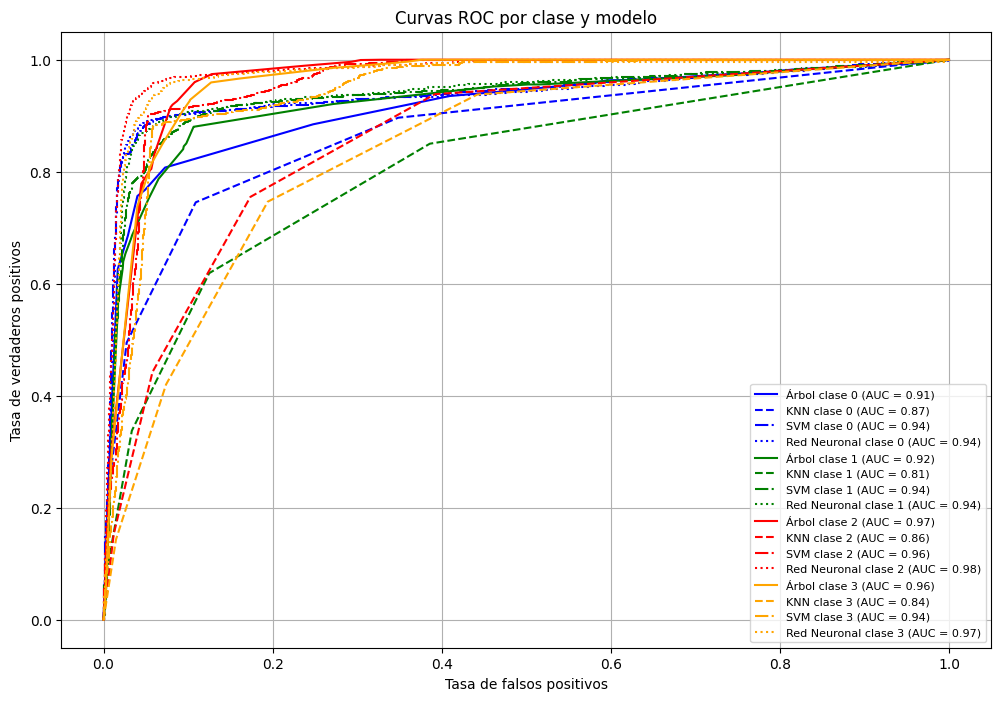

In [ ]:
# Curvas ROC
plt.figure(figsize=(12, 8))
colores = ['blue', 'green', 'red', 'orange']
for i in range(4):
    plt.plot(fpr['tree'][i], tpr['tree'][i], color=colores[i], linestyle='-', label=f'Árbol clase {i} (AUC = {roc_auc["tree"][i]:.2f})')
    plt.plot(fpr['knn'][i], tpr['knn'][i], color=colores[i], linestyle='--', label=f'KNN clase {i} (AUC = {roc_auc["knn"][i]:.2f})')
    plt.plot(fpr['svm'][i], tpr['svm'][i], color=colores[i], linestyle='-.', label=f'SVM clase {i} (AUC = {roc_auc["svm"][i]:.2f})')
    plt.plot(fpr['nn'][i], tpr['nn'][i], color=colores[i], linestyle=':', label=f'Red Neuronal clase {i} (AUC = {roc_auc["nn"][i]:.2f})')

plt.title('Curvas ROC por clase y modelo')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.legend(loc='best', fontsize=8)
plt.grid()
plt.show()

Precision-Recall

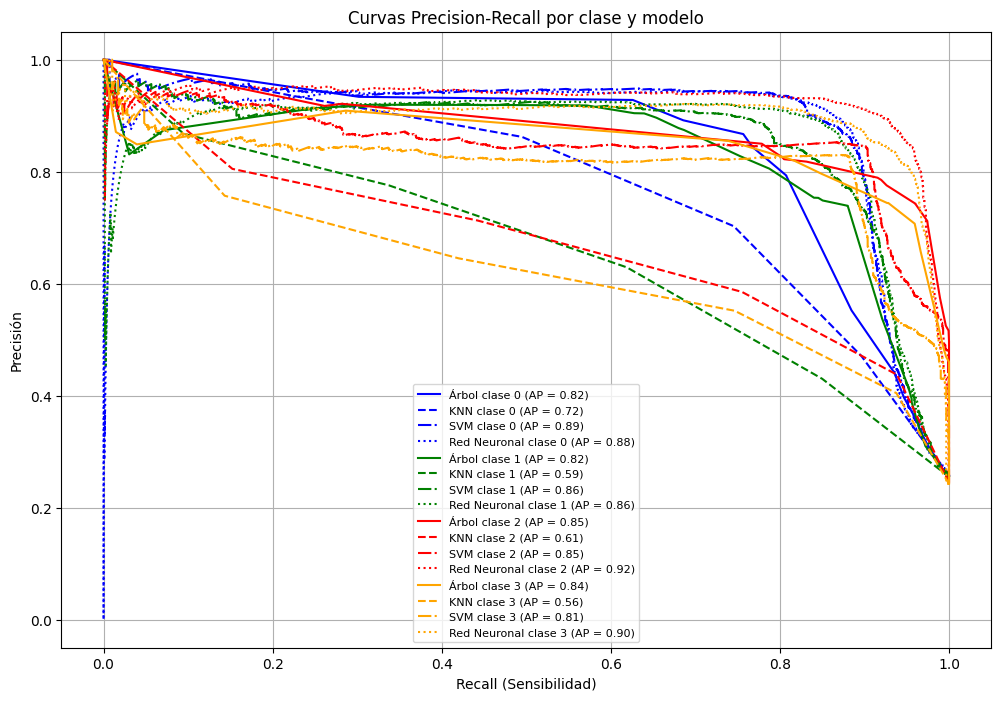

In [ ]:
# Precision-Recall
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.plot(recall['tree'][i], precision['tree'][i], color=colores[i], linestyle='-', label=f'Árbol clase {i} (AP = {avg_precision["tree"][i]:.2f})')
    plt.plot(recall['knn'][i], precision['knn'][i], color=colores[i], linestyle='--', label=f'KNN clase {i} (AP = {avg_precision["knn"][i]:.2f})')
    plt.plot(recall['svm'][i], precision['svm'][i], color=colores[i], linestyle='-.', label=f'SVM clase {i} (AP = {avg_precision["svm"][i]:.2f})')
    plt.plot(recall['nn'][i], precision['nn'][i], color=colores[i], linestyle=':', label=f'Red Neuronal clase {i} (AP = {avg_precision["nn"][i]:.2f})')

plt.title('Curvas Precision-Recall por clase y modelo')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.legend(loc='best', fontsize=8)
plt.grid()
plt.show()

# Aprendizaje No Supervisado

## Librerias

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

## K_Means

### Scatter de las versiones del dataset

### PCA y scaler común para todos

In [ ]:
scaler = StandardScaler()
pca = PCA(n_components=2)

### Generar X_pca

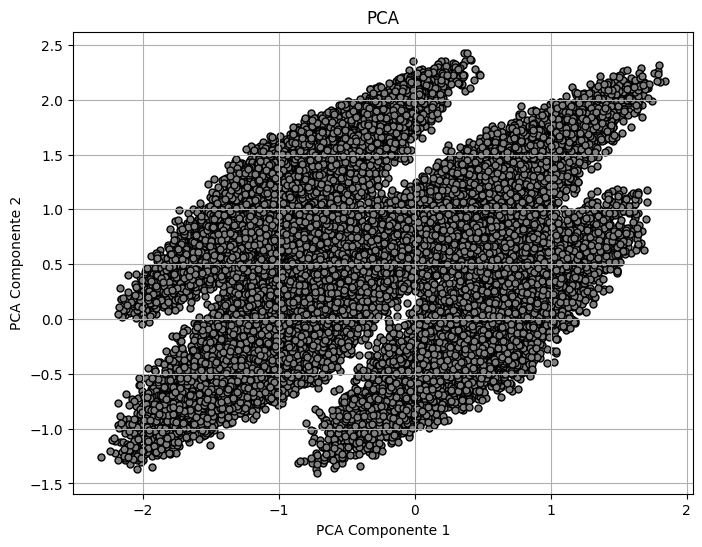

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
<ipython-input-178-3629989669>:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)


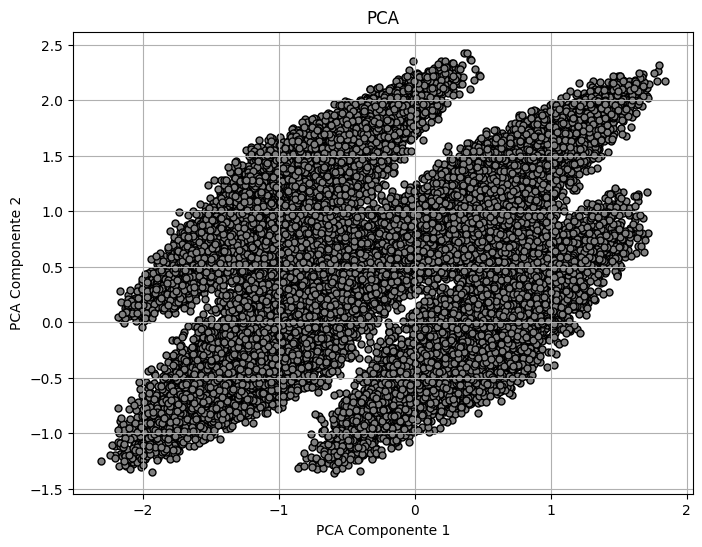

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
<ipython-input-178-3629989669>:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)


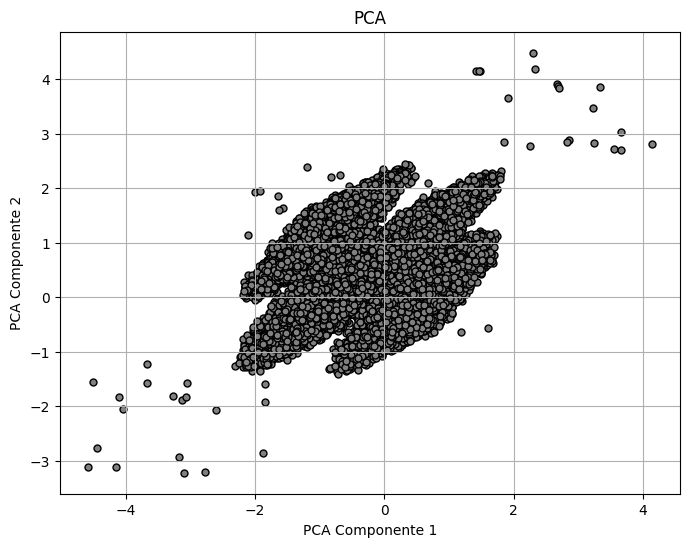

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
<ipython-input-178-3629989669>:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)


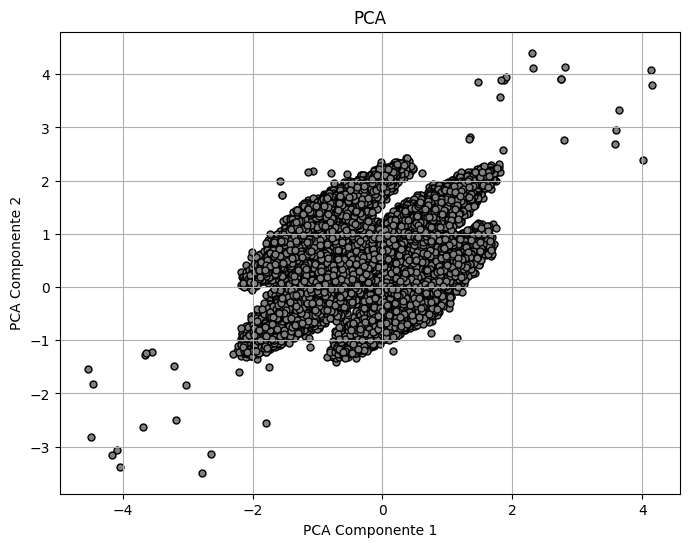

<ipython-input-178-3629989669>:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)


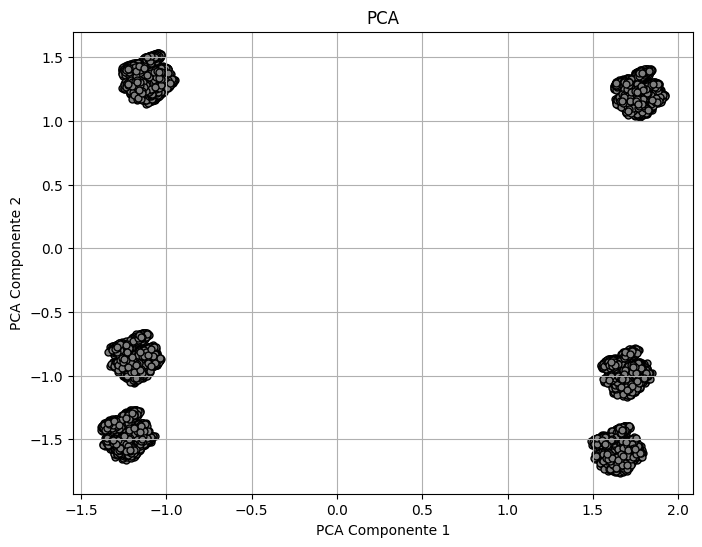

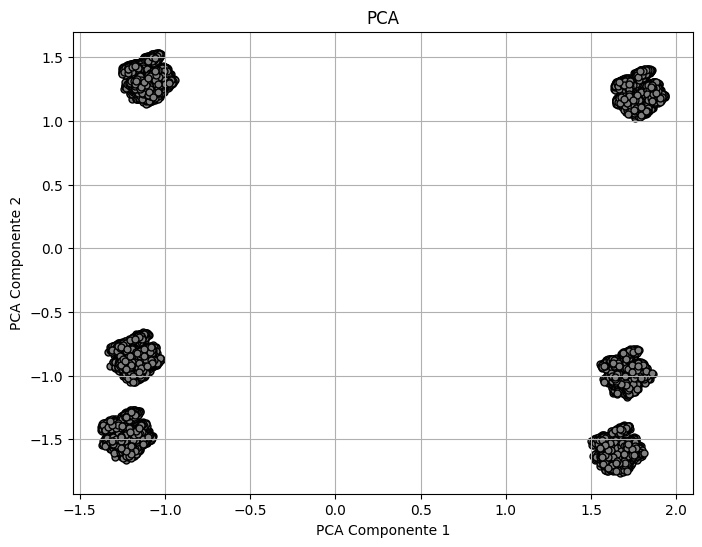

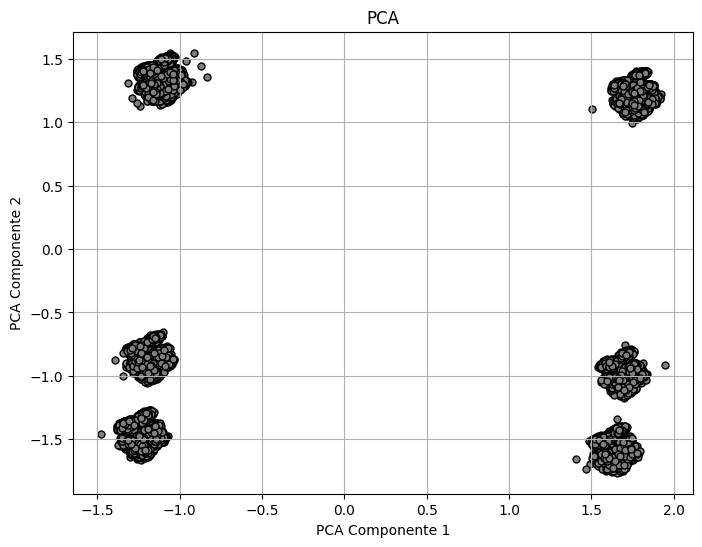

<ipython-input-178-3629989669>:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)


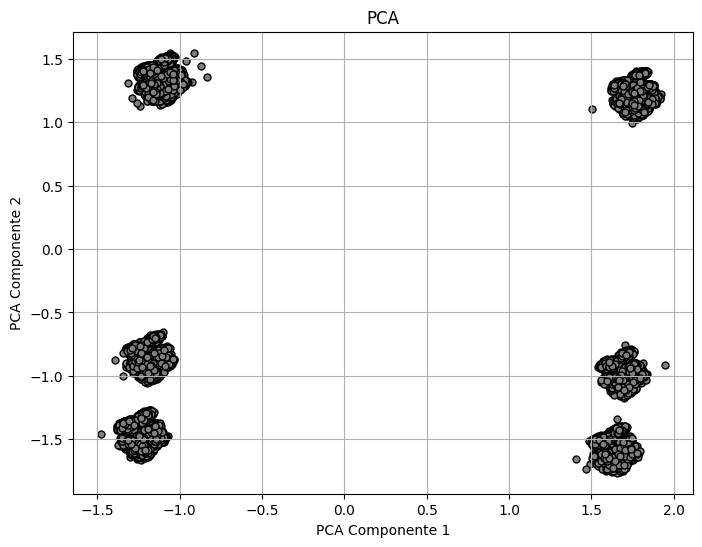

In [ ]:
datasets = {}
X_pcas = {}

for i in range(1, 9):
    with open(f'/content/dataset_v{i}.pkl', 'rb') as f:
        datasets[f'v{i}'] = pickle.load(f)  # Cargar datasets

# Normalizar y aplicar PCA al dataset v8 (dataset al que se le aplico fit)
datasets['v8']['X_train'] = scaler.fit_transform(datasets['v8']['X_train'])
datasets['v8']['X_train'] = pca.fit_transform(datasets['v8']['X_train'])

for i in range(1, 9):
    data = datasets[f'v{i}']

    if i != 8:
        X = scaler.transform(data['X_train'])
    else:
        X = data['X_train']


    if i != 8:
        X_pca = pca.transform(X)
    else:
        X = data['X_train']
    X_pcas[f'v{i}'] = X_pca

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)
    plt.title("PCA")
    plt.xlabel('PCA Componente 1')
    plt.ylabel('PCA Componente 2')
    plt.grid()
    plt.show()

### Funcion para realizar los procesos


### Generar casos de prueba

In [ ]:
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

    # Convertir a array
test_array = np.array(test_cases)

    # Escalar con el mismo scaler que usaste con X_train
test_scaled = scaler.transform(test_array)

    # Aplicar proyección PCA con el mismo modelo entrenado
test_pca = pca.transform(test_scaled)

### Funcion Principal

In [ ]:
best_inertias = {}
best_k_values = {}
best_silhouette_scores = {}

def kmeans_clustering(X_pca, v):
    silhouette_scores = []
    inertias = [] # SSE
    k_values = range(2, 8)
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    axs = axs.flatten()

    for idx, k in enumerate(k_values):
        kmeans = KMeans(n_clusters=k, random_state=42)  # Define el número de clusters
        labels = kmeans.fit_predict(X_pca)                            # Aplica el modelo y obtiene las etiquetas
        centers = kmeans.cluster_centers_                     # Obtiene las coordenadas de los centroides
        inertia = kmeans.inertia_                            # Inercia: suma de distancias intra-cluster
        score = silhouette_score(X_pca, labels)                  # Calcula el Silhouette Score

        silhouette_scores.append(score)
        inertias.append(inertia)

        # Gráficas de dispersión con los resultados de K-Means
        axs[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
        axs[idx].scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroides')
        axs[idx].set_title(f"k={k} | Silhouette={score:.2f} | Inercia={inertia:.0f}")
        axs[idx].set_xlabel("Característica 1")
        axs[idx].set_ylabel("Característica 2")
        axs[idx].legend()


    plt.tight_layout()
    plt.suptitle("Resultados de K-Means para distintos valores de k", fontsize=16, y=1.03)
    plt.show()

    # Gráfica de Silhouette
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, silhouette_scores, marker='o', color='blue')
    plt.title("Silhouette Score vs Número de Clusters (k)")
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.show()
    # Gráfica de Inercia
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, inertias, marker='s', color='orange')
    plt.title("Inercia vs Número de Clusters (k)")
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Inercia (Distancia total intra-cluster)")
    plt.grid(True)
    plt.show()

    # Encontrar el número óptimo de clusters usando la técnica del codo
    kl = KneeLocator(k_values, inertias, curve='convex', direction='decreasing')
    optimal_k = kl.elbow
    best_k_values[v] = optimal_k  # Guardar el número óptimo de clusters

    print(f"Número óptimo de clústeres según la técnica del codo: {optimal_k}")
    inertia_optimal = inertias[optimal_k - 2]  # Ajustar índice para k_values que empieza en 2
    best_inertias[v] = inertia_optimal # Guardar la inercia óptima
    print(f"Inercia para el número óptimo de clústeres (k={optimal_k}): {inertia_optimal:.0f}")
    silhouette_score_optimal = silhouette_scores[optimal_k - 2]  # Ajustar índice para k_values que empieza en 2
    best_silhouette_scores[v] = silhouette_score_optimal  # Guardar el Silhouette Score óptimo
    print(f"Silhouette Score para el número óptimo de clústeres (k={optimal_k}): {silhouette_score_optimal:.2f}")

    # Entrenar el modelo KMeans con el número óptimo de clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit_predict(X_pca)
    # predecir casos de prueba
    predicted_clusters = kmeans.predict(test_pca)

    # Mostrar resultados
    for i, cluster in enumerate(predicted_clusters, 1):
        print(f"Test case {i} → asignado al clúster: {cluster}")

### v1

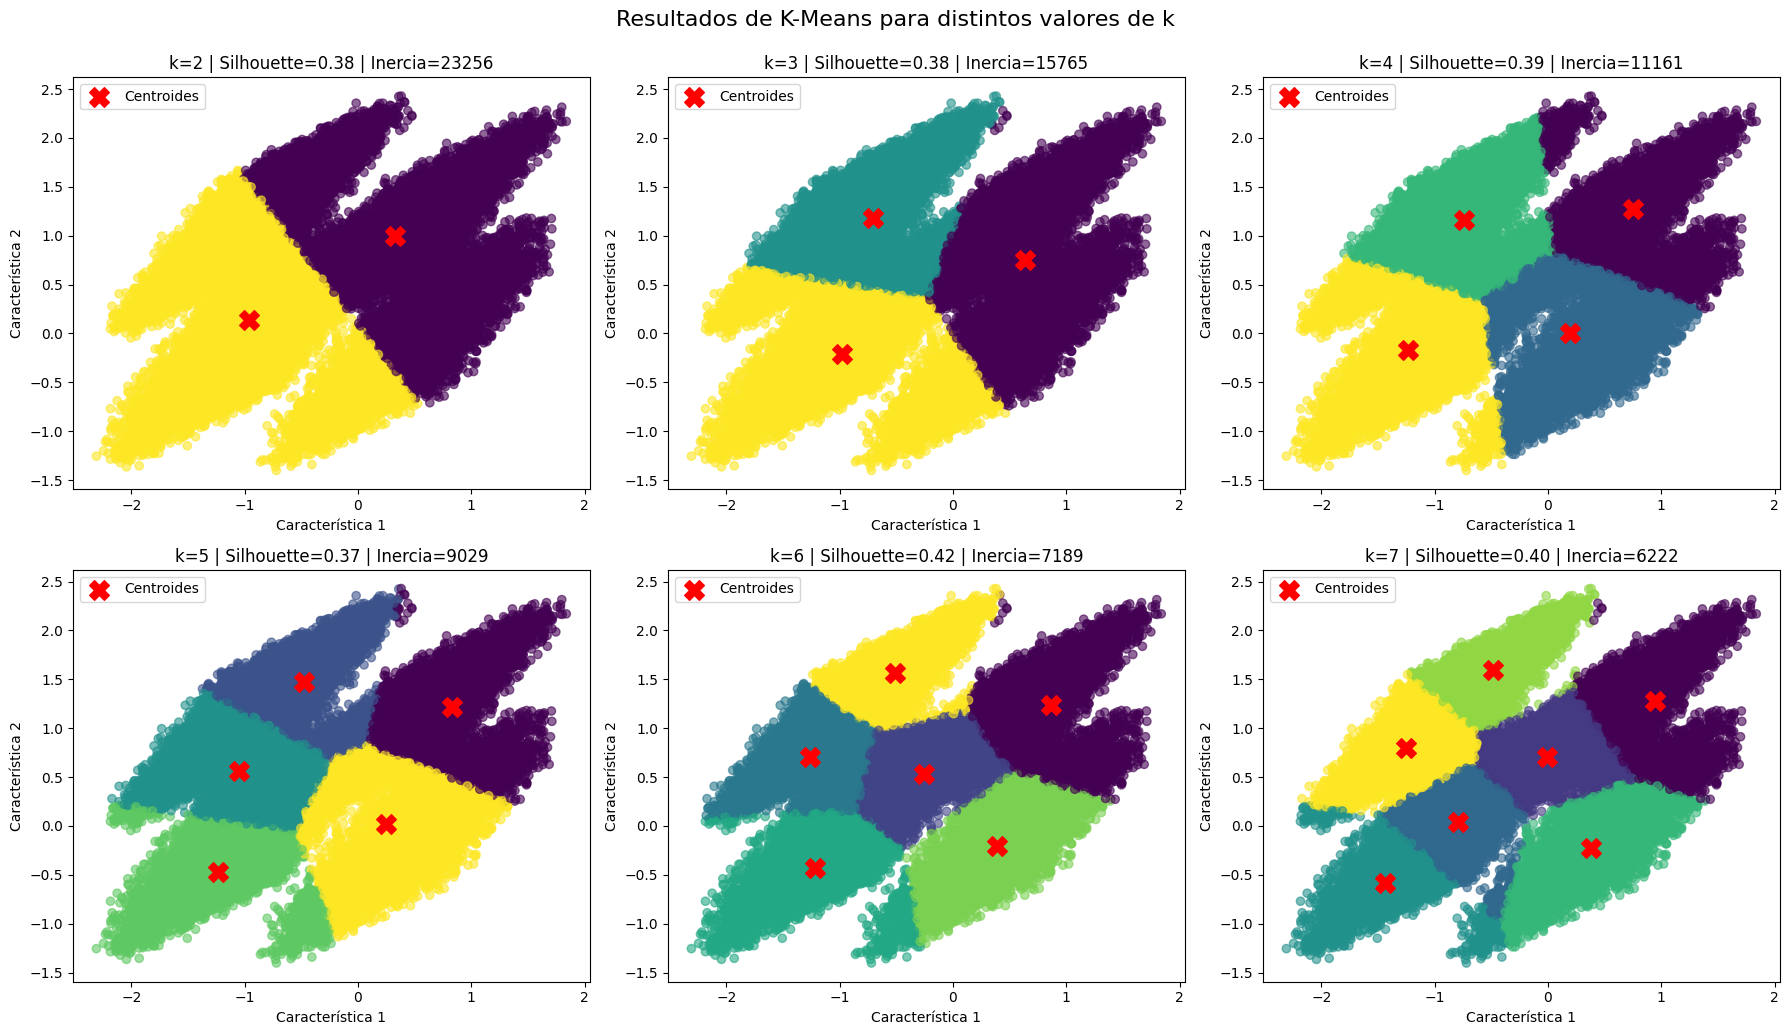

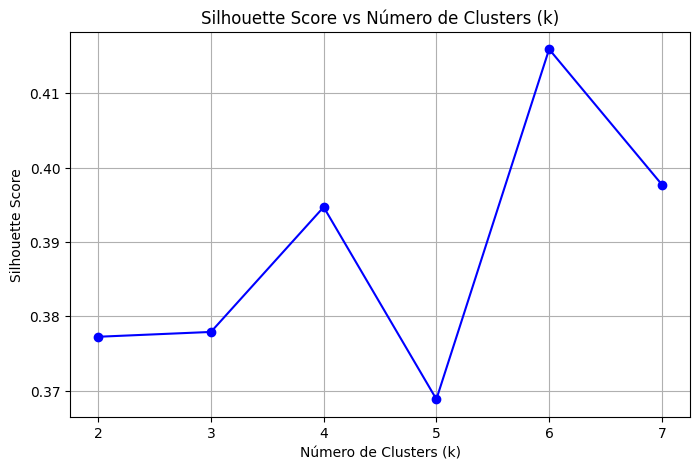

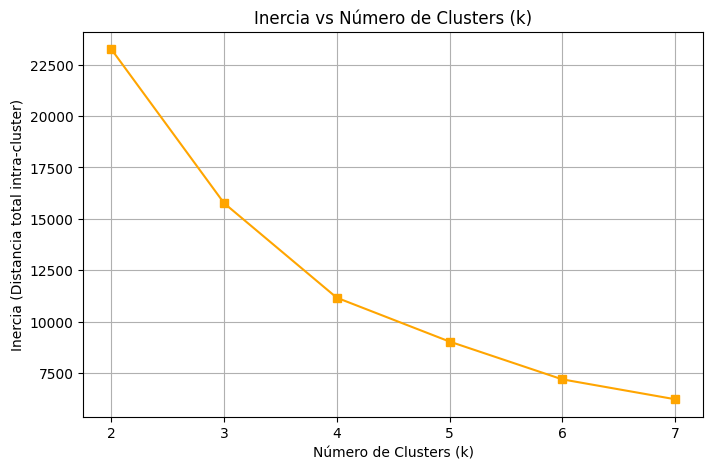

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 11161
Silhouette Score para el número óptimo de clústeres (k=4): 0.39
Test case 1 → asignado al clúster: 3
Test case 2 → asignado al clúster: 3
Test case 3 → asignado al clúster: 1


In [ ]:
kmeans_clustering(X_pcas['v1'],1)

### v2

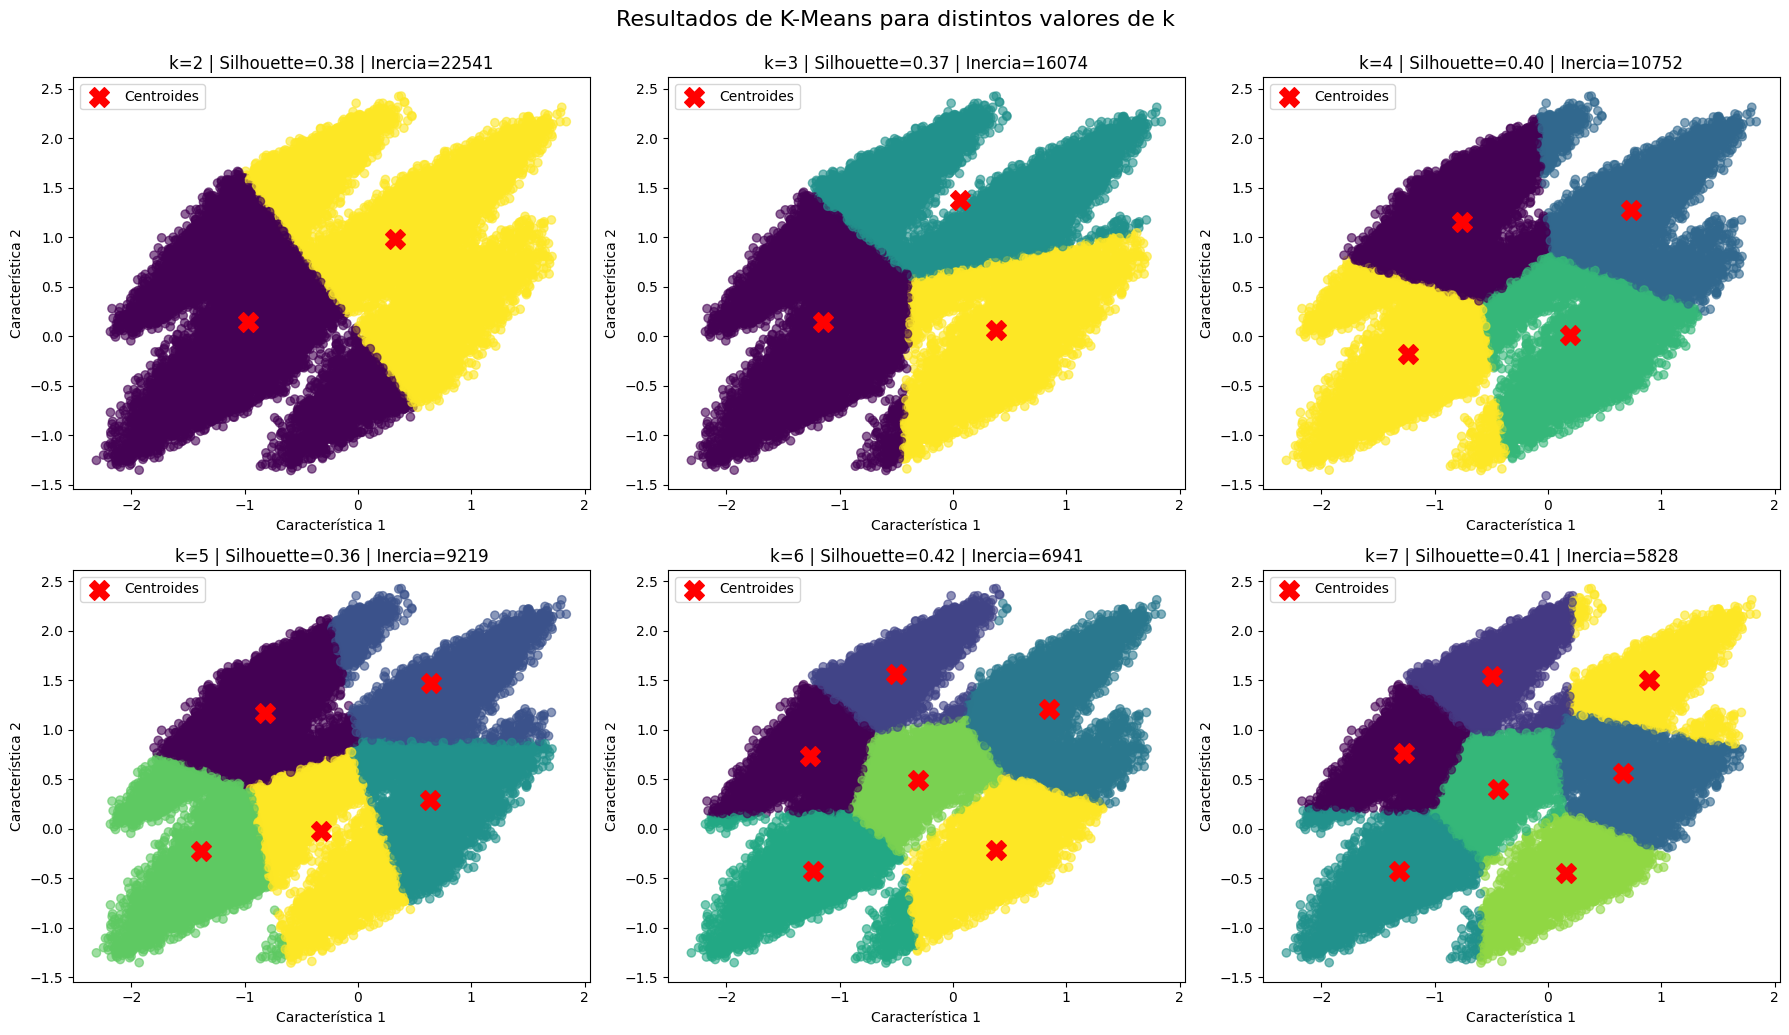

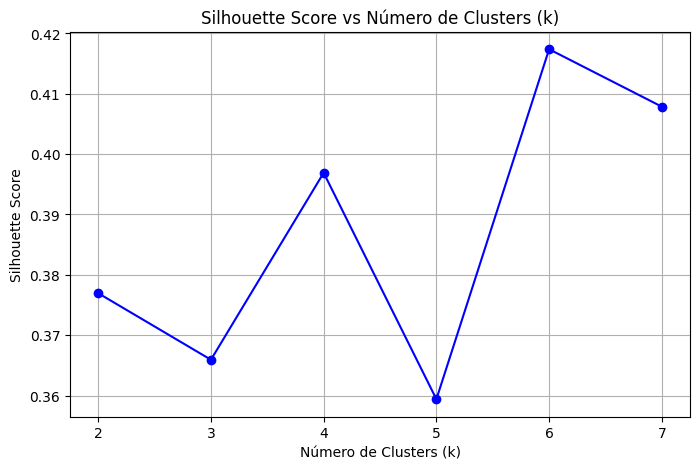

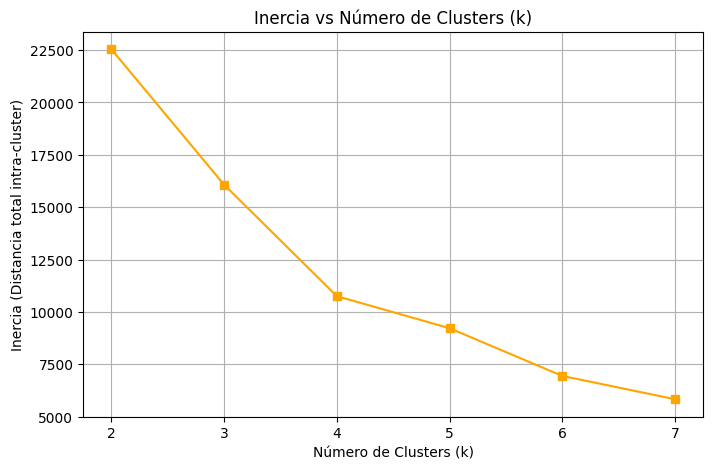

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 10752
Silhouette Score para el número óptimo de clústeres (k=4): 0.40
Test case 1 → asignado al clúster: 3
Test case 2 → asignado al clúster: 3
Test case 3 → asignado al clúster: 2


In [ ]:
kmeans_clustering(X_pcas['v2'],2)

### v3

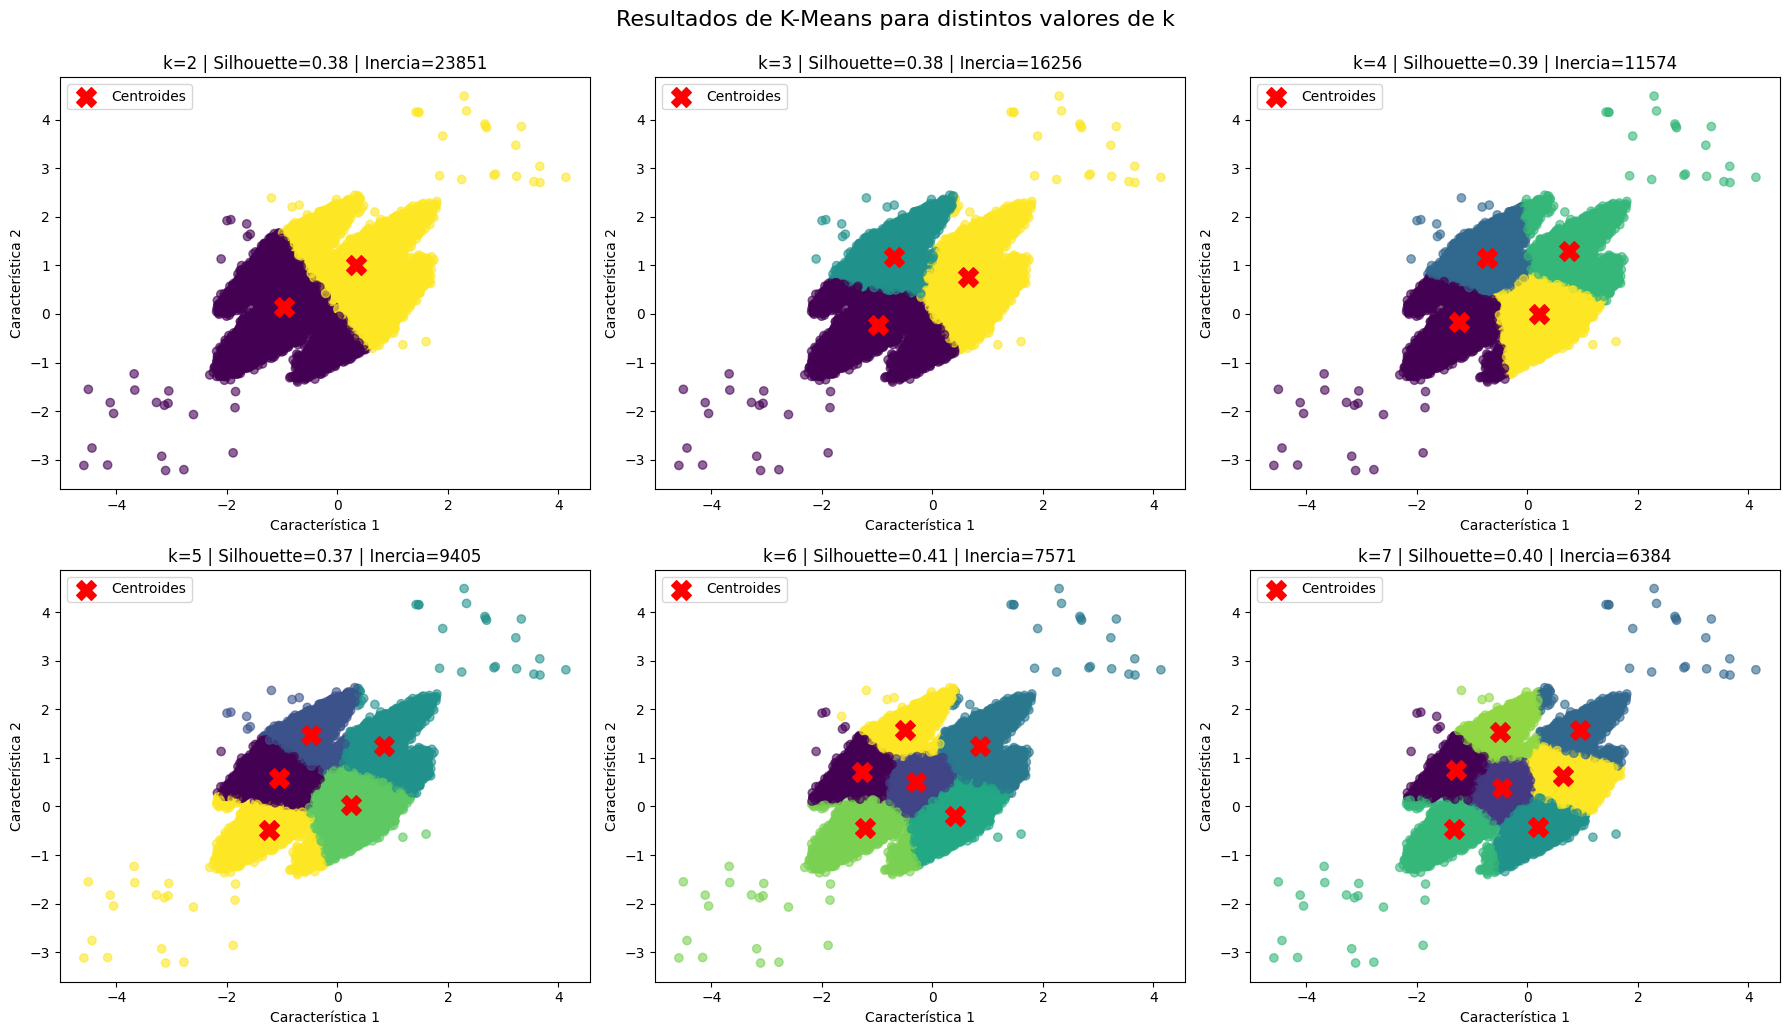

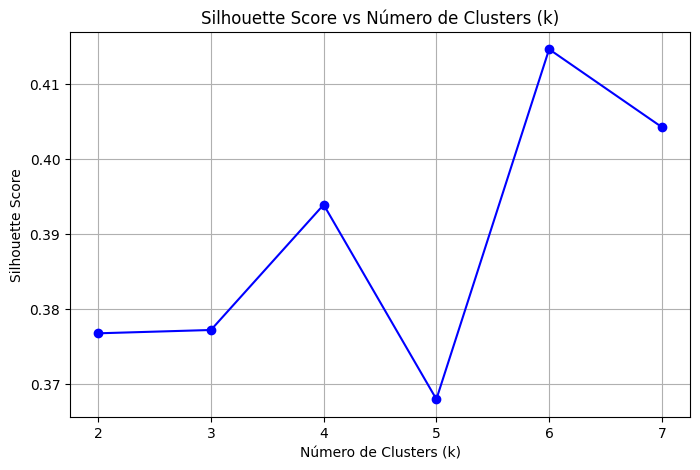

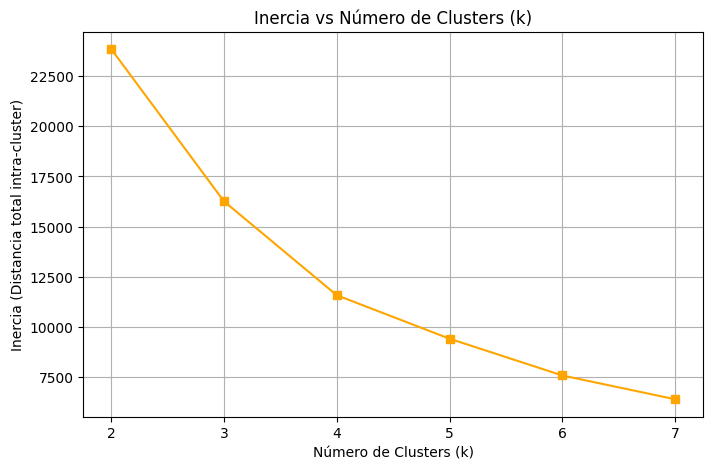

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 11574
Silhouette Score para el número óptimo de clústeres (k=4): 0.39
Test case 1 → asignado al clúster: 0
Test case 2 → asignado al clúster: 0
Test case 3 → asignado al clúster: 3


In [ ]:
kmeans_clustering(X_pcas['v3'],3)

### v4

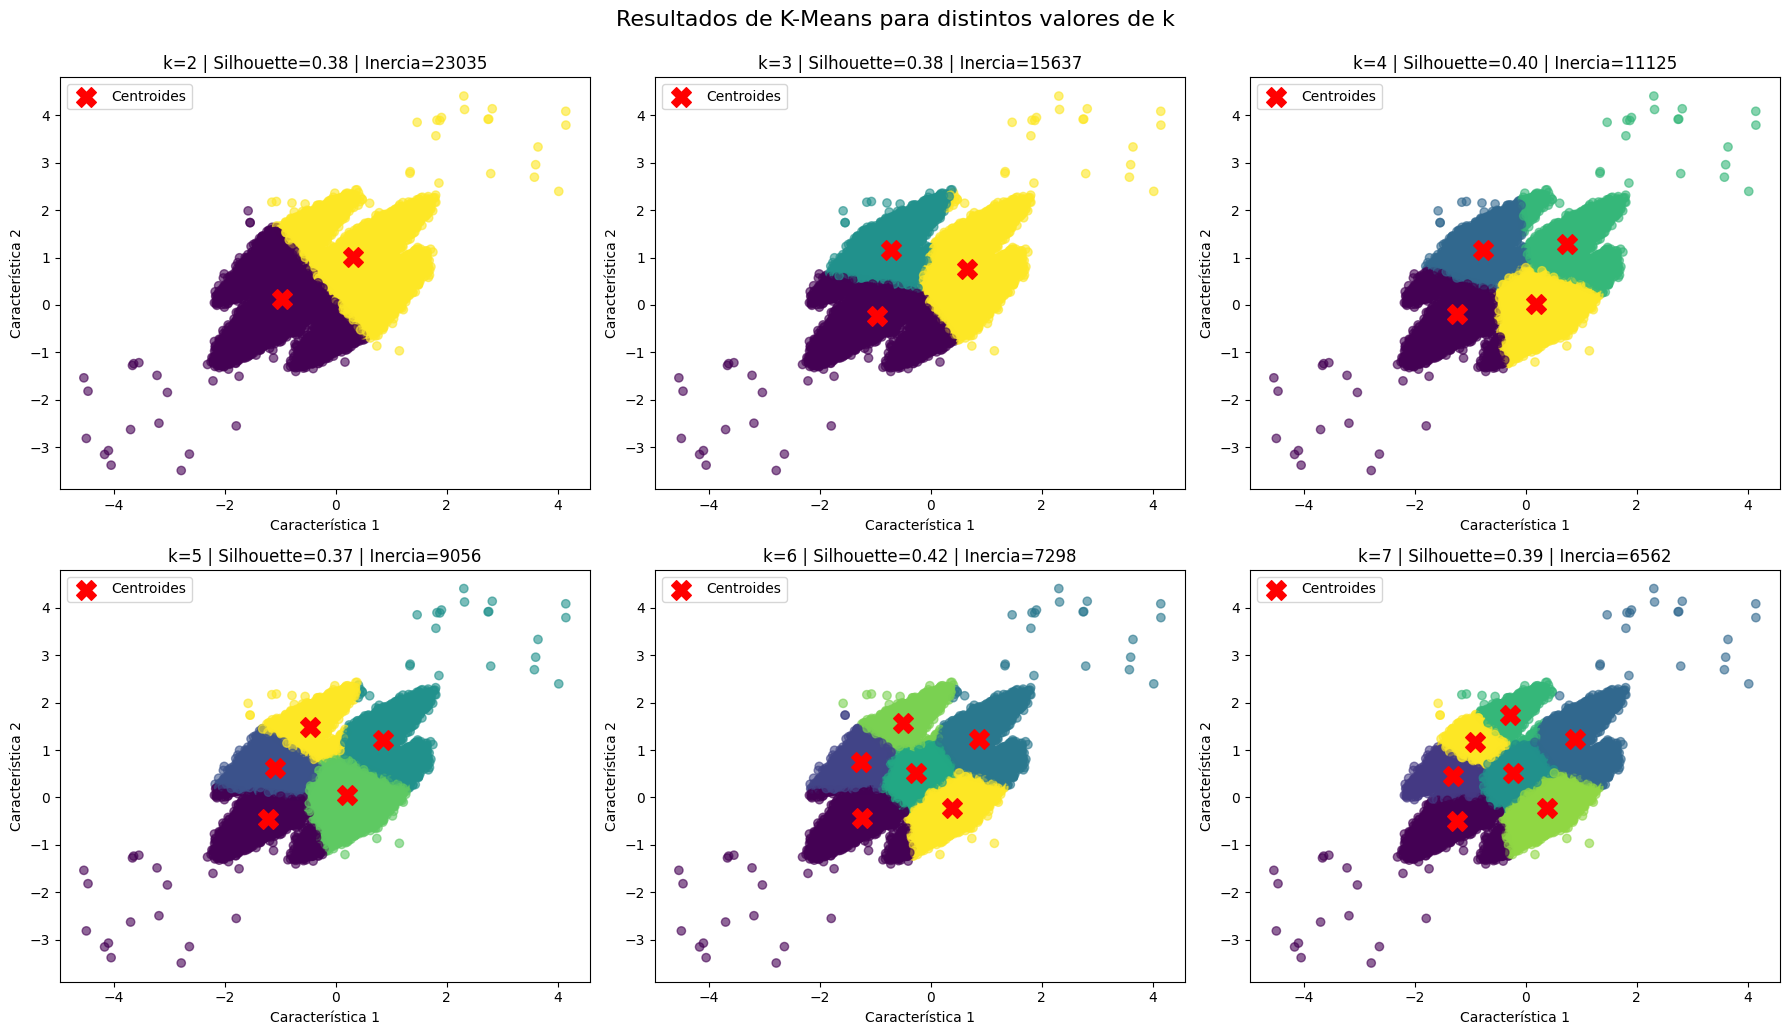

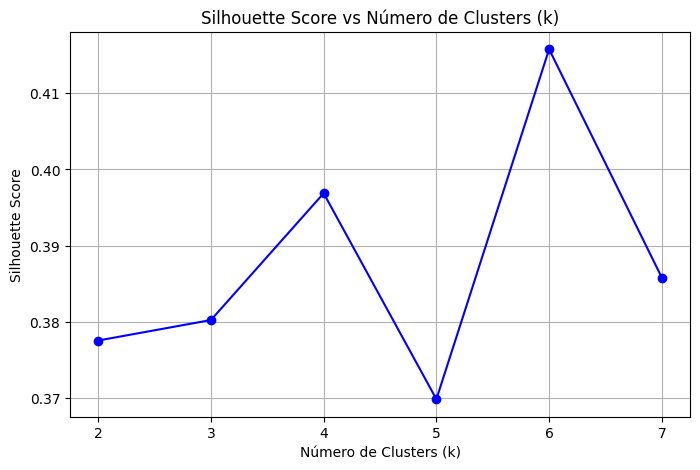

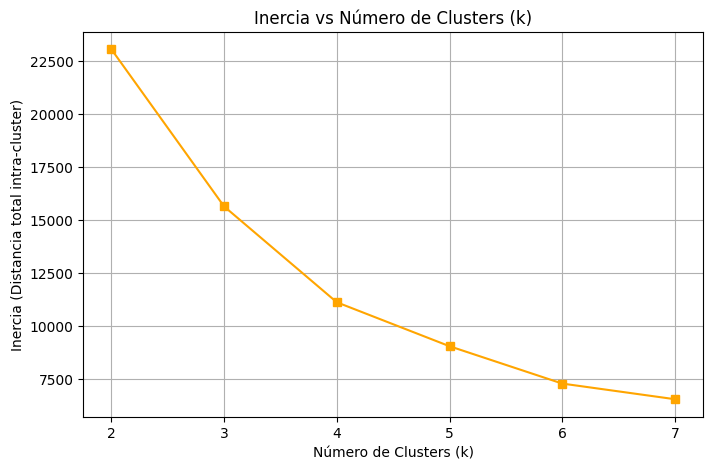

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 11125
Silhouette Score para el número óptimo de clústeres (k=4): 0.40
Test case 1 → asignado al clúster: 0
Test case 2 → asignado al clúster: 0
Test case 3 → asignado al clúster: 3


In [ ]:
kmeans_clustering(X_pcas['v4'],4)

### v5

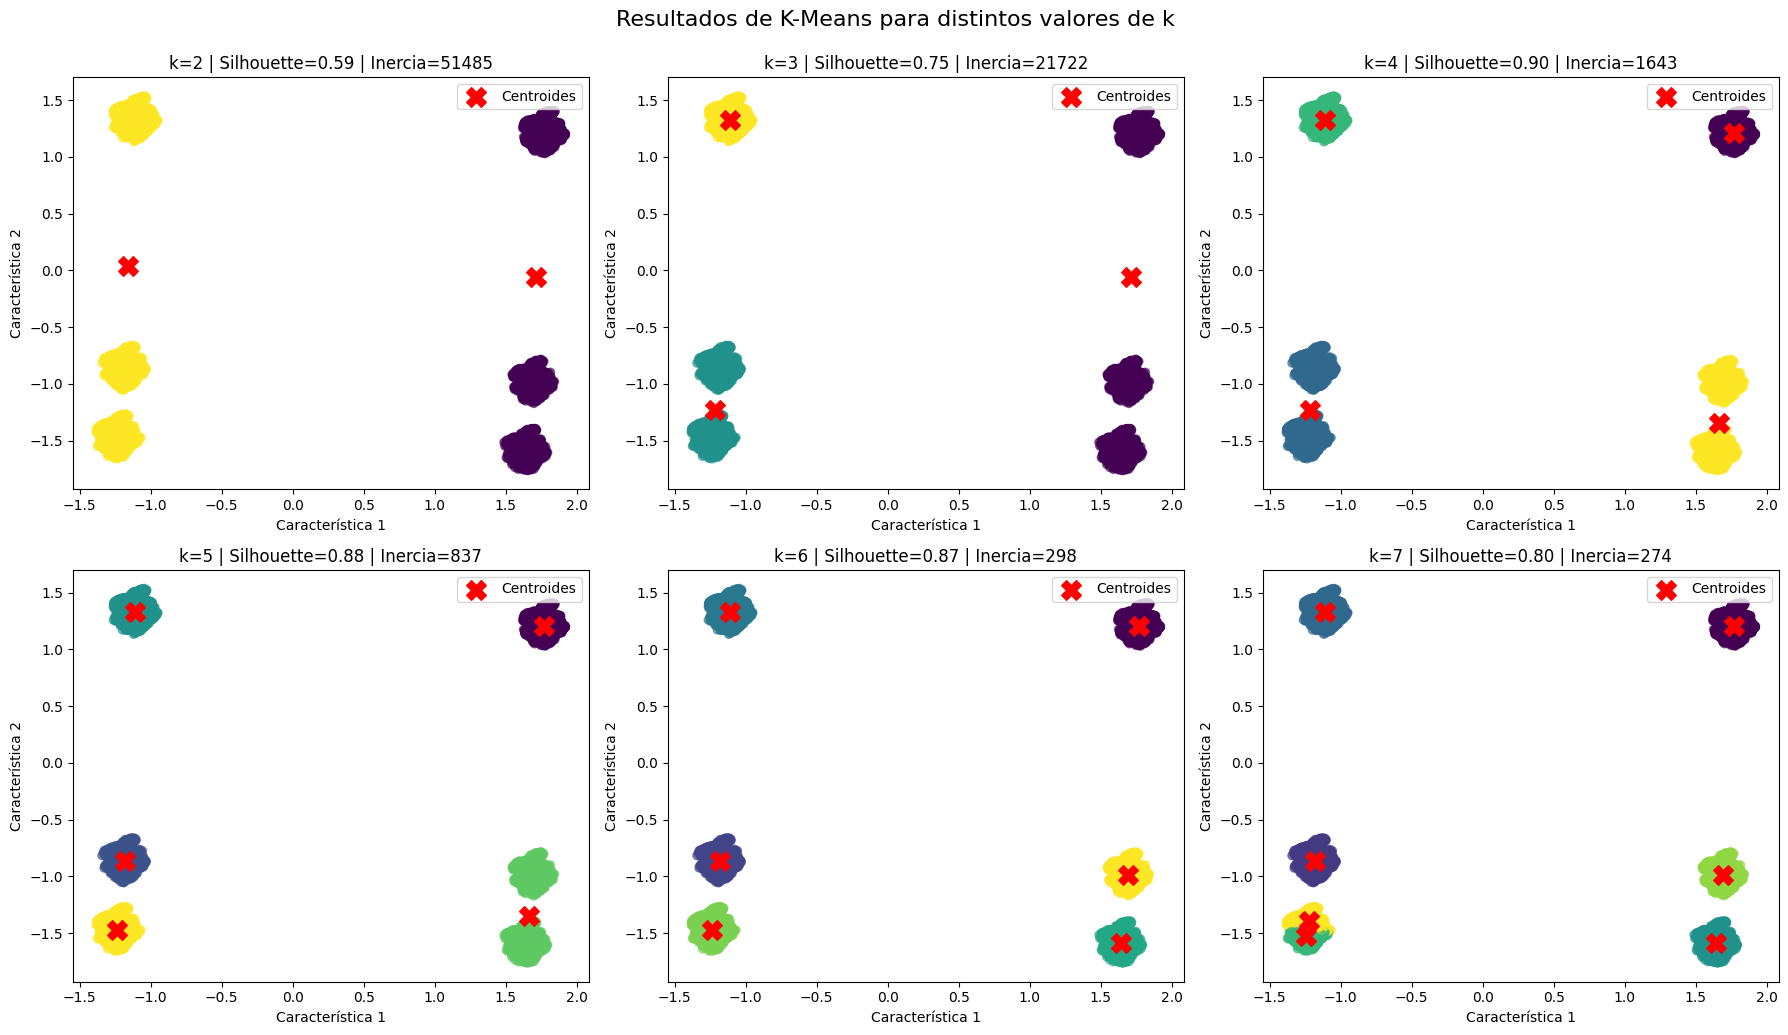

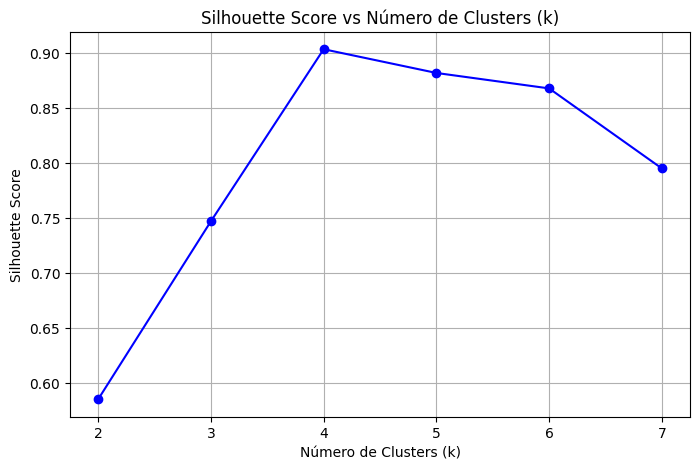

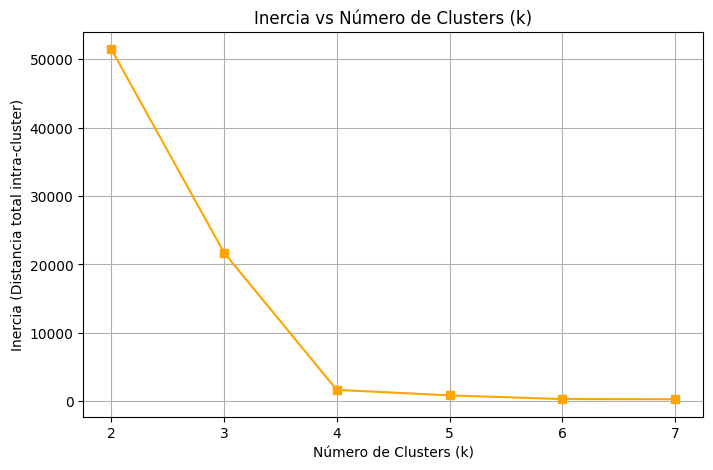

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 1643
Silhouette Score para el número óptimo de clústeres (k=4): 0.90
Test case 1 → asignado al clúster: 1
Test case 2 → asignado al clúster: 1
Test case 3 → asignado al clúster: 2


In [ ]:
kmeans_clustering(X_pcas['v5'],5)

### v6

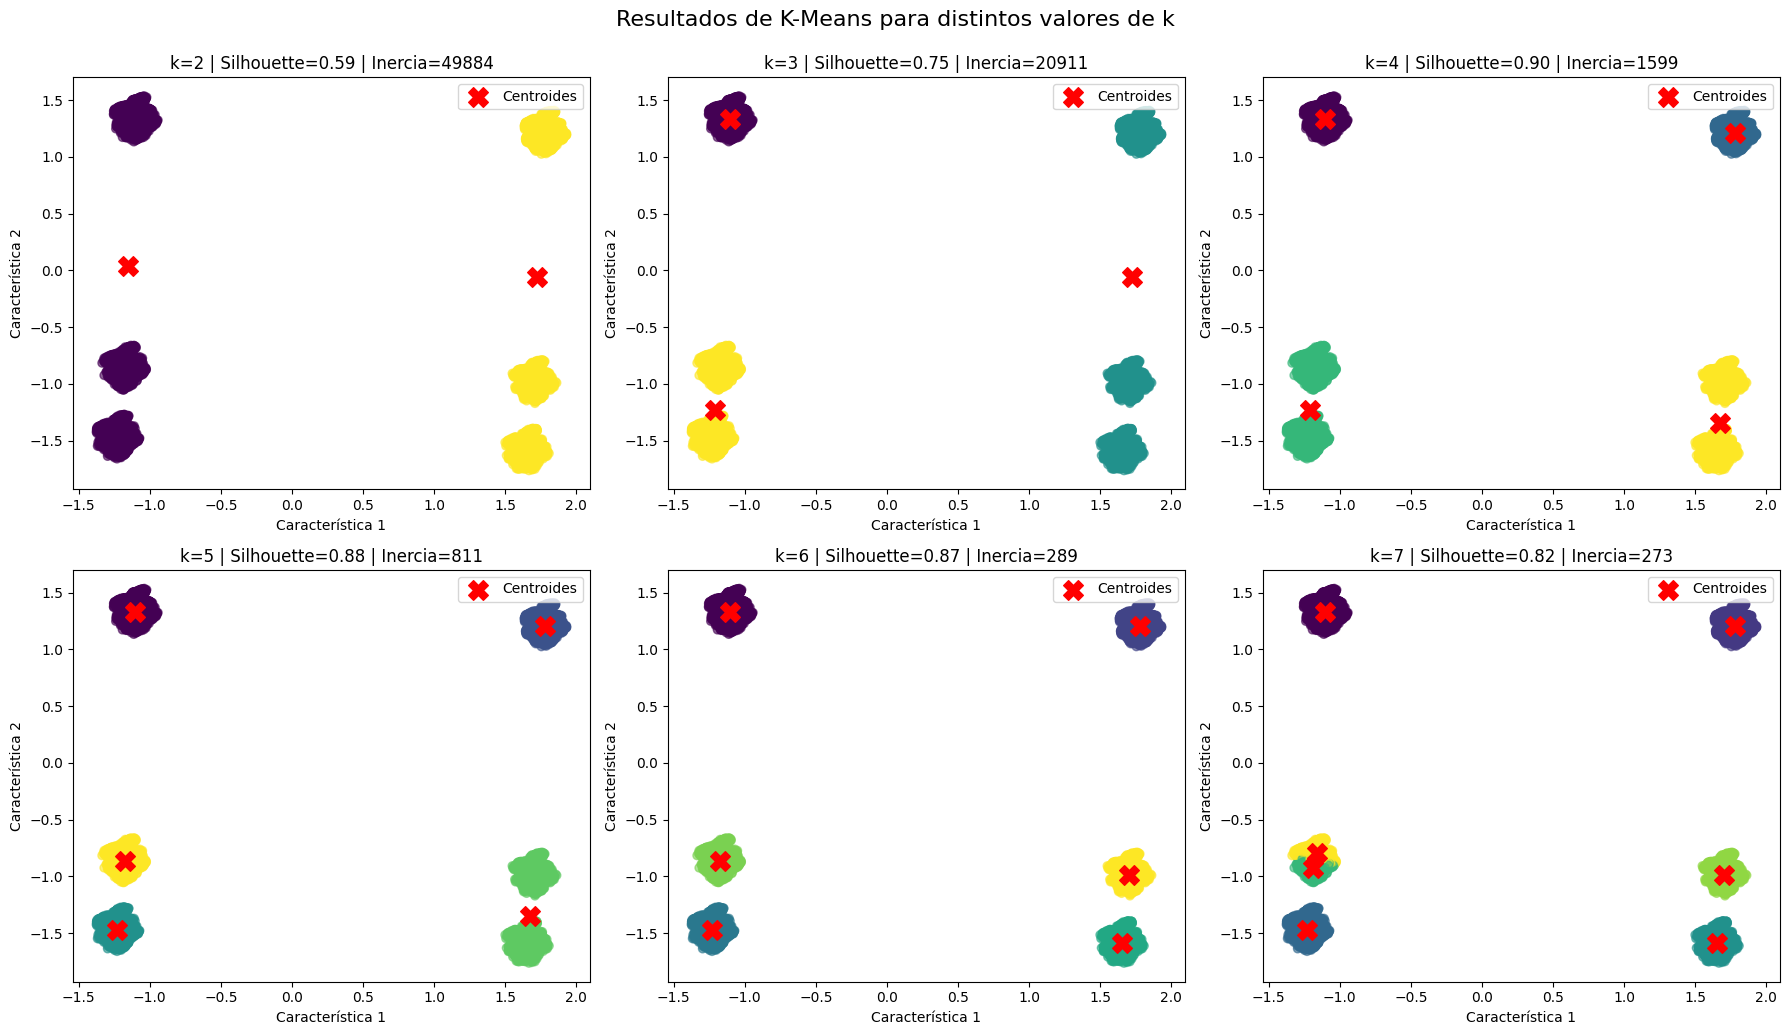

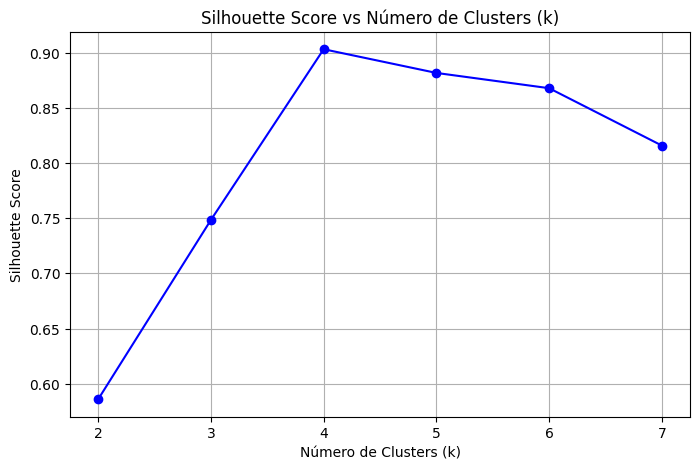

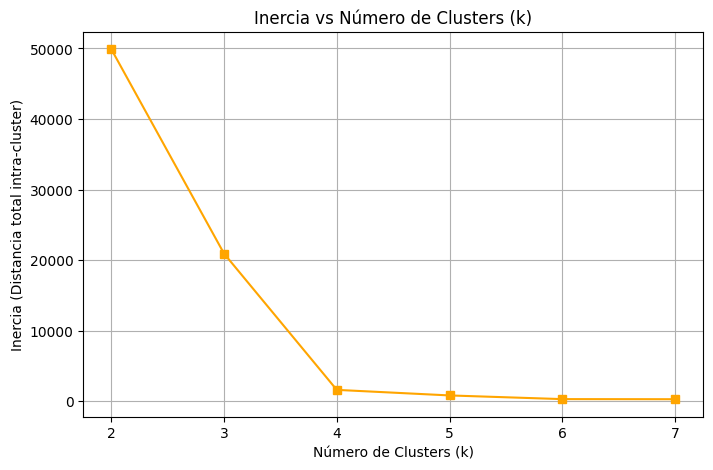

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 1599
Silhouette Score para el número óptimo de clústeres (k=4): 0.90
Test case 1 → asignado al clúster: 2
Test case 2 → asignado al clúster: 2
Test case 3 → asignado al clúster: 0


In [ ]:
kmeans_clustering(X_pcas['v6'],6)

### v7

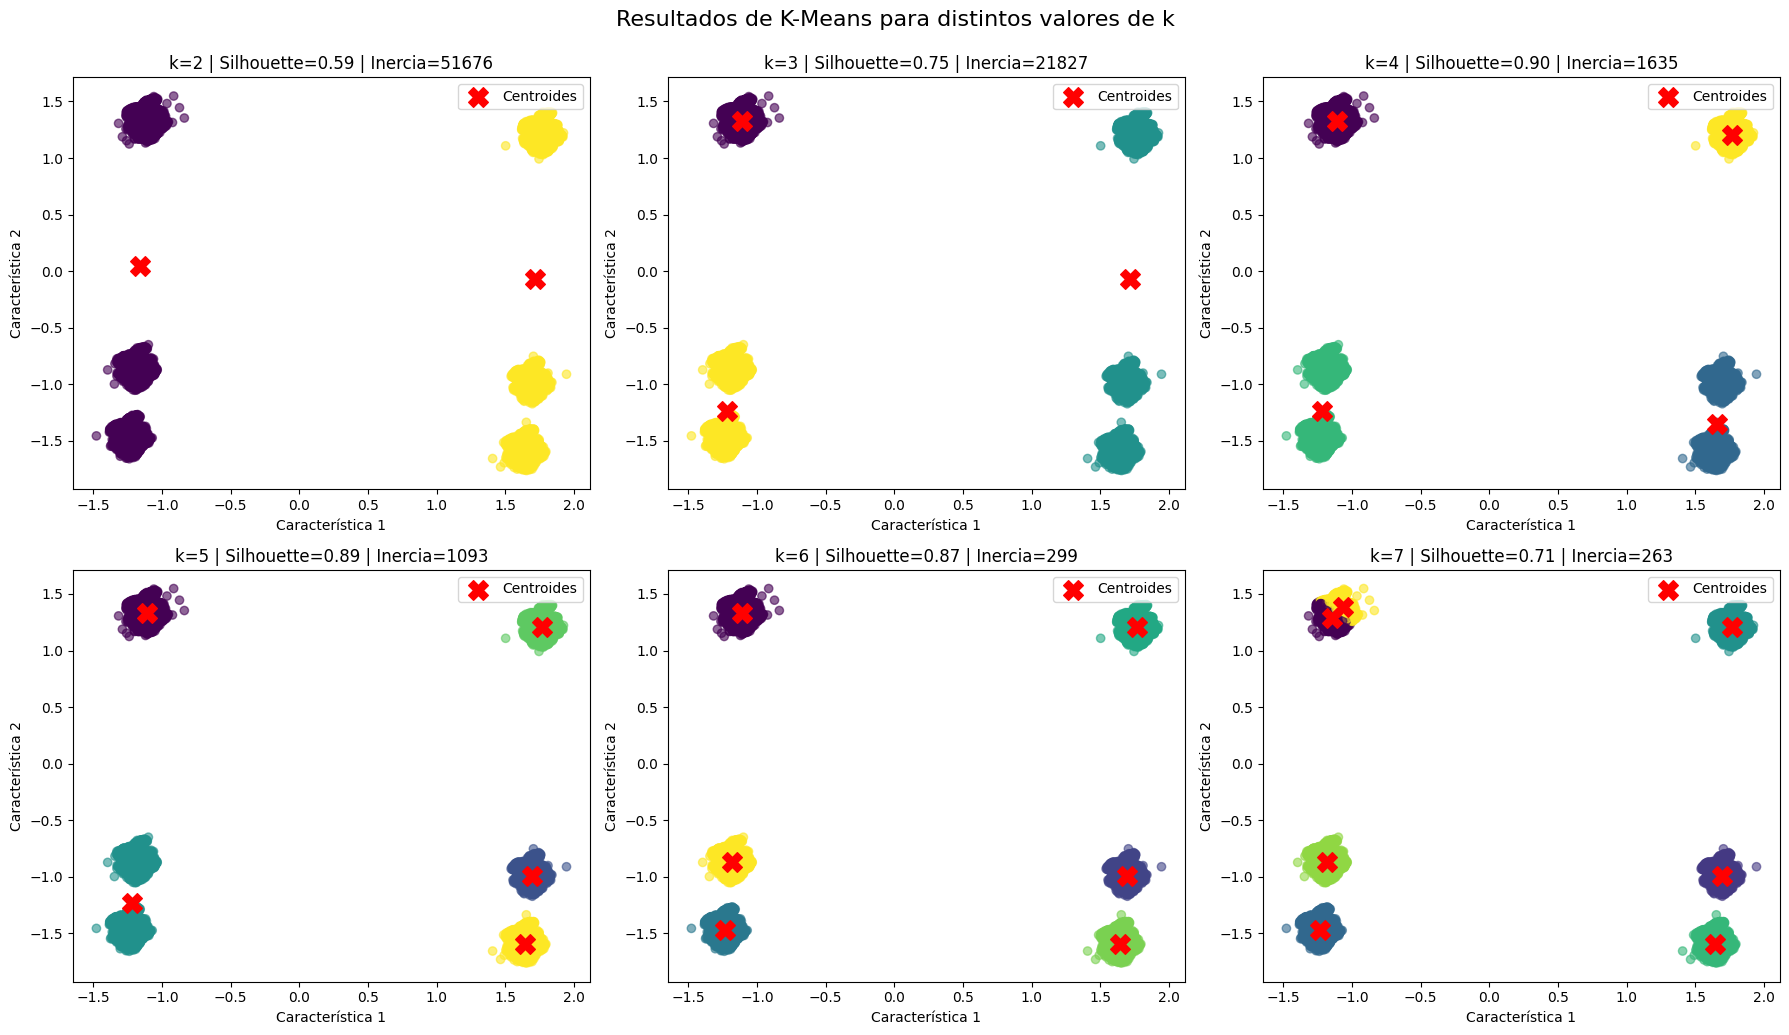

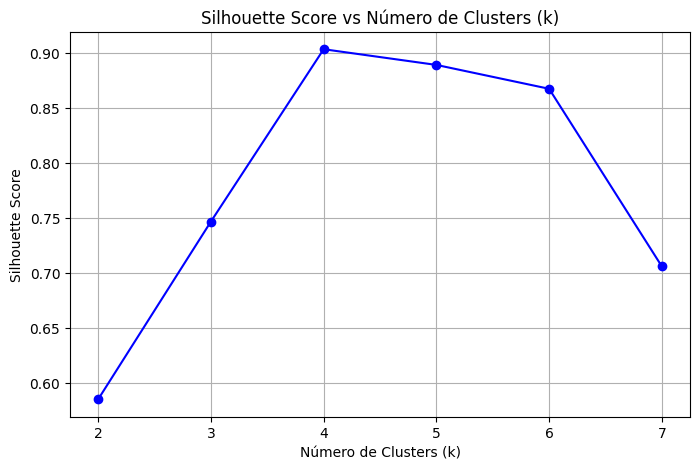

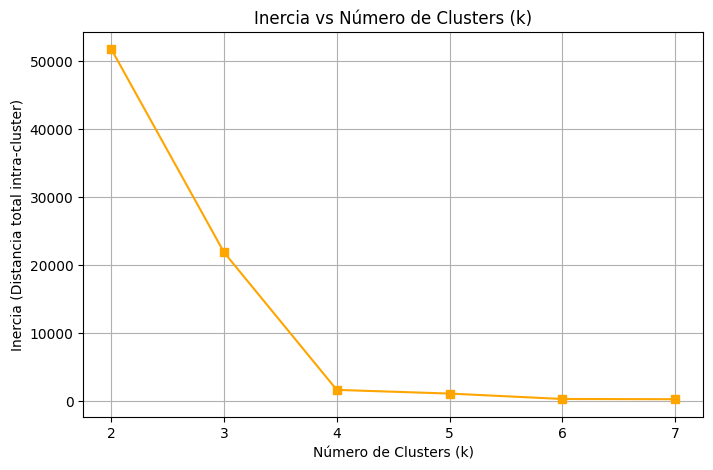

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 1635
Silhouette Score para el número óptimo de clústeres (k=4): 0.90
Test case 1 → asignado al clúster: 2
Test case 2 → asignado al clúster: 2
Test case 3 → asignado al clúster: 0


In [ ]:
kmeans_clustering(X_pcas['v7'],7)

### v8

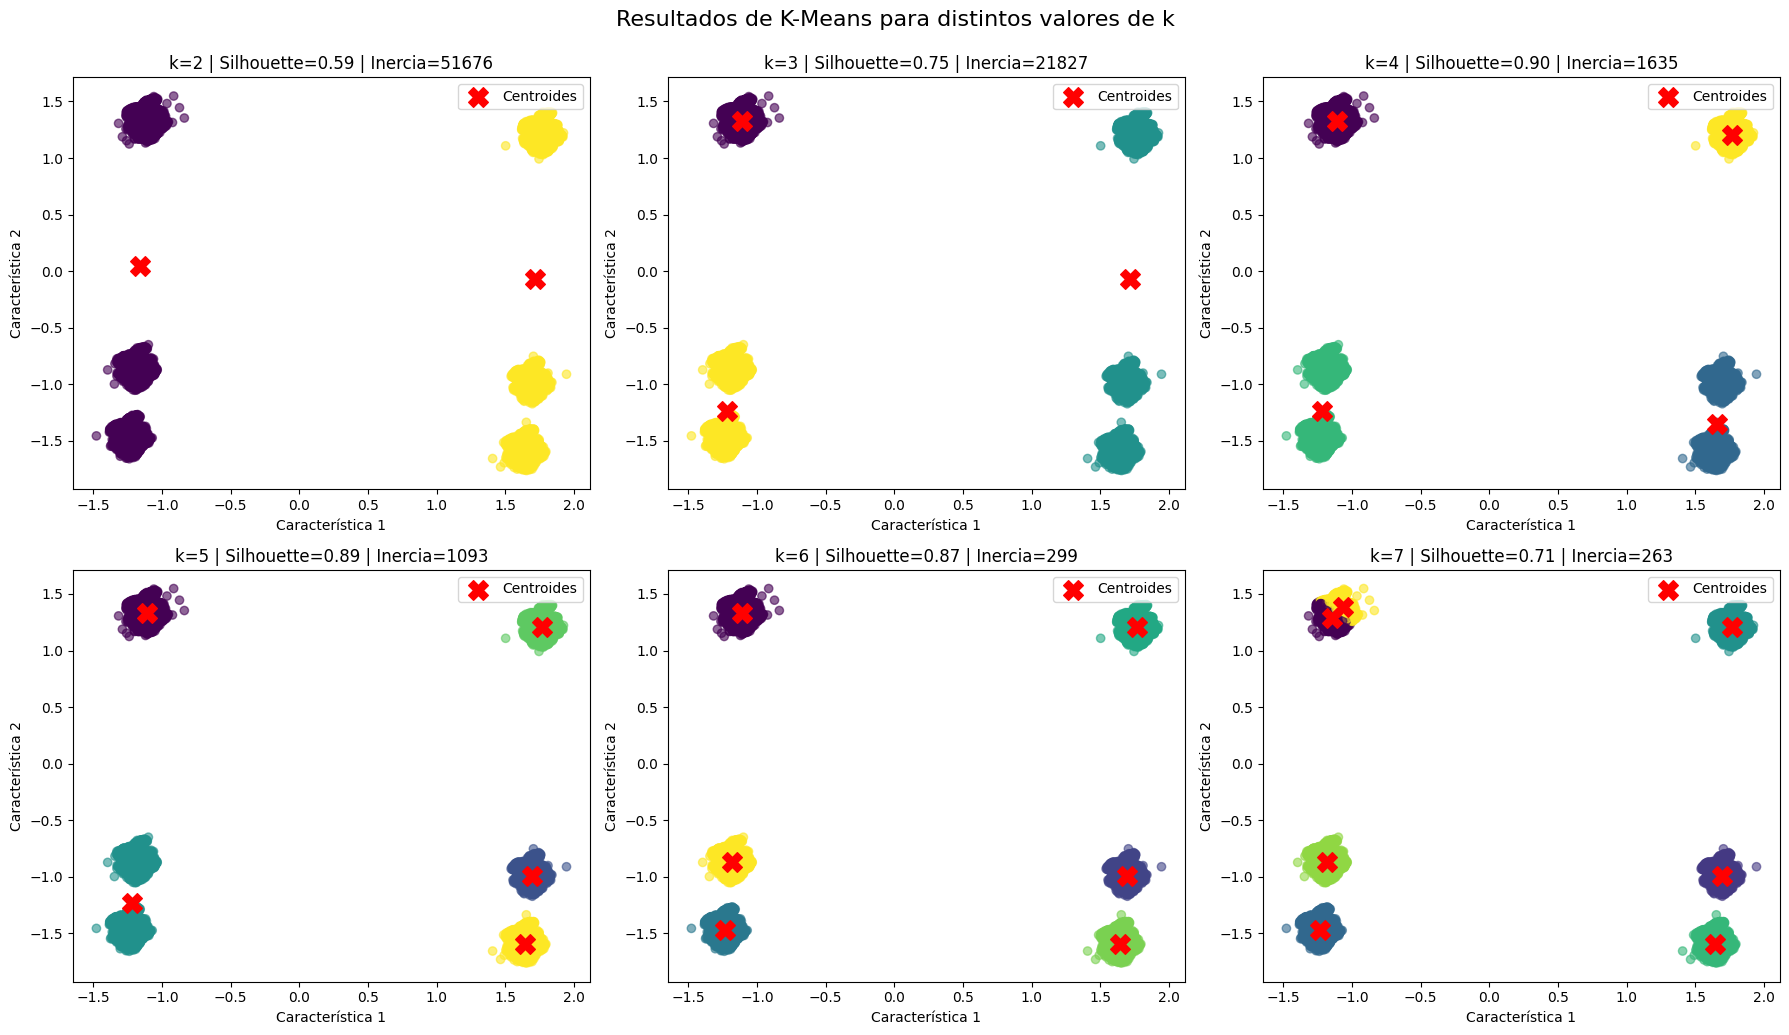

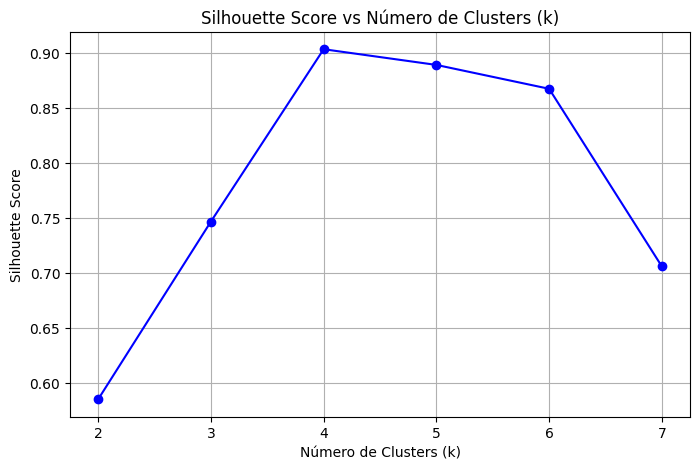

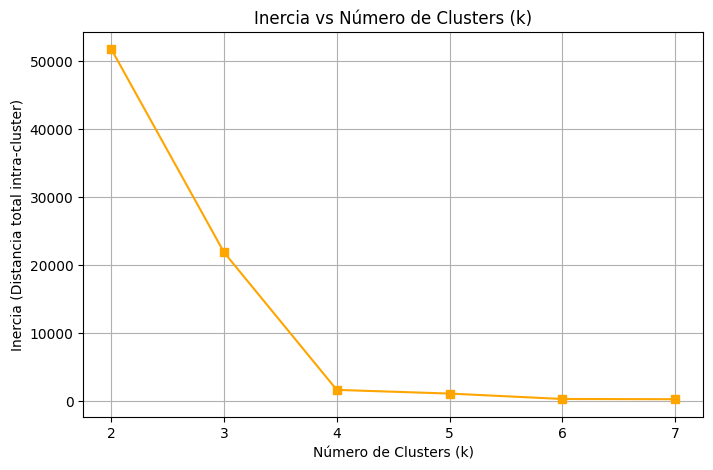

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 1635
Silhouette Score para el número óptimo de clústeres (k=4): 0.90
Test case 1 → asignado al clúster: 2
Test case 2 → asignado al clúster: 2
Test case 3 → asignado al clúster: 0


In [ ]:
kmeans_clustering(X_pcas['v8'],8)

In [ ]:
for i in range(1, 9):
    print(f"Dataset v{i} - Mejor número de clusters: {best_k_values[i]}, Inercia: {best_inertias[i]}, Silhouette Score: {best_silhouette_scores[i]:.2f}")

# plot de barras silhouette scores
def plot_silhouette_scores(scores_dict, title="Silhouette Scores - K-Means"):
    versiones = list(scores_dict.keys())
    scores = list(scores_dict.values())

    plt.figure(figsize=(10, 5))
    bars = plt.bar(versiones, scores, color='skyblue', edgecolor='black')

    # Etiquetas de valor en cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

    plt.title(title)
    plt.xlabel("Versión del dataset")
    plt.ylabel("Silhouette Score")
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

Dataset v1 - Mejor número de clusters: 4, Inercia: 11161.289372897956, Silhouette Score: 0.39
Dataset v2 - Mejor número de clusters: 4, Inercia: 10751.525871553831, Silhouette Score: 0.40
Dataset v3 - Mejor número de clusters: 4, Inercia: 11574.242457700695, Silhouette Score: 0.39
Dataset v4 - Mejor número de clusters: 4, Inercia: 11124.96710322076, Silhouette Score: 0.40
Dataset v5 - Mejor número de clusters: 4, Inercia: 1642.5974593642077, Silhouette Score: 0.90
Dataset v6 - Mejor número de clusters: 4, Inercia: 1598.8930310064748, Silhouette Score: 0.90
Dataset v7 - Mejor número de clusters: 4, Inercia: 1635.390648142446, Silhouette Score: 0.90
Dataset v8 - Mejor número de clusters: 4, Inercia: 1635.390648142446, Silhouette Score: 0.90


### Resultado

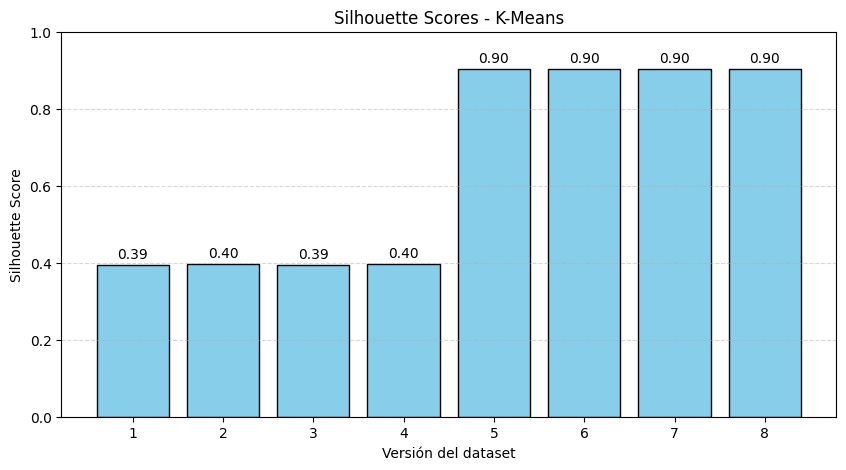

In [ ]:
plot_silhouette_scores(best_silhouette_scores)

## DBScan

### Estimar eps

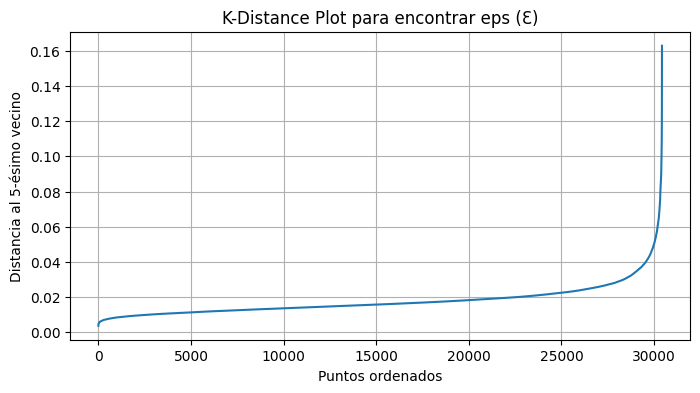

Dataset v1 - Valor óptimo de eps (Ɛ): 0.06


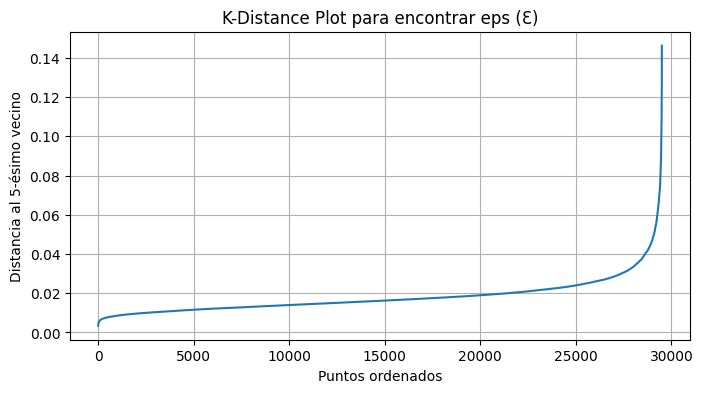

Dataset v2 - Valor óptimo de eps (Ɛ): 0.06


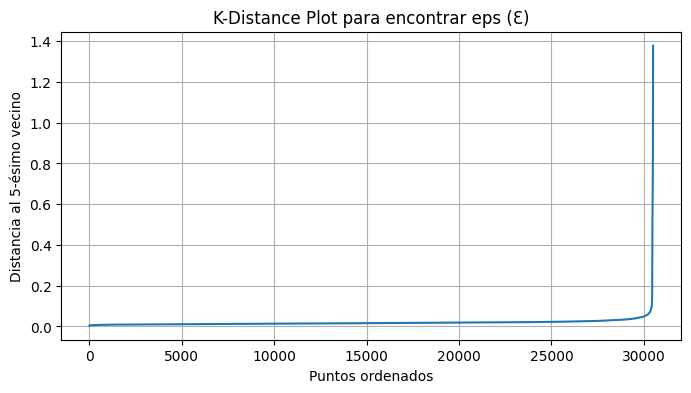

Dataset v3 - Valor óptimo de eps (Ɛ): 0.08


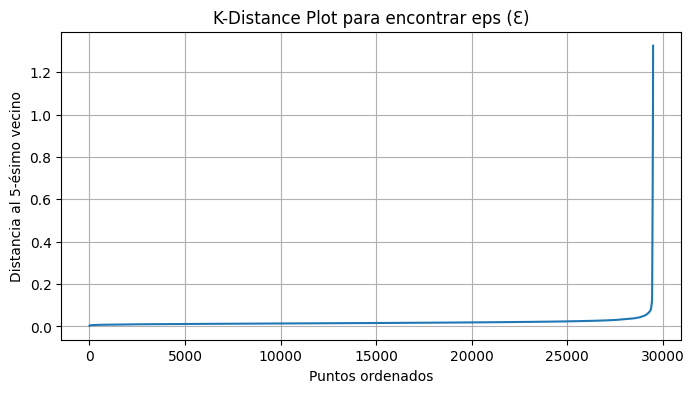

Dataset v4 - Valor óptimo de eps (Ɛ): 0.07


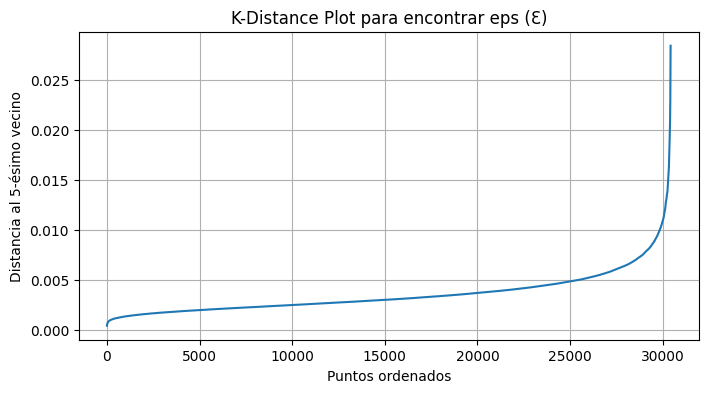

Dataset v5 - Valor óptimo de eps (Ɛ): 0.01


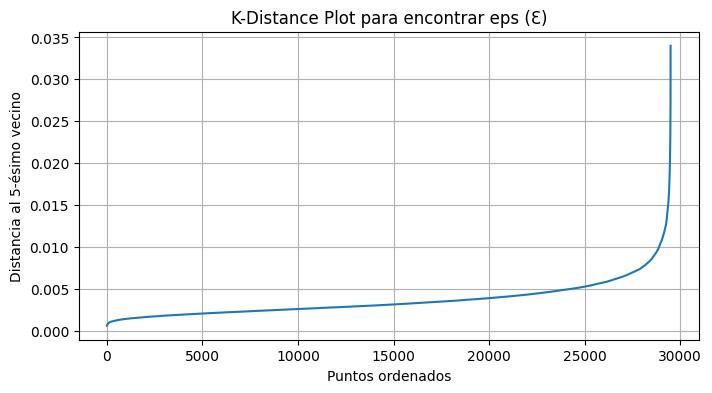

Dataset v6 - Valor óptimo de eps (Ɛ): 0.01


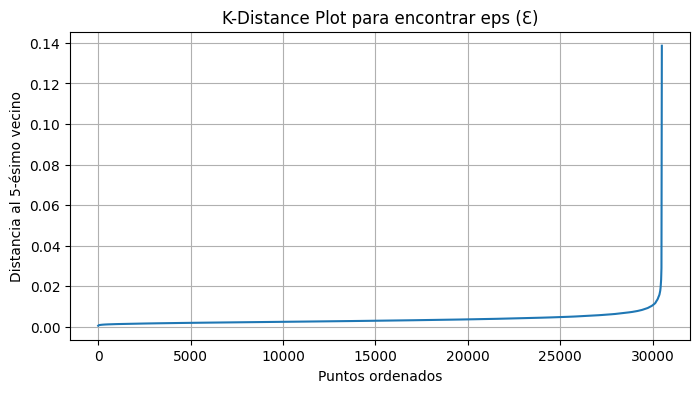

Dataset v7 - Valor óptimo de eps (Ɛ): 0.01


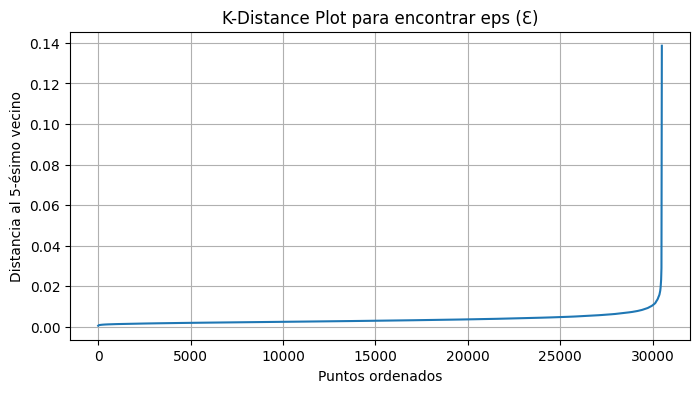

Dataset v8 - Valor óptimo de eps (Ɛ): 0.01


In [ ]:
def plot_k_distance(X):
    neigh = NearestNeighbors(n_neighbors=5)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)

    # distancias al k-ésimo vecino
    distances = np.sort(distances[:, 4]) # Tomamos la 5ta distancia más cercana

    # Graficar
    plt.figure(figsize=(8, 4))
    plt.plot(distances)
    plt.ylabel(f"Distancia al 5-ésimo vecino")
    plt.xlabel("Puntos ordenados")
    plt.title("K-Distance Plot para encontrar eps (Ɛ)")
    plt.grid(True)
    plt.show()
    ebs = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
    optimal_eps = distances[ebs.knee]
    return optimal_eps

optimal_epsilons = {}
for i in range(1, 9):
    optimal_eps = plot_k_distance(X_pcas[f'v{i}'])
    optimal_epsilons[f'v{i}'] = optimal_eps
    print(f"Dataset v{i} - Valor óptimo de eps (Ɛ): {optimal_eps:.2f}")

### Aplicar DBScan

In [ ]:
silhouette_scores_dbscan = {}

def aplicar_dbscan_y_graficar(X_pca, eps, min_samples=5, nombre_dataset=''):
    # Aplicar DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_pca)

    #calcular silhouette score
    score = silhouette_score(X_pca, labels)
    silhouette_scores_dbscan[nombre_dataset] = score
    print(f"Silhouette Score para DBSCAN en {nombre_dataset}: {score:.2f}")


    # Graficar los resultados
    unique_labels = np.unique(labels)
    colores = plt.colormaps.get_cmap('tab10')
    plt.figure(figsize=(8, 5))

    for idx, label in enumerate(unique_labels):
        # -1 es el ruido en DBSCAN
        color = 'k' if label == -1 else colores(idx)
        etiqueta = 'Ruido' if label == -1 else f'Cluster {label}'

        plt.scatter(
            X_pca[labels == label, 0],
            X_pca[labels == label, 1],
            s=10,
            color=color,
            label=etiqueta
        )

    print("\nPredicciones de DBSCAN para los test cases:")
    core_points = X_pca[labels != -1]
    core_labels = labels[labels != -1]

    if len(core_points) > 0:
        neigh = NearestNeighbors(n_neighbors=1)
        neigh.fit(core_points)
        distances, indices = neigh.kneighbors(test_pca)
        pred_labels = core_labels[indices.flatten()]

        for i, label in enumerate(pred_labels):
            print(f"Test case {i+1}: asignado a cluster {label}")


    plt.title(f"Clusters DBSCAN - {nombre_dataset}")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(title="Clusters")
    plt.grid(True)
    plt.show()

    return labels


Aplicando DBSCAN sobre v1 con eps=0.0578
Silhouette Score para DBSCAN en v1: -0.27

Predicciones de DBSCAN para los test cases:
Test case 1: asignado a cluster 0
Test case 2: asignado a cluster 0
Test case 3: asignado a cluster 0


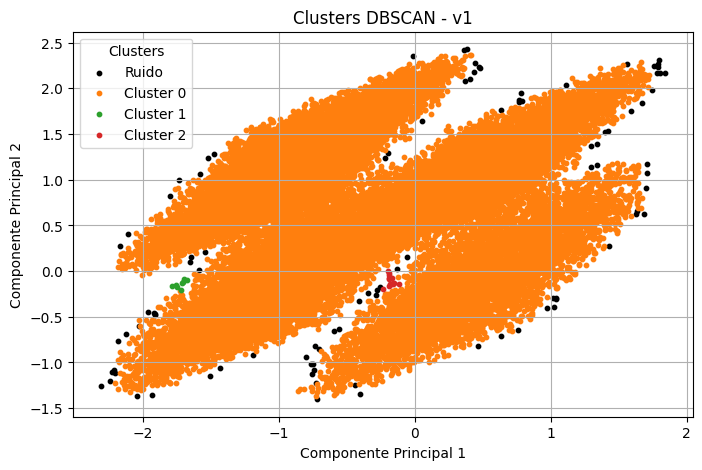


Aplicando DBSCAN sobre v2 con eps=0.0602
Silhouette Score para DBSCAN en v2: 0.16

Predicciones de DBSCAN para los test cases:
Test case 1: asignado a cluster 0
Test case 2: asignado a cluster 0
Test case 3: asignado a cluster 0


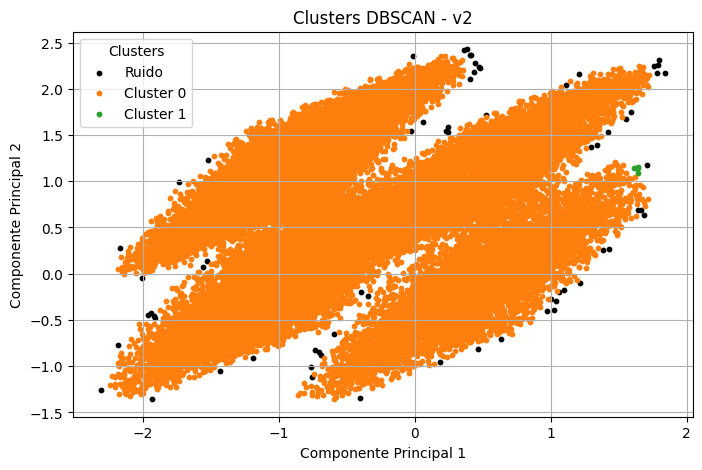


Aplicando DBSCAN sobre v3 con eps=0.0795
Silhouette Score para DBSCAN en v3: 0.56

Predicciones de DBSCAN para los test cases:
Test case 1: asignado a cluster 0
Test case 2: asignado a cluster 0
Test case 3: asignado a cluster 0


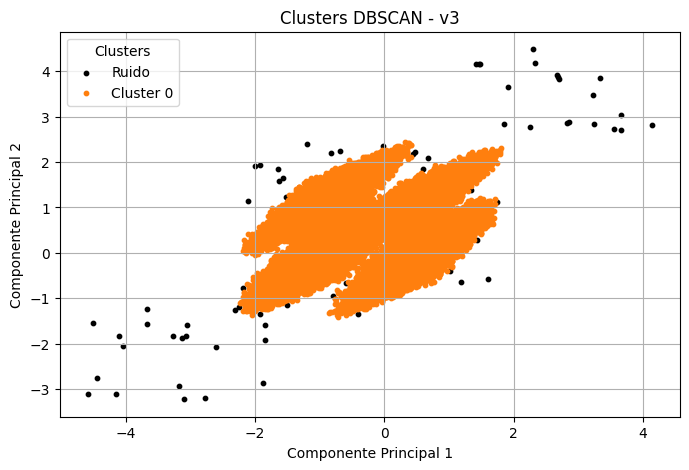


Aplicando DBSCAN sobre v4 con eps=0.0725
Silhouette Score para DBSCAN en v4: 0.50

Predicciones de DBSCAN para los test cases:
Test case 1: asignado a cluster 0
Test case 2: asignado a cluster 0
Test case 3: asignado a cluster 0


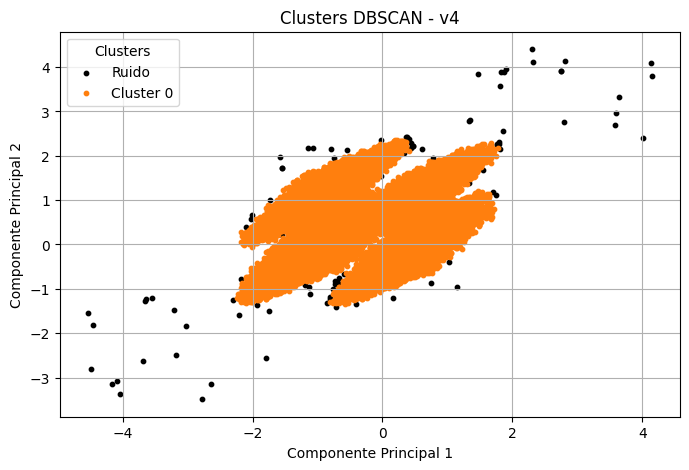


Aplicando DBSCAN sobre v5 con eps=0.0128
Silhouette Score para DBSCAN en v5: 0.77

Predicciones de DBSCAN para los test cases:
Test case 1: asignado a cluster 1
Test case 2: asignado a cluster 1
Test case 3: asignado a cluster 2


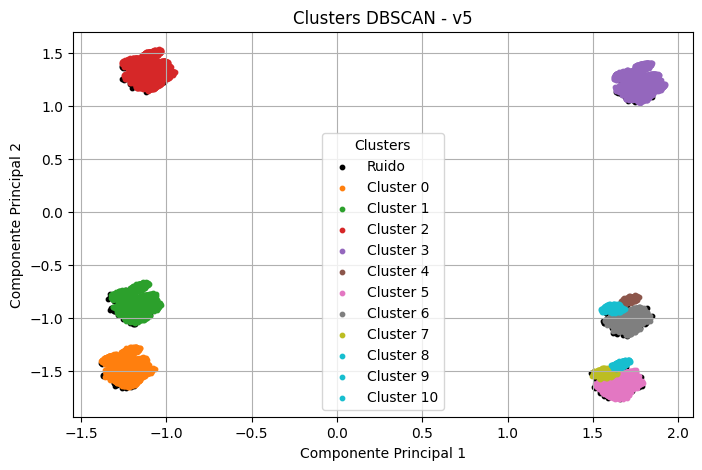


Aplicando DBSCAN sobre v6 con eps=0.0140
Silhouette Score para DBSCAN en v6: 0.83

Predicciones de DBSCAN para los test cases:
Test case 1: asignado a cluster 1
Test case 2: asignado a cluster 1
Test case 3: asignado a cluster 0


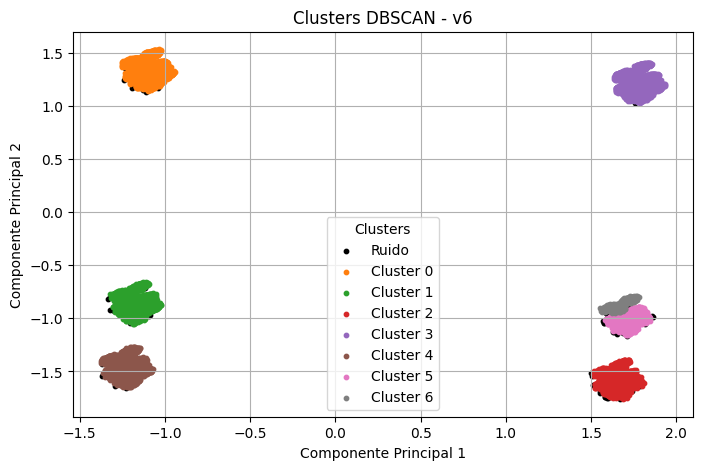


Aplicando DBSCAN sobre v7 con eps=0.0140
Silhouette Score para DBSCAN en v7: 0.83

Predicciones de DBSCAN para los test cases:
Test case 1: asignado a cluster 4
Test case 2: asignado a cluster 4
Test case 3: asignado a cluster 3


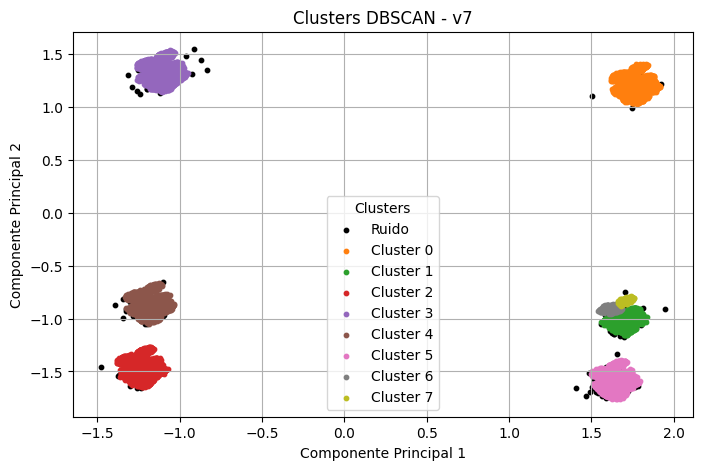


Aplicando DBSCAN sobre v8 con eps=0.0140
Silhouette Score para DBSCAN en v8: 0.83

Predicciones de DBSCAN para los test cases:
Test case 1: asignado a cluster 4
Test case 2: asignado a cluster 4
Test case 3: asignado a cluster 3


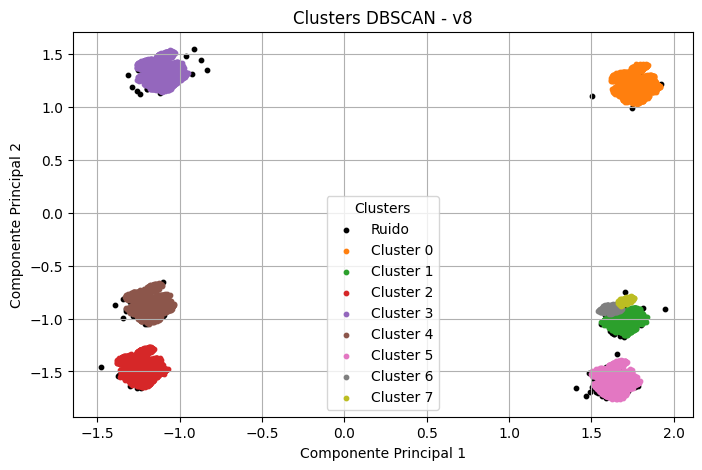

In [ ]:
resultados_dbscan = {}

for i in range(1, 9):
    version = f'v{i}'
    X_pca = X_pcas[version]
    eps = optimal_epsilons[version]

    print(f"\nAplicando DBSCAN sobre {version} con eps={eps:.4f}")
    labels = aplicar_dbscan_y_graficar(X_pca, eps, nombre_dataset=version)

    resultados_dbscan[version] = labels

### Resultado

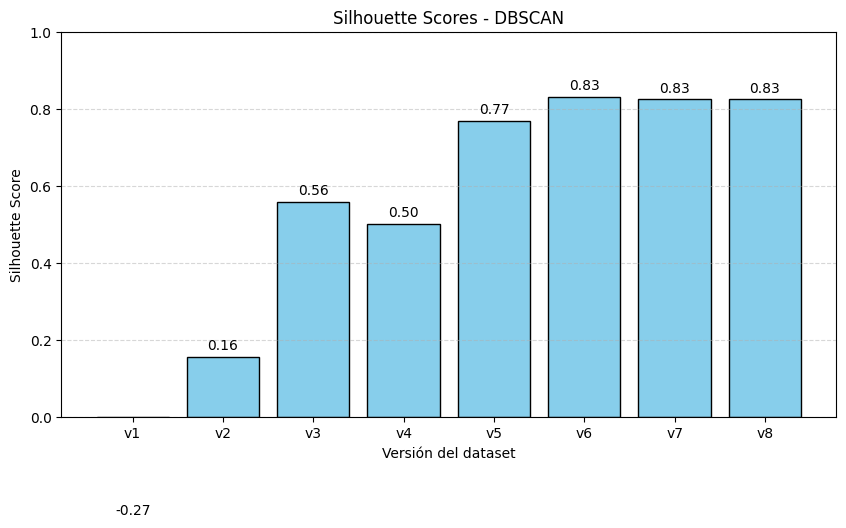

{'v1': np.float64(-0.2720702093733083), 'v2': np.float64(0.1564411611551333), 'v3': np.float64(0.5595186517798597), 'v4': np.float64(0.5025911203917862), 'v5': np.float64(0.7696300882078271), 'v6': np.float64(0.831660687391191), 'v7': np.float64(0.82515514902618), 'v8': np.float64(0.82515514902618)}


In [ ]:
plot_silhouette_scores(silhouette_scores_dbscan, title="Silhouette Scores - DBSCAN")
print(silhouette_scores_dbscan)